In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Shin\Desktop\NoonMap-Project\data\file_data\수위_api.csv')

In [3]:
df

Unnamed: 0  station_code    obs_date     WL   FW
0             52561       1007604  2016123123  146.0  NaN
1             52562       1007604  2016123122  146.0  NaN
2             52563       1007604  2016123121  146.0  NaN
3             52564       1007604  2016123120  146.0  NaN
4             52565       1007604  2016123119  146.0  NaN
...             ...           ...         ...    ...  ...
7679636    13008999       1201654  2020010204  256.0  0.0
7679637    13009000       1201654  2020010203  258.0  0.0
7679638    13009001       1201654  2020010202  253.0  0.0
7679639    13009002       1201654  2020010201  259.0  0.0
7679640    13009004       1201654  2020010123  260.0  0.0

[7679641 rows x 5 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679641 entries, 0 to 7679640
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   station_code  int64  
 2   obs_date      int64  
 3   WL            float64
 4   FW            float64
dtypes: float64(2), int64(3)
memory usage: 293.0 MB


In [5]:
df.isna().sum()

Unnamed: 0            0
station_code          0
obs_date              0
WL                    0
FW              1702182
dtype: int64

# 결측값 처리

In [6]:
df.drop(["FW"], axis=1, inplace=True)

In [7]:
df.isna().sum()

Unnamed: 0      0
station_code    0
obs_date        0
WL              0
dtype: int64

# 'obs_date' 열의 관측값 형식 변환

In [8]:
from datetime import datetime

In [9]:
df['obs_date'] = pd.to_datetime(df['obs_date'], format='%Y%m%d%H')

In [10]:
df

Unnamed: 0  station_code            obs_date     WL
0             52561       1007604 2016-12-31 23:00:00  146.0
1             52562       1007604 2016-12-31 22:00:00  146.0
2             52563       1007604 2016-12-31 21:00:00  146.0
3             52564       1007604 2016-12-31 20:00:00  146.0
4             52565       1007604 2016-12-31 19:00:00  146.0
...             ...           ...                 ...    ...
7679636    13008999       1201654 2020-01-02 04:00:00  256.0
7679637    13009000       1201654 2020-01-02 03:00:00  258.0
7679638    13009001       1201654 2020-01-02 02:00:00  253.0
7679639    13009002       1201654 2020-01-02 01:00:00  259.0
7679640    13009004       1201654 2020-01-01 23:00:00  260.0

[7679641 rows x 4 columns]

# 수위 테이블과 수위 관측소 테이블 병합

In [11]:
df_station = pd.read_csv(r'C:\Users\Shin\Desktop\NoonMap-Project\data\file_data\수위_관측소.csv')

In [12]:
merge_df = pd.merge(df_station, df, on='station_code')

In [13]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7679641 entries, 0 to 7679640
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Unnamed: 0_x  int64         
 1   station_code  int64         
 2   station_name  object        
 3   address       object        
 4   etc_address   object        
 5   longitude     object        
 6   latitude      object        
 7   location      object        
 8   Unnamed: 0_y  int64         
 9   obs_date      datetime64[ns]
 10  WL            float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 703.1+ MB


In [14]:
merge_df.drop(columns = ["Unnamed: 0_x", "longitude", "latitude", "Unnamed: 0_y"], axis=1, inplace=True)

In [40]:
merge_df

station_code station_name      address etc_address  \
0             1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
1             1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
2             1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
3             1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
4             1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
...               ...          ...          ...         ...   
7679636       1201654    아라서해갑실(북)     인천광역시 서구  경서로 31번길 1   
7679637       1201654    아라서해갑실(북)     인천광역시 서구  경서로 31번길 1   
7679638       1201654    아라서해갑실(북)     인천광역시 서구  경서로 31번길 1   
7679639       1201654    아라서해갑실(북)     인천광역시 서구  경서로 31번길 1   
7679640       1201654    아라서해갑실(북)     인천광역시 서구  경서로 31번길 1   

                                        location            obs_date     WL  
0        [37.10666666666667, 127.43361111111112] 2016-12-31 23:00:00  146.0  
1        [37.10666666666667, 127.43361111111112] 2016-12-31 22:00:00  146.0  
2        [37.10666666666667, 127.43361111111112] 2016-12-31 21:00:00  146.0  
3        [37.10666666666667, 127.43361111111112] 2016-12-31 20:00:00  146.0  
4        [37.10666666666667, 127.43361111111112] 2016-12-31 19:00:00  146.0  
...                                          ...                 ...    ...  
7679636  [37.56111111111111, 126.60277777777777] 2020-01-02 04:00:00  256.0  
7679637  [37.56111111111111, 126.60277777777777] 2020-01-02 03:00:00  258.0  
7679638  [37.56111111111111, 126.60277777777777] 2020-01-02 02:00:00  253.0  
7679639  [37.56111111111111, 126.60277777777777] 2020-01-02 01:00:00  259.0  
7679640  [37.56111111111111, 126.60277777777777] 2020-01-01 23:00:00  260.0  

[7679641 rows x 7 columns]

# EDA

In [59]:
import missingno as mino

<AxesSubplot:>

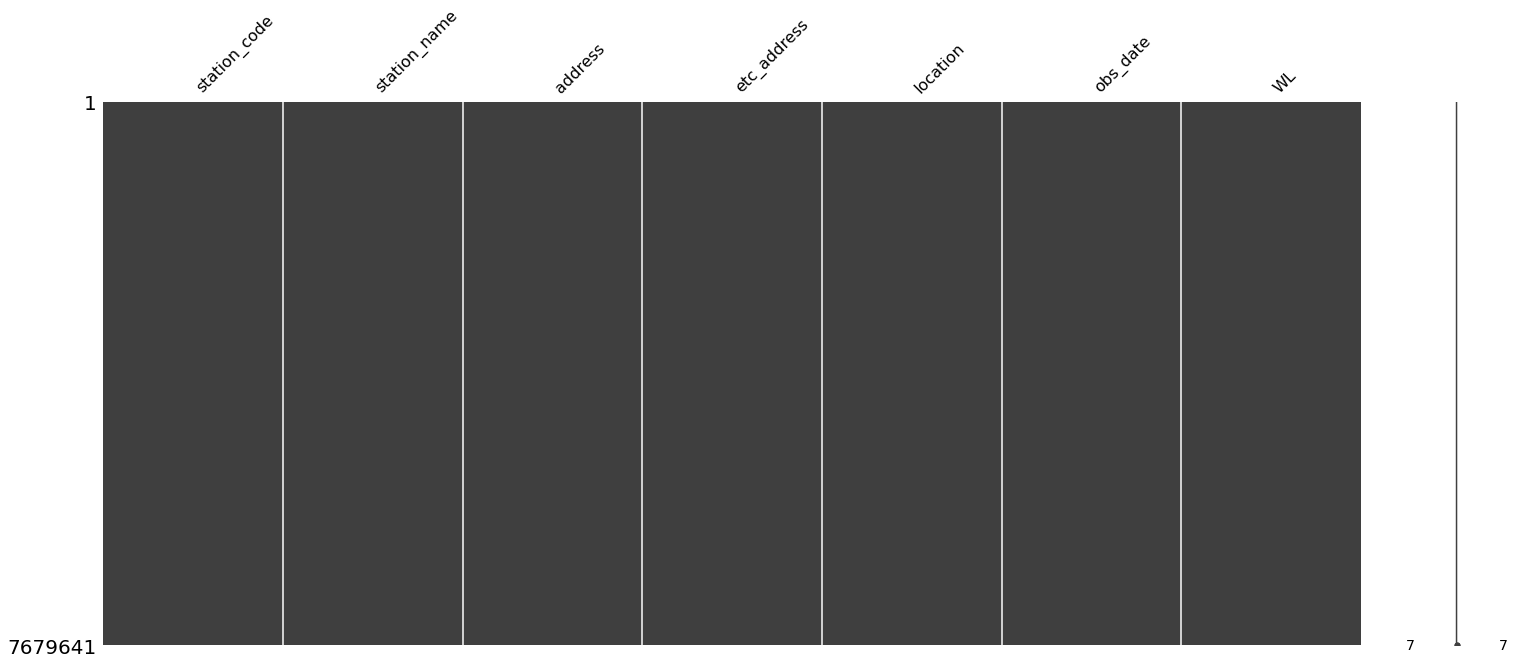

In [60]:
mino.matrix(merge_df) # 결측값 재확인

In [29]:
merge_df.corr()

station_code        WL
station_code      1.000000 -0.139421
WL               -0.139421  1.000000

<AxesSubplot:>

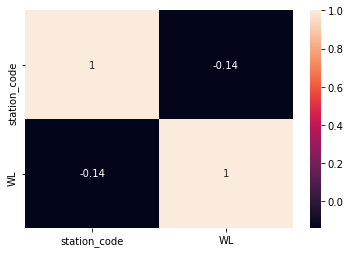

In [32]:
sns.heatmap(merge_df.corr(), annot=True)

In [36]:
merge_df.groupby('station_code').agg(['min', 'max'])['WL']

min    max
station_code              
1007604         0.0  632.0
1007605        70.0  834.0
1007615        41.0  740.0
1007617       -50.0  622.0
1007620      -166.0  491.0
...             ...    ...
1201620      -531.0  544.0
1201651         0.0  397.0
1201652      -498.0  492.0
1201653      -529.0  538.0
1201654      -506.0  521.0

[120 rows x 2 columns]

In [42]:
merge_df.groupby('station_code').count()

station_name  address  etc_address  location  obs_date     WL
station_code                                                               
1007604              32984    32984        32984     32984     32984  32984
1007605              90365    90365        90365     90365     90365  90365
1007615              91771    91771        91771     91771     91771  91771
1007617              88582    88582        88582     88582     88582  88582
1007620              91955    91955        91955     91955     91955  91955
...                    ...      ...          ...       ...       ...    ...
1201620              89817    89817        89817     89817     89817  89817
1201651              22951    22951        22951     22951     22951  22951
1201652              22957    22957        22957     22957     22957  22957
1201653              22958    22958        22958     22958     22958  22958
1201654              22987    22987        22987     22987     22987  22987

[120 rows x 6 columns]

In [50]:
from matplotlib import pyplot

In [51]:
pyplot.rcParams["figure.figsize"] = (20, 10)

<AxesSubplot:xlabel='station_code'>

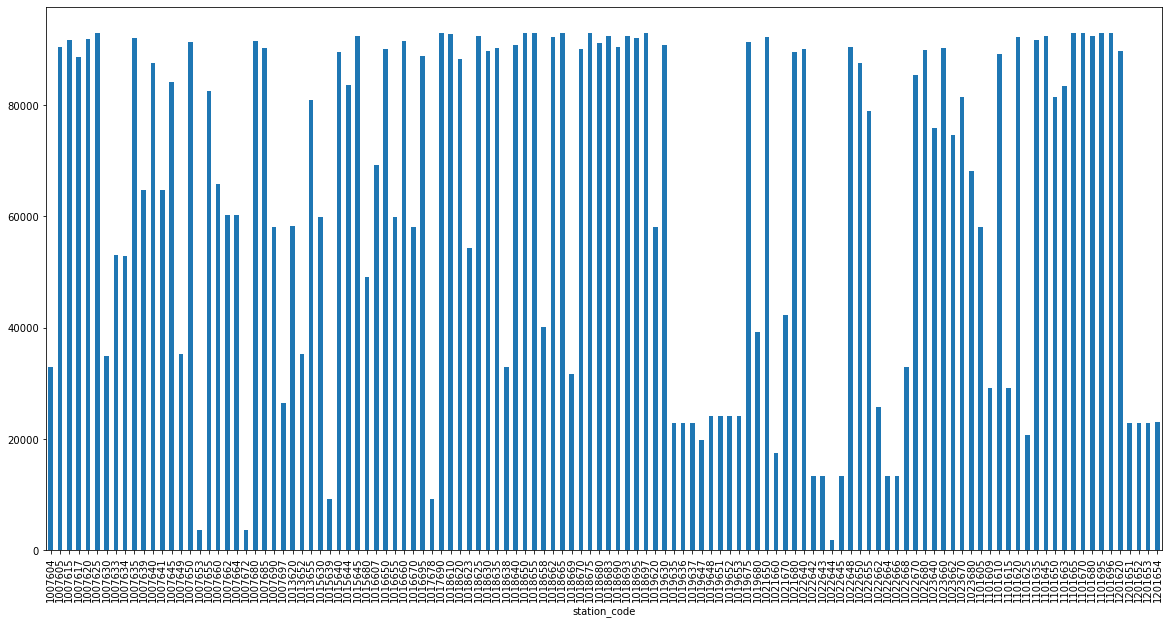

In [54]:
merge_df.groupby('station_code').count()['WL'].plot.bar() # 관측 수가 현저히 적은 관측소들이 있음

In [62]:
len(merge_df.groupby('station_code'))

120

In [70]:
station_code_list = pd.unique(merge_df['station_code']).tolist()

In [90]:
df_list = []
for i in range(120):
    i = pd.DataFrame()
    df_list.append(i)

In [91]:
for i in range(120):
    df_list[i] = merge_df[merge_df['station_code'] == station_code_list[i]]

In [92]:
df_list[0]

station_code station_name      address etc_address  \
0           1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
1           1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
2           1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
3           1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
4           1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
...             ...          ...          ...         ...   
32979       1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
32980       1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
32981       1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
32982       1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   
32983       1007604     안성시(한평교)  경기도 안성시 일죽면     고은리 한평교   

                                      location            obs_date     WL  
0      [37.10666666666667, 127.43361111111112] 2016-12-31 23:00:00  146.0  
1      [37.10666666666667, 127.43361111111112] 2016-12-31 22:00:00  146.0  
2      [37.10666666666667, 127.43361111111112] 2016-12-31 21:00:00  146.0  
3      [37.10666666666667, 127.43361111111112] 2016-12-31 20:00:00  146.0  
4      [37.10666666666667, 127.43361111111112] 2016-12-31 19:00:00  146.0  
...                                        ...                 ...    ...  
32979  [37.10666666666667, 127.43361111111112] 2020-01-02 03:00:00  146.0  
32980  [37.10666666666667, 127.43361111111112] 2020-01-02 02:00:00  146.0  
32981  [37.10666666666667, 127.43361111111112] 2020-01-02 01:00:00  146.0  
32982  [37.10666666666667, 127.43361111111112] 2020-01-02 00:00:00  146.0  
32983  [37.10666666666667, 127.43361111111112] 2020-01-01 23:00:00  146.0  

[32984 rows x 7 columns]

In [96]:
import matplotlib.pyplot as plt

In [106]:
plt.rc('font', family='Malgun Gothic')

In [112]:
df_list[1]

station_code station_name  address     etc_address  \
32984        1007605    이천시(장호원교)  경기도 이천시  장호원읍 장호원리 장호원교   
32985        1007605    이천시(장호원교)  경기도 이천시  장호원읍 장호원리 장호원교   
32986        1007605    이천시(장호원교)  경기도 이천시  장호원읍 장호원리 장호원교   
32987        1007605    이천시(장호원교)  경기도 이천시  장호원읍 장호원리 장호원교   
32988        1007605    이천시(장호원교)  경기도 이천시  장호원읍 장호원리 장호원교   
...              ...          ...      ...             ...   
123344       1007605    이천시(장호원교)  경기도 이천시  장호원읍 장호원리 장호원교   
123345       1007605    이천시(장호원교)  경기도 이천시  장호원읍 장호원리 장호원교   
123346       1007605    이천시(장호원교)  경기도 이천시  장호원읍 장호원리 장호원교   
123347       1007605    이천시(장호원교)  경기도 이천시  장호원읍 장호원리 장호원교   
123348       1007605    이천시(장호원교)  경기도 이천시  장호원읍 장호원리 장호원교   

                            location            obs_date     WL  
32984   [37.115, 127.63527777777779] 2010-12-31 23:00:00  111.0  
32985   [37.115, 127.63527777777779] 2010-12-31 22:00:00  111.0  
32986   [37.115, 127.63527777777779] 2010-12-31 21:00:00  111.0  
32987   [37.115, 127.63527777777779] 2010-12-31 20:00:00  111.0  
32988   [37.115, 127.63527777777779] 2010-12-31 19:00:00  111.0  
...                              ...                 ...    ...  
123344  [37.115, 127.63527777777779] 2020-01-02 03:00:00   94.0  
123345  [37.115, 127.63527777777779] 2020-01-02 02:00:00   94.0  
123346  [37.115, 127.63527777777779] 2020-01-02 01:00:00   94.0  
123347  [37.115, 127.63527777777779] 2020-01-02 00:00:00   94.0  
123348  [37.115, 127.63527777777779] 2020-01-01 23:00:00   94.0  

[90365 rows x 7 columns]

In [119]:
station_name_list = pd.unique(merge_df['station_name']).tolist()

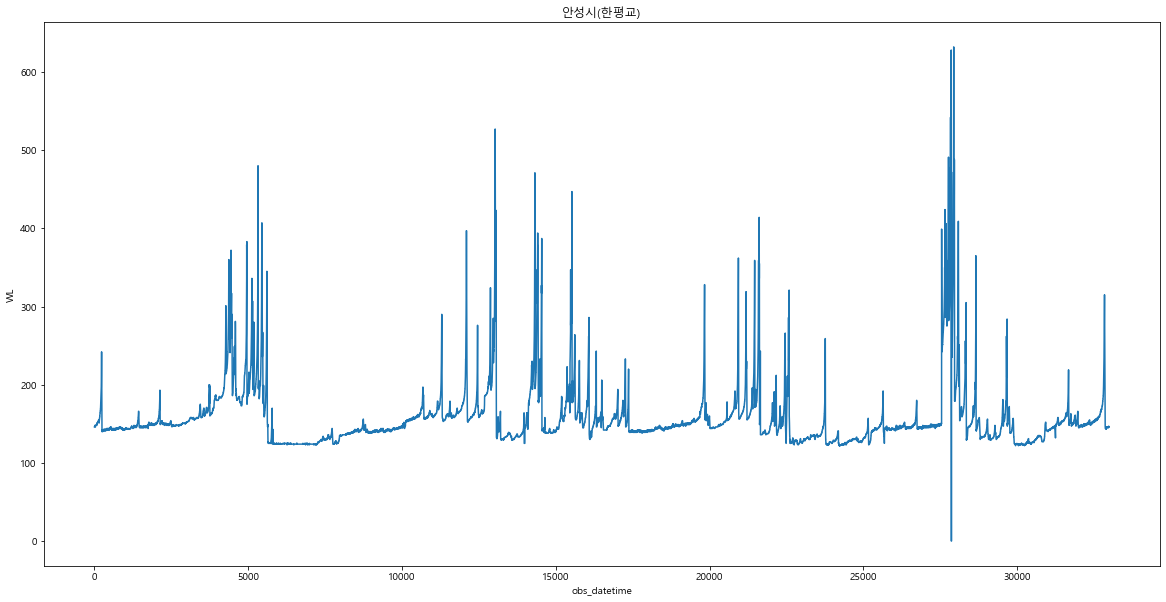

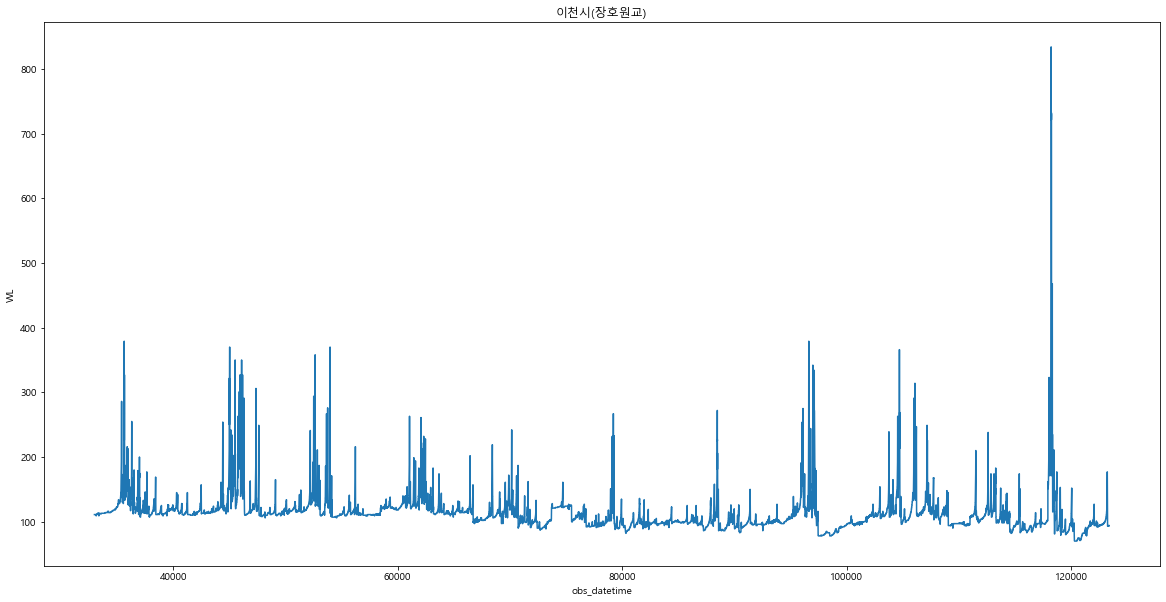

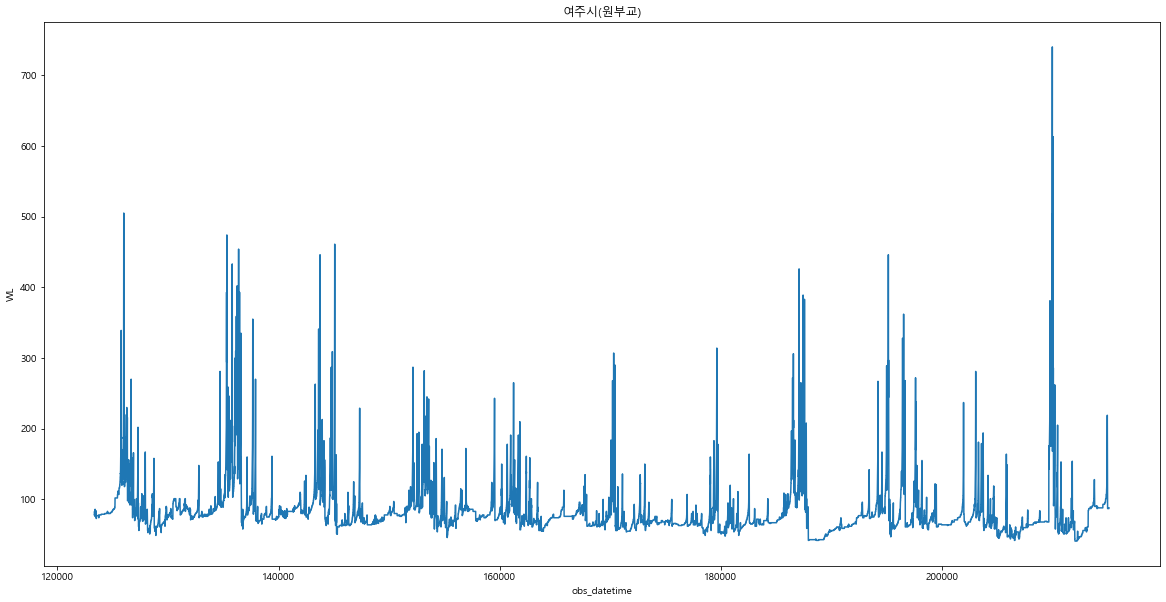

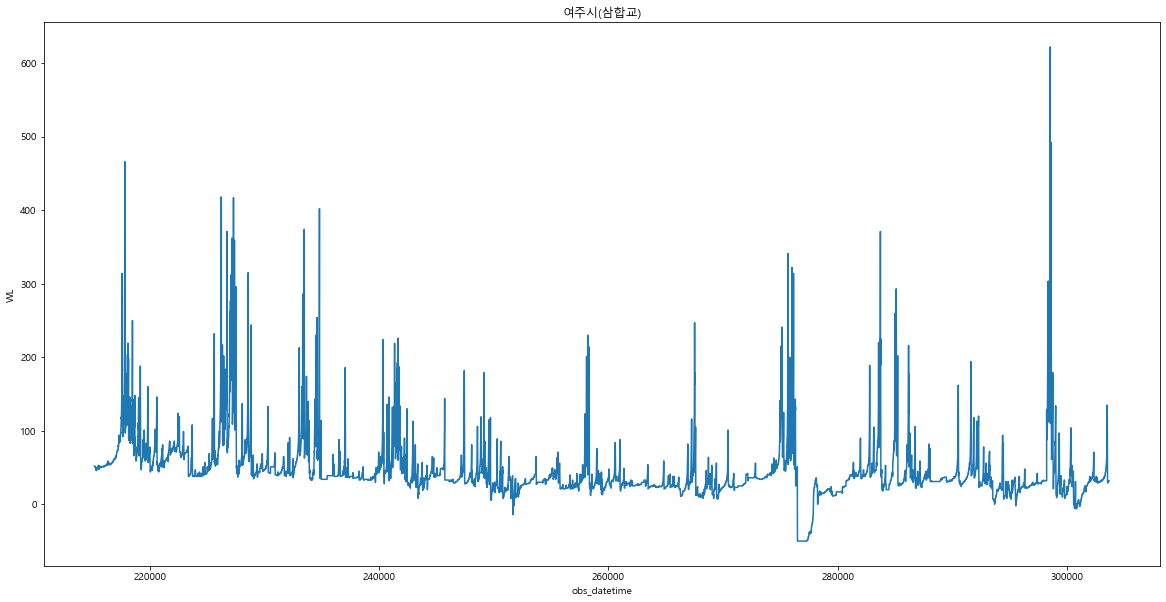

C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


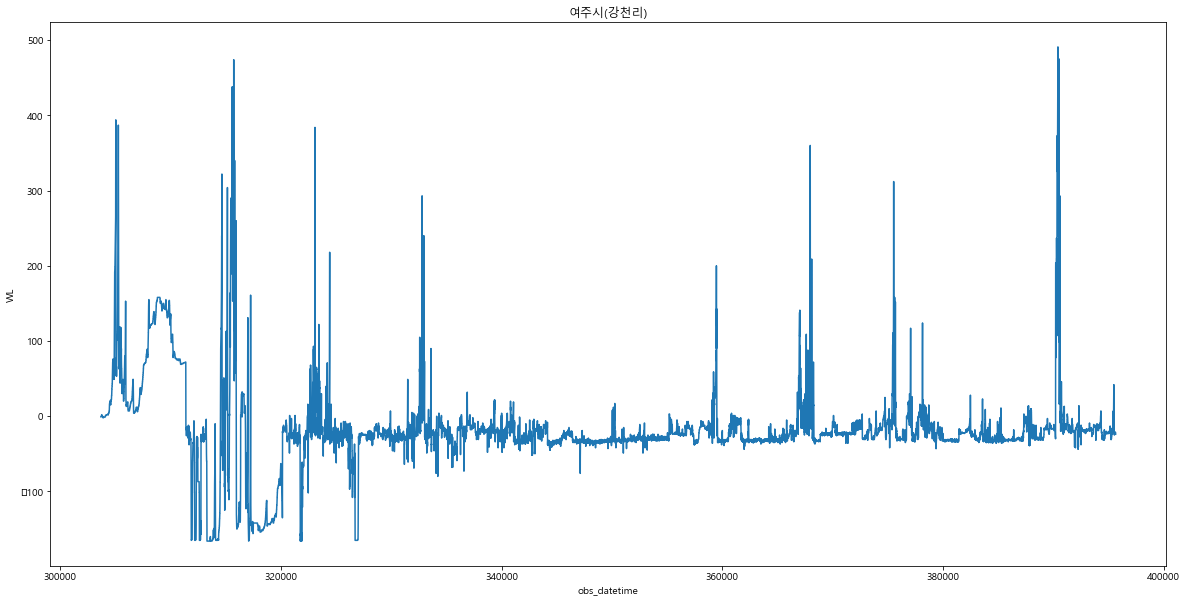

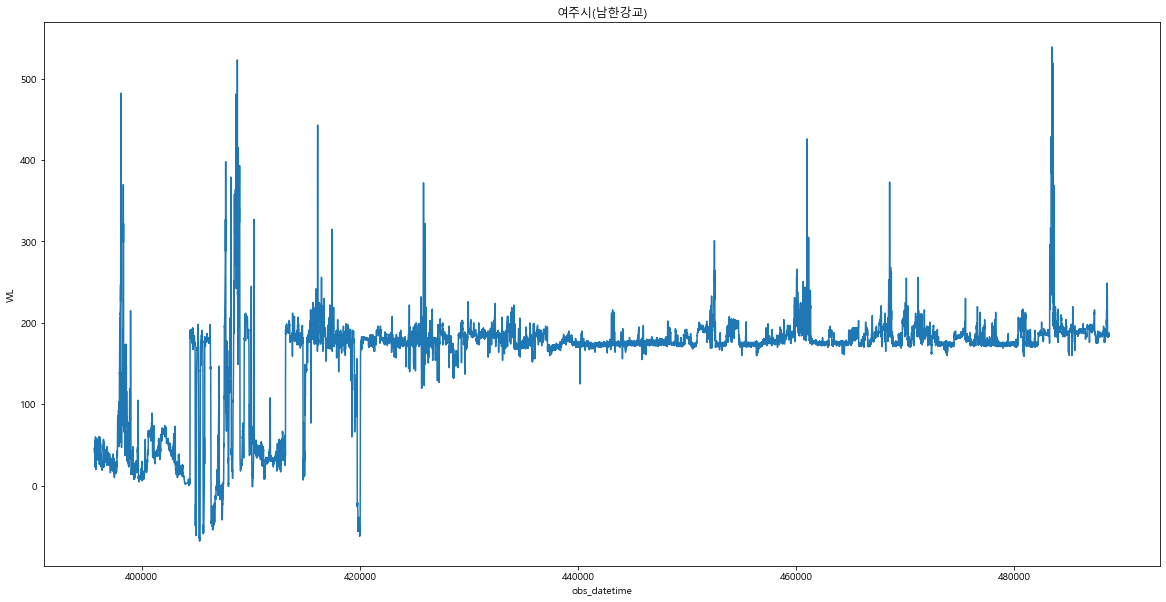

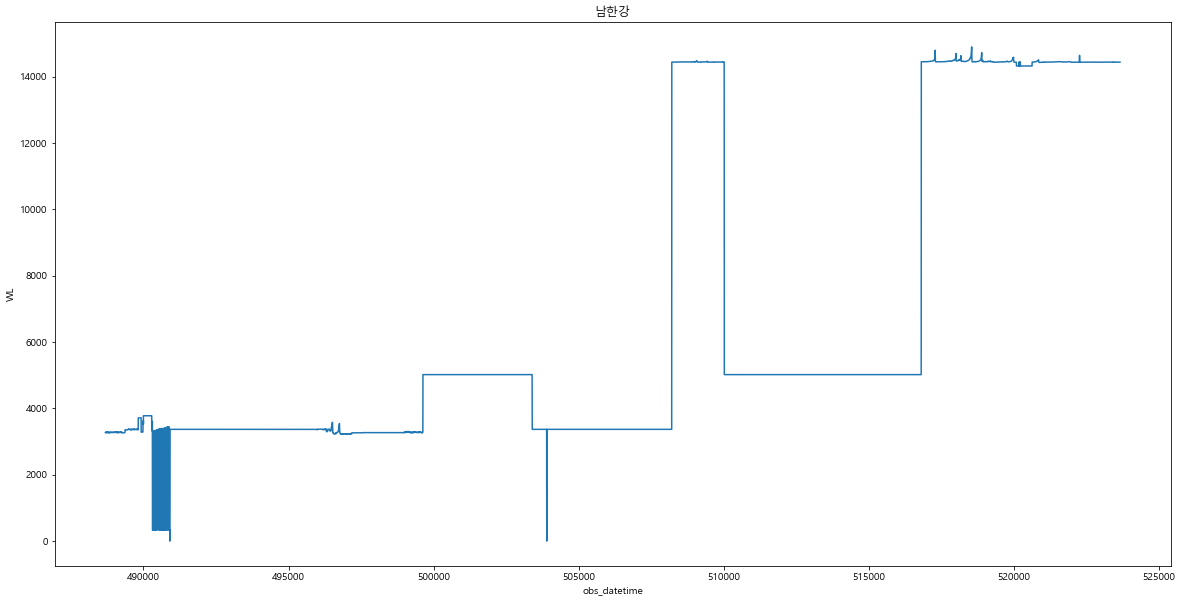

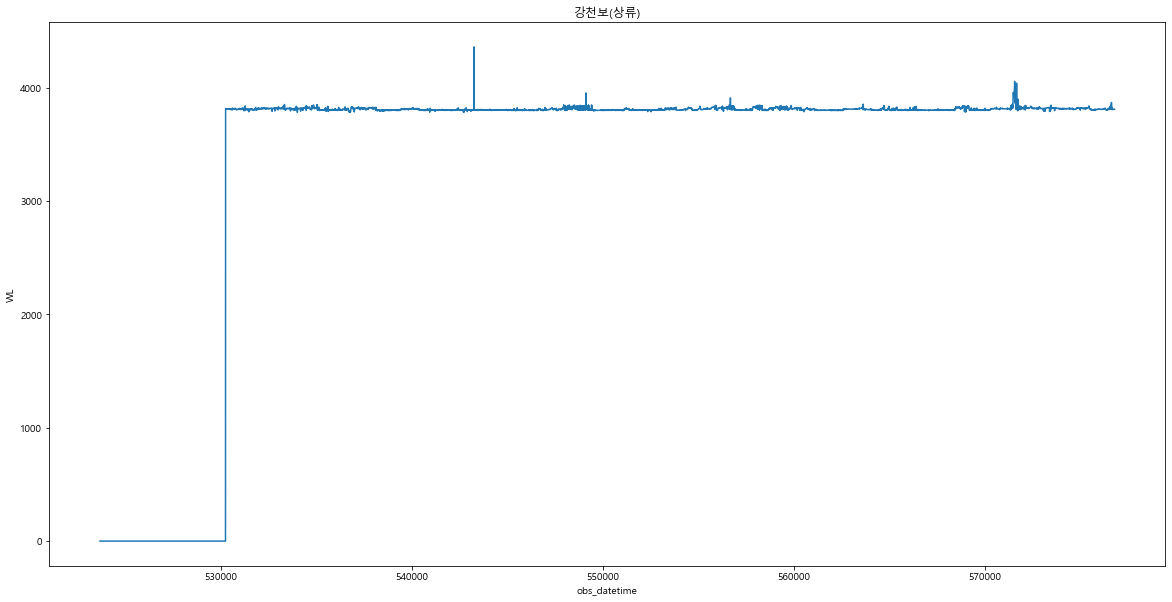

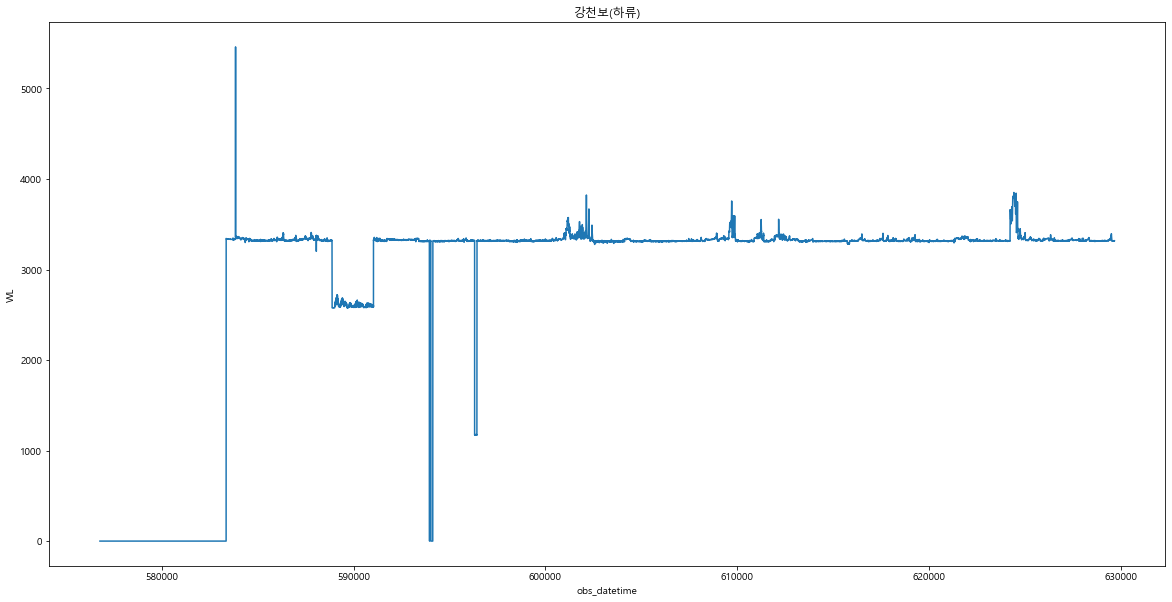

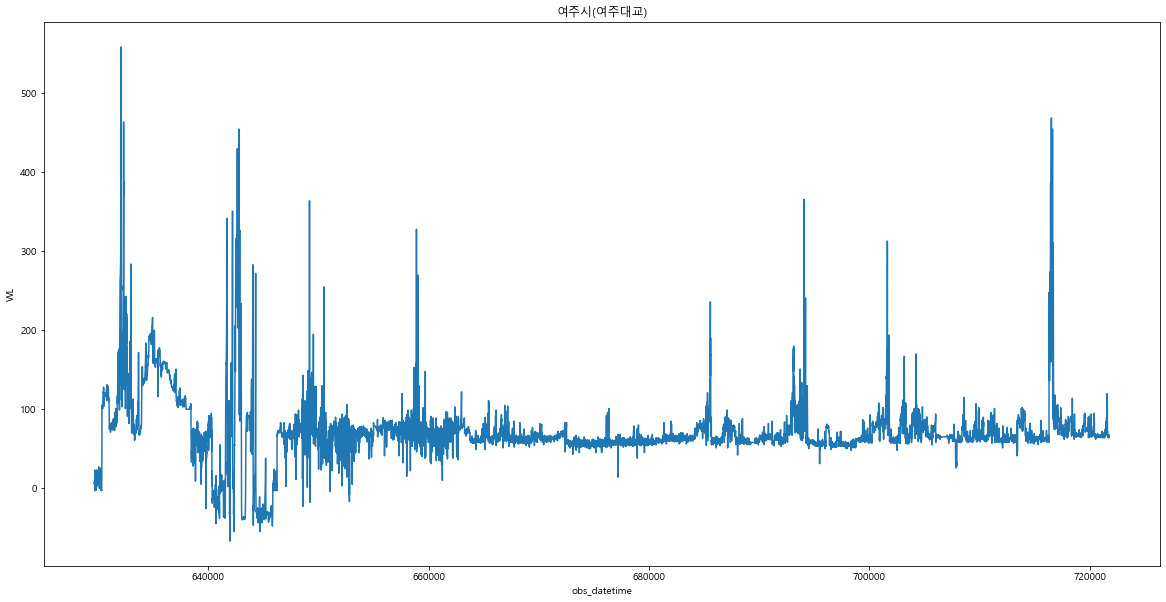

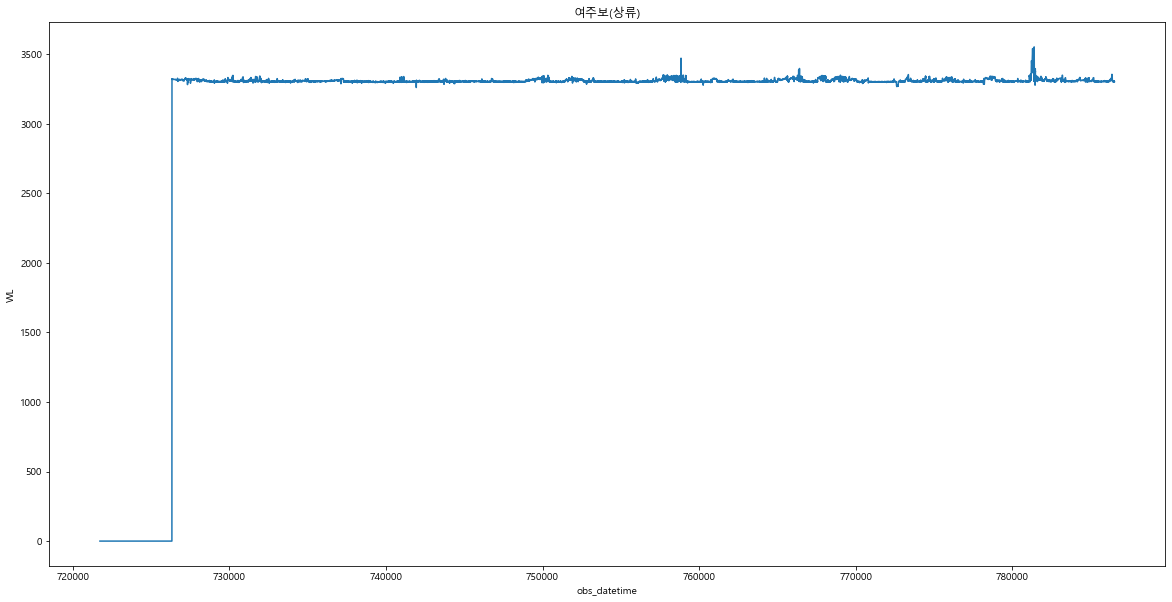

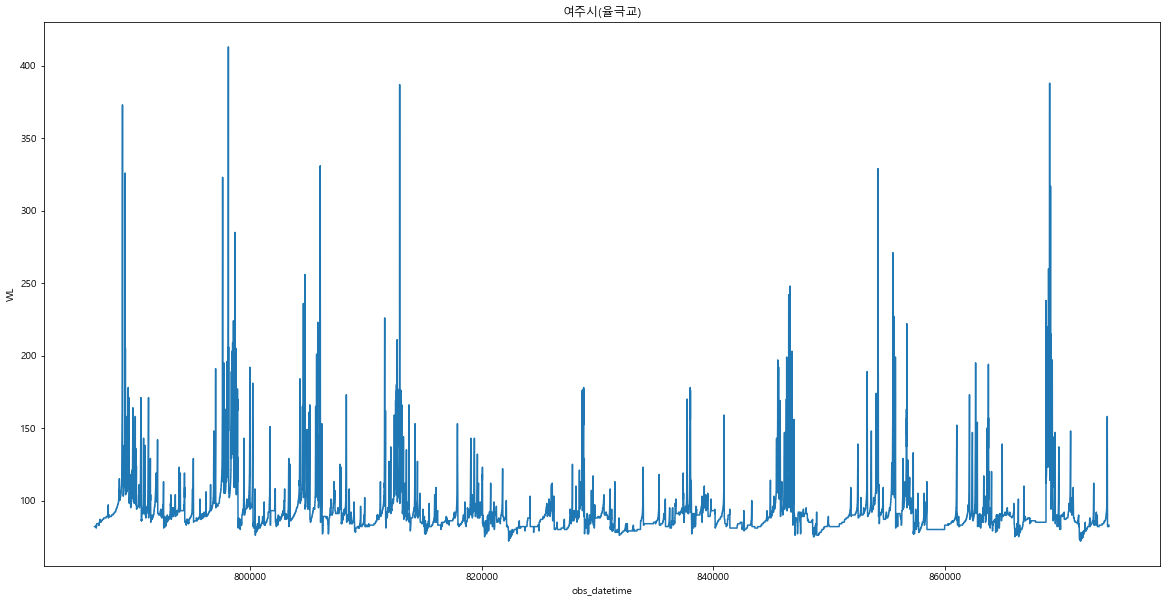

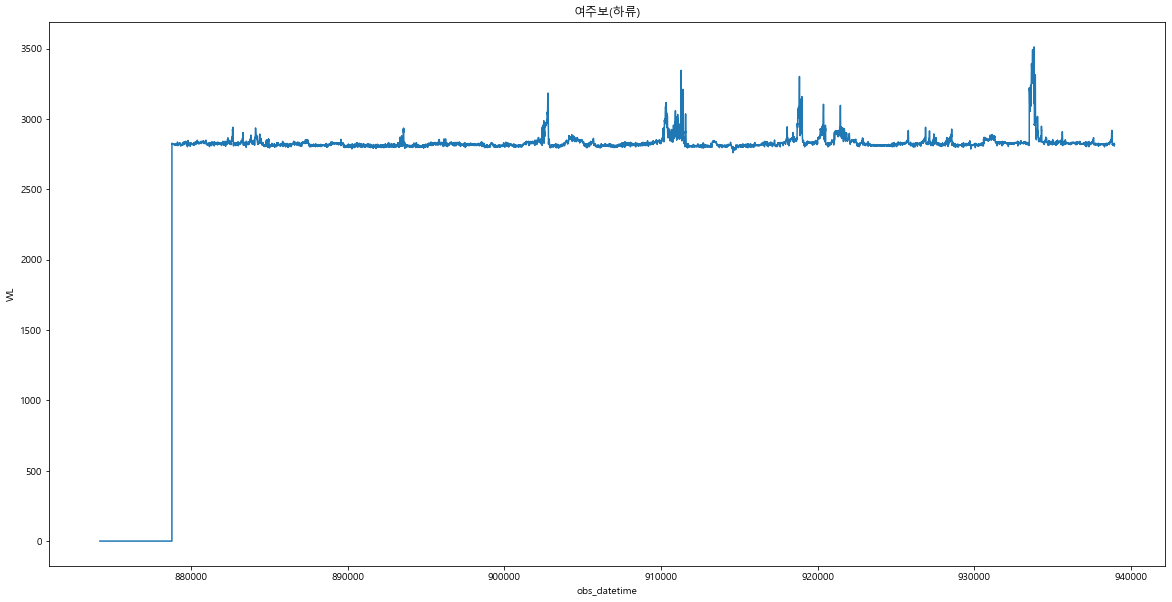

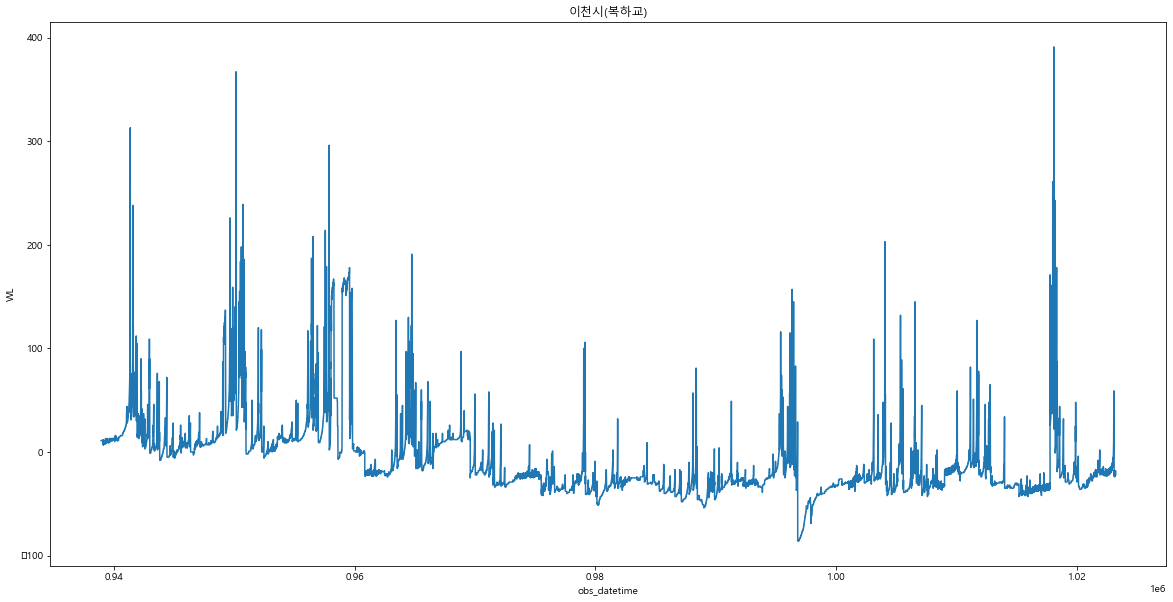

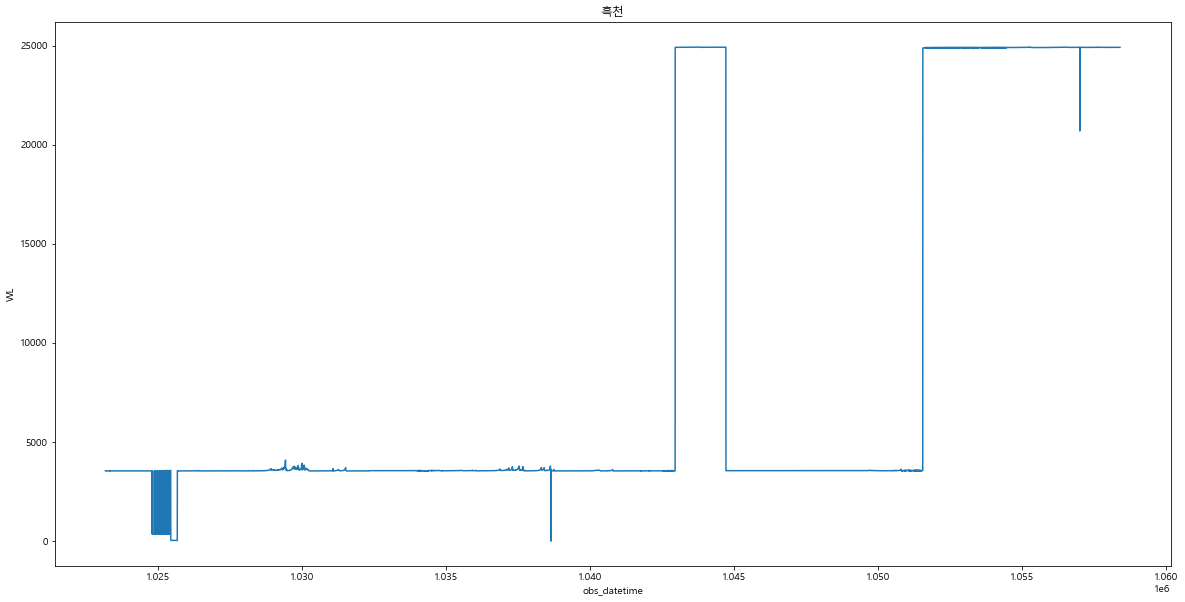

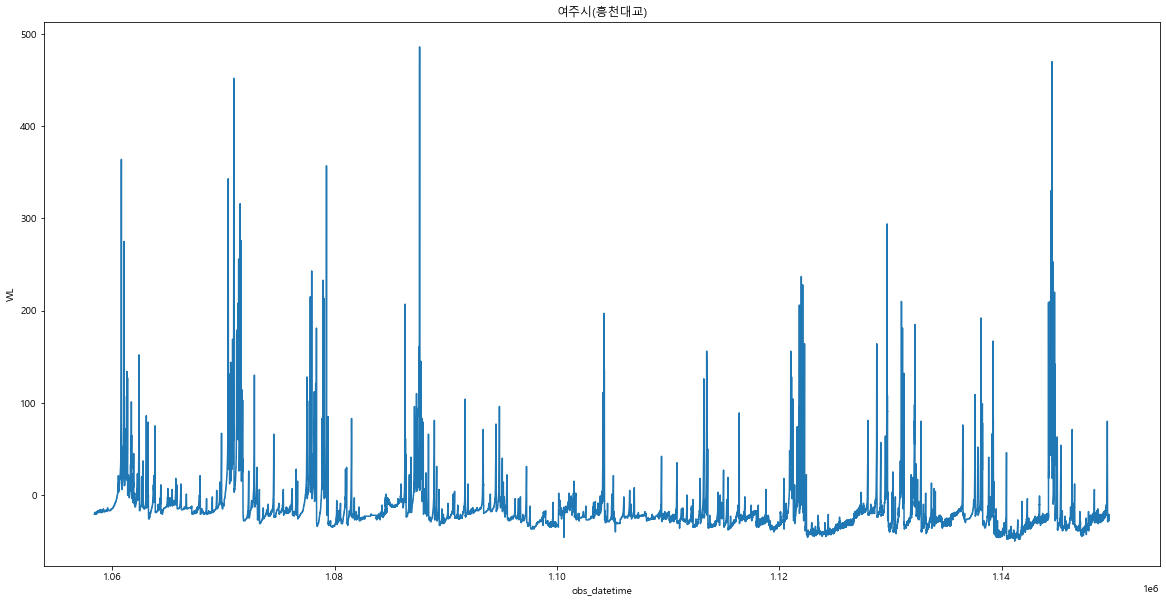

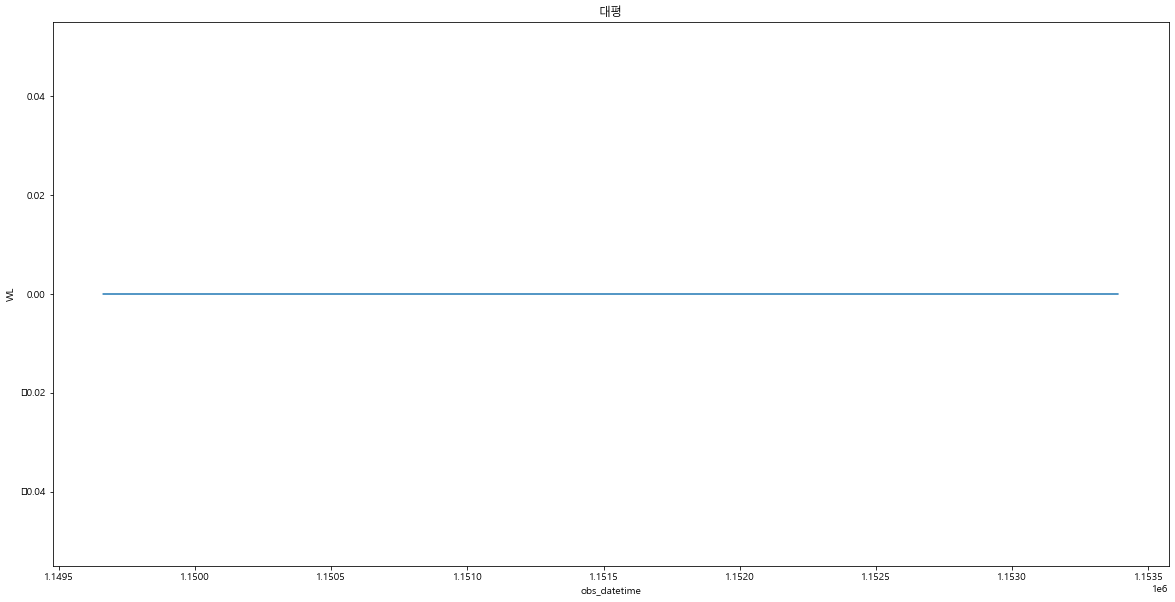

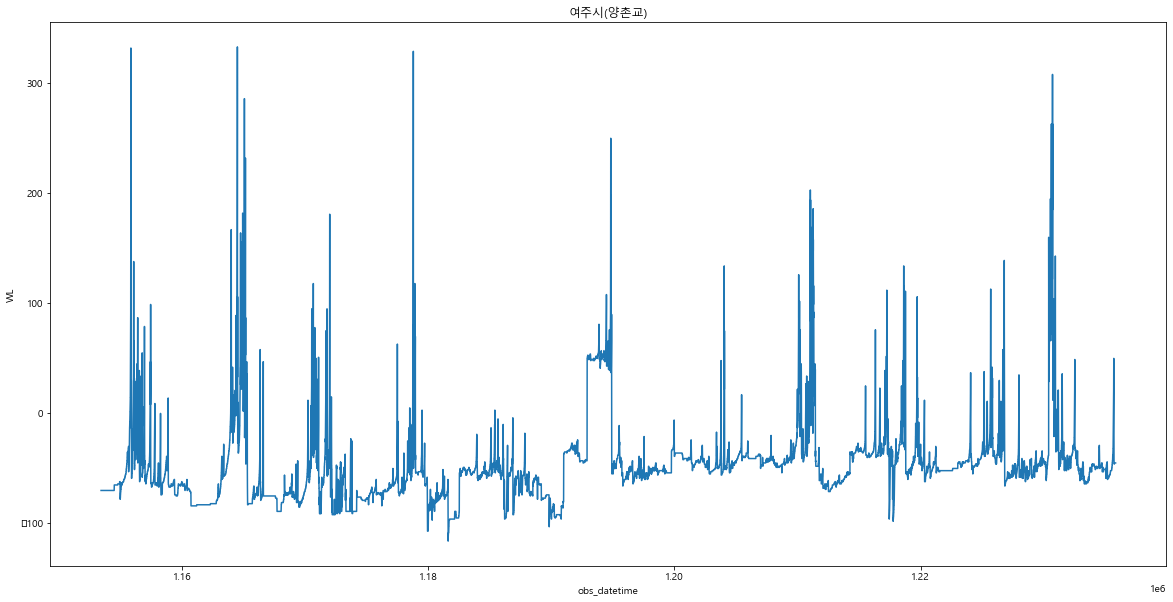

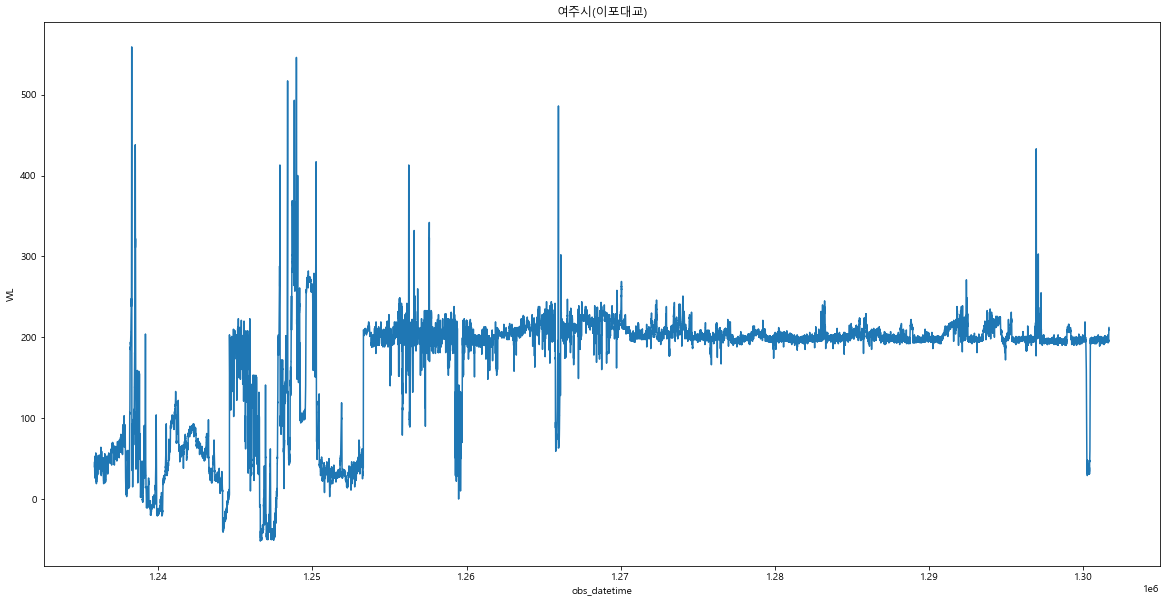

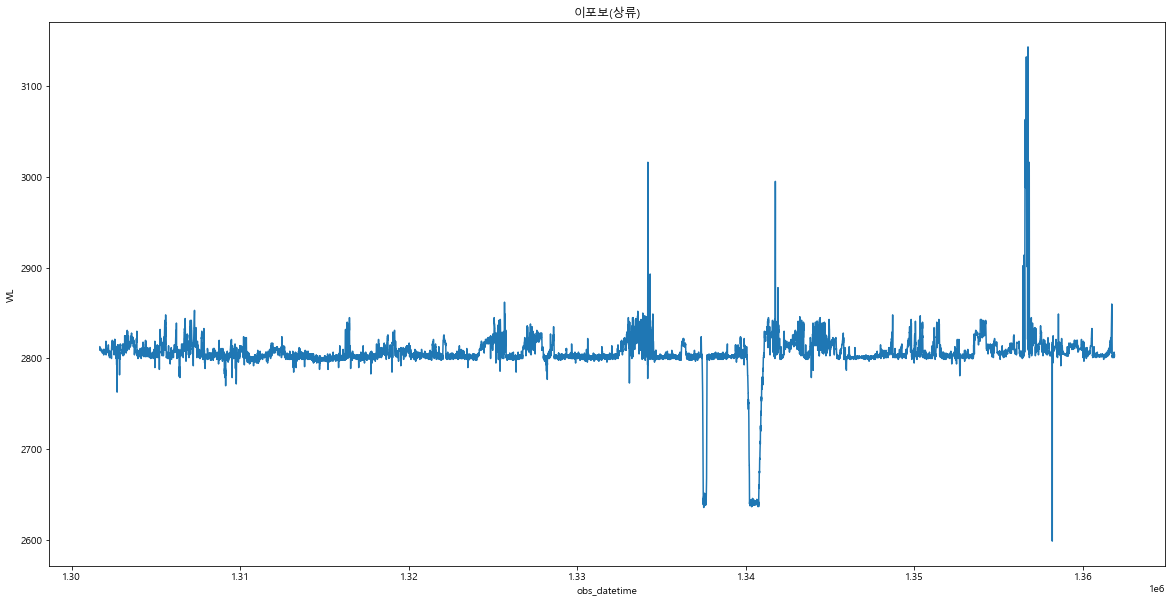

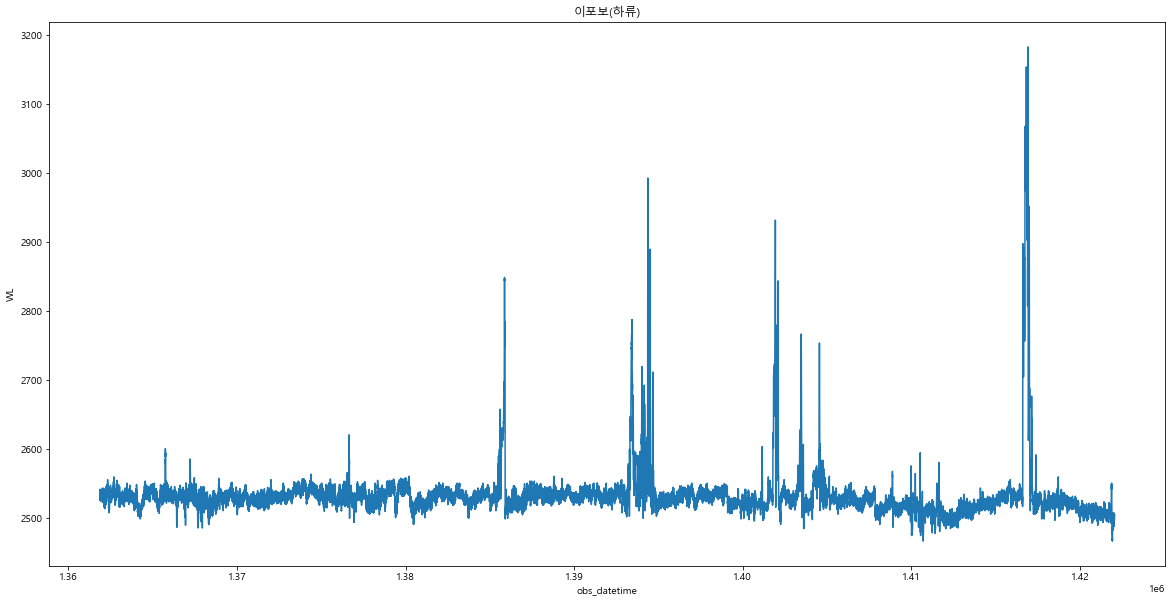

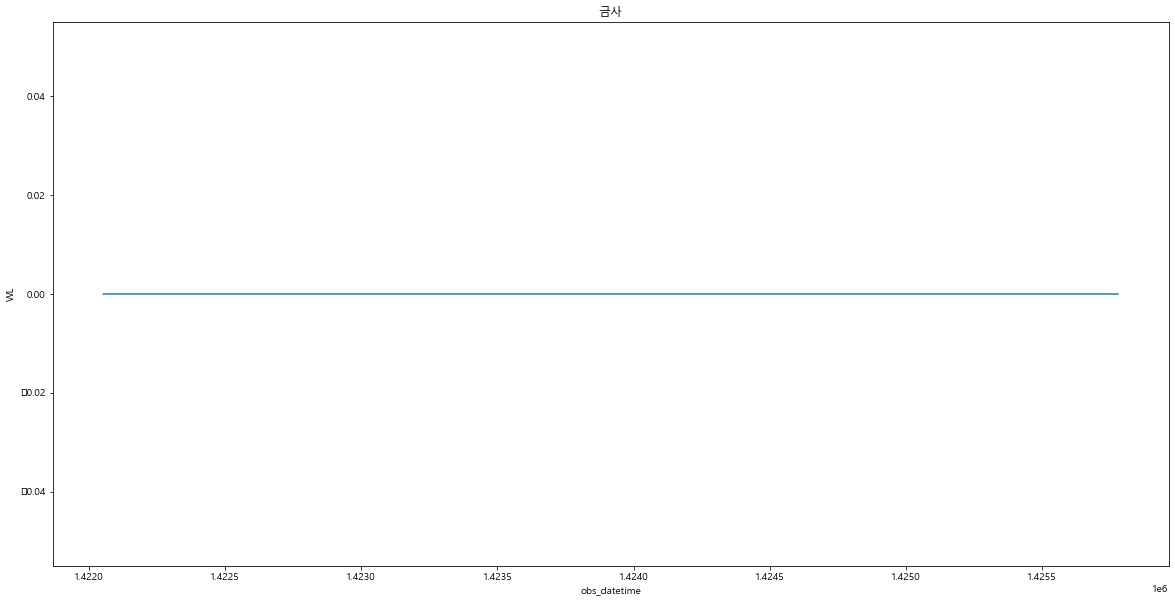

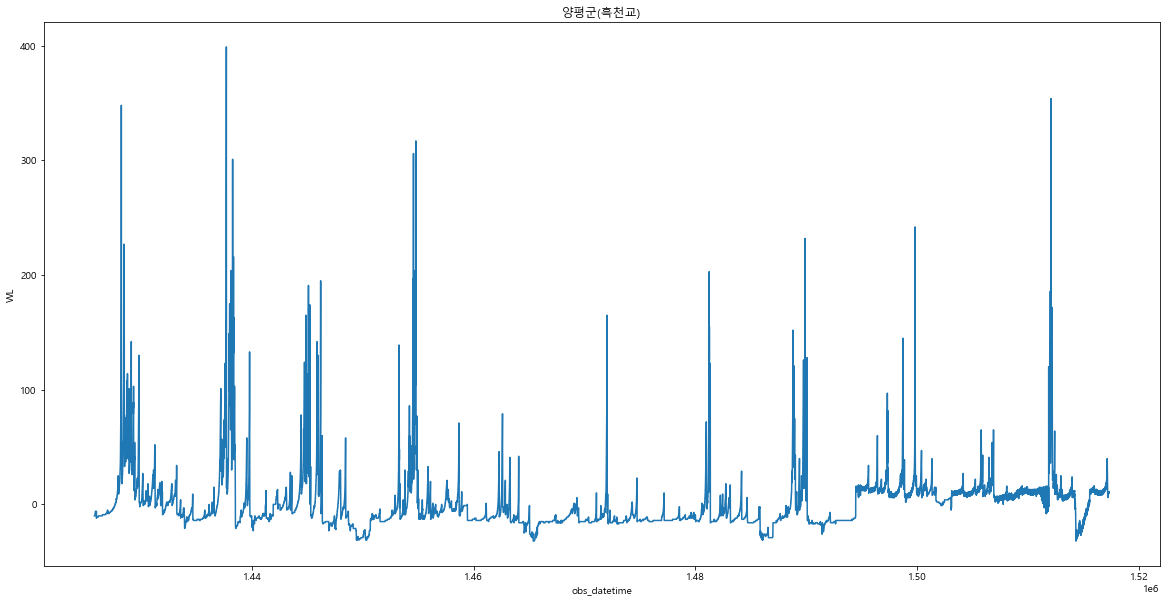

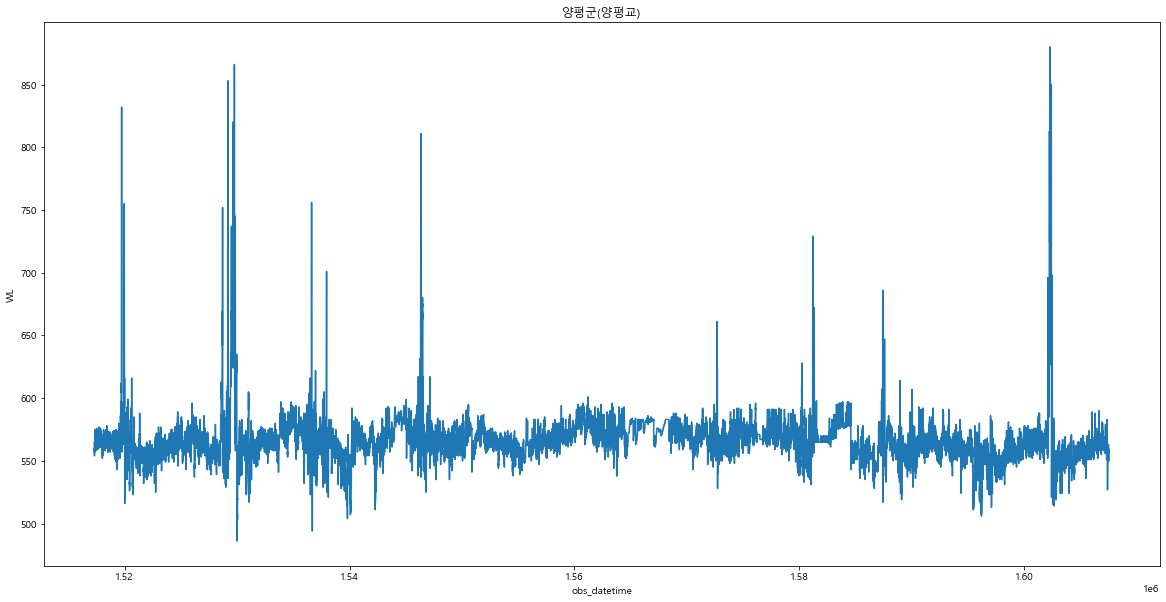

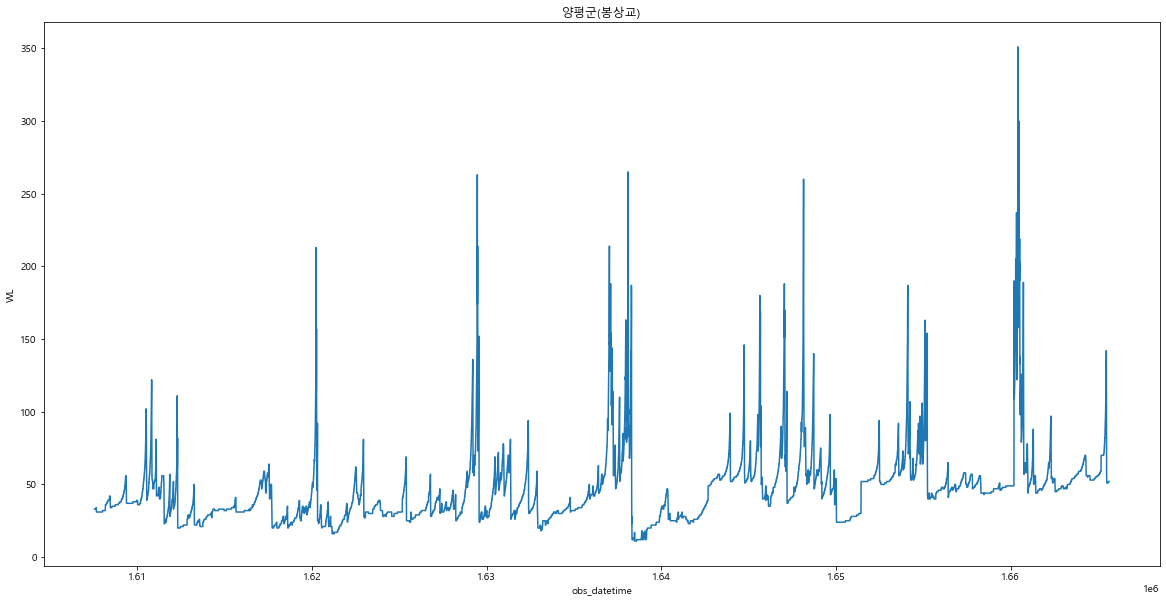

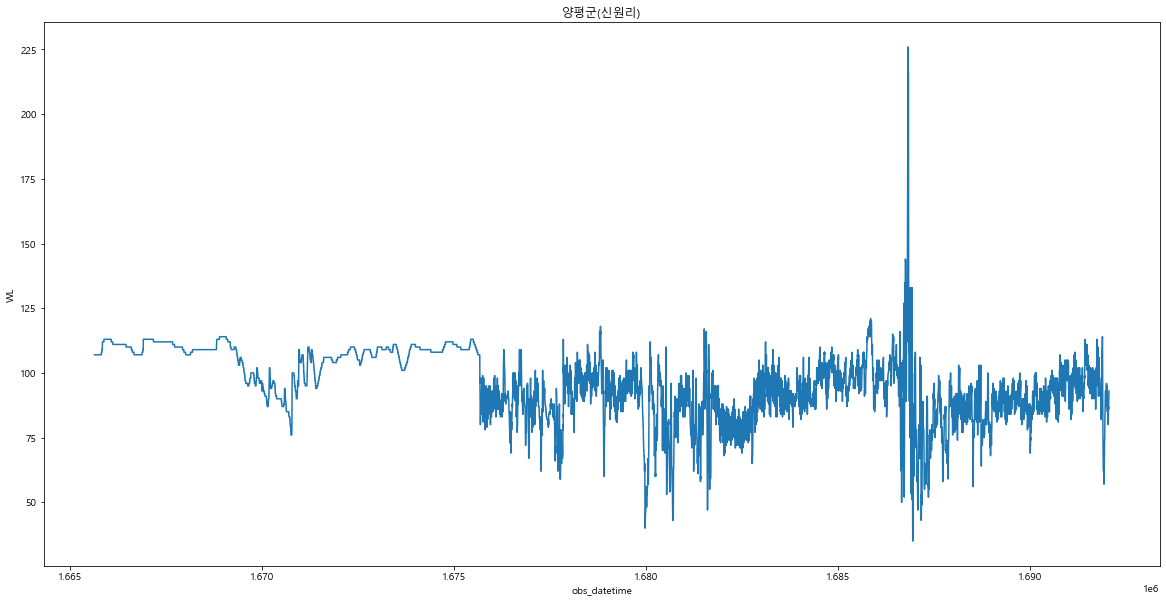

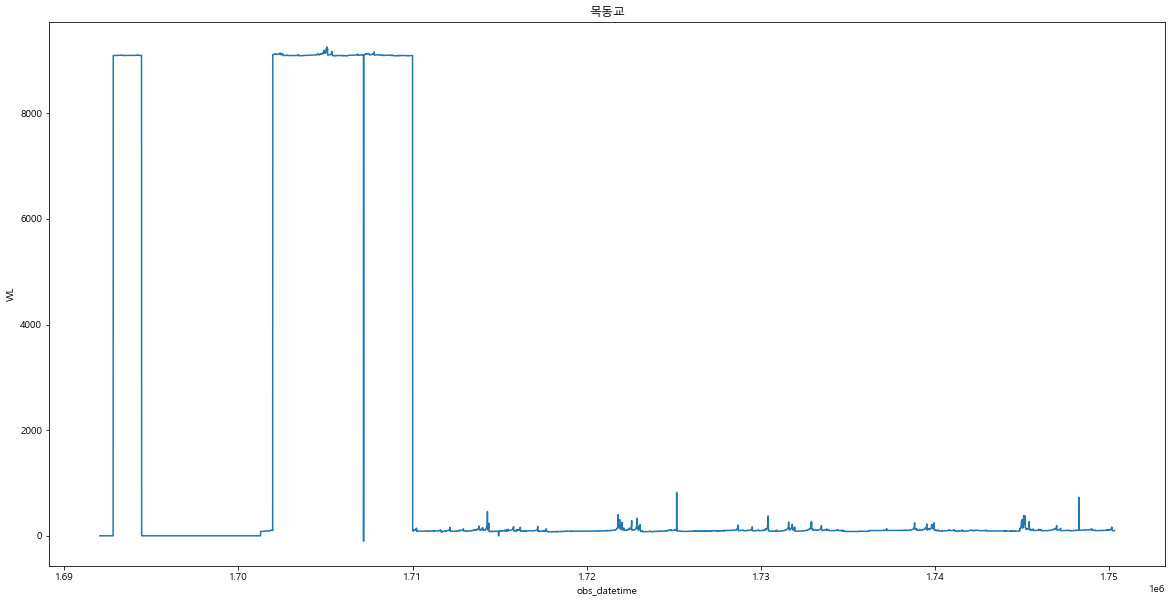

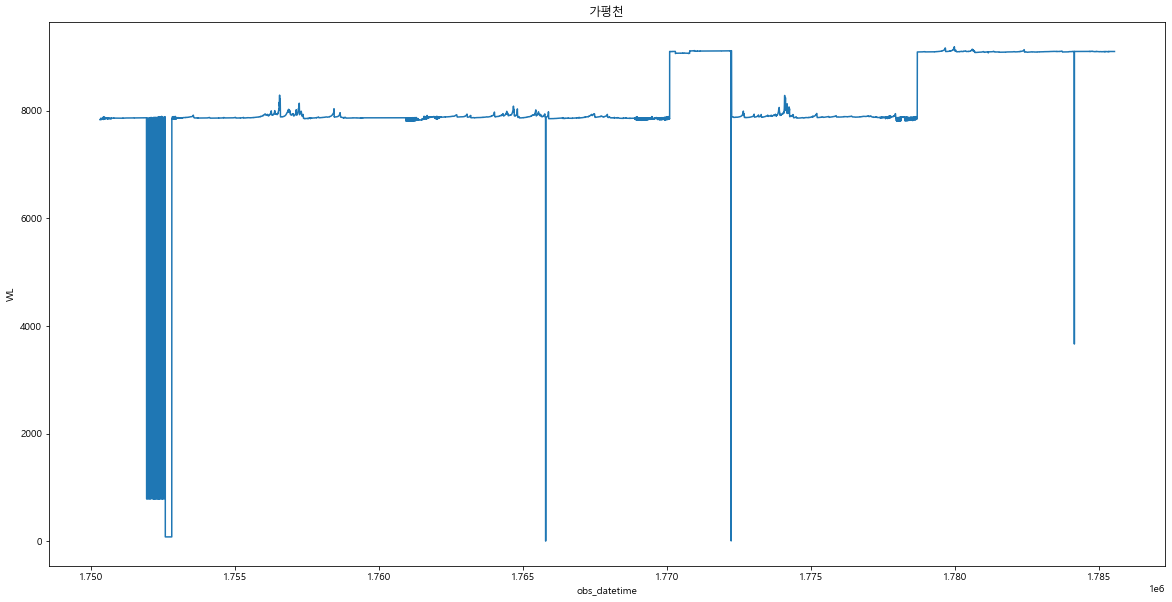

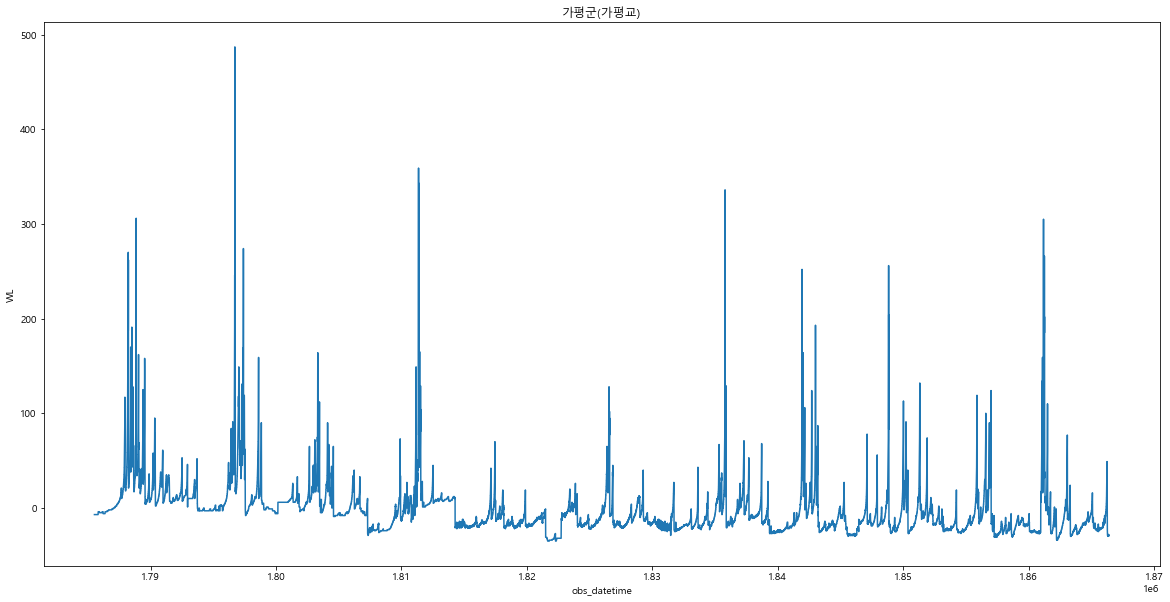

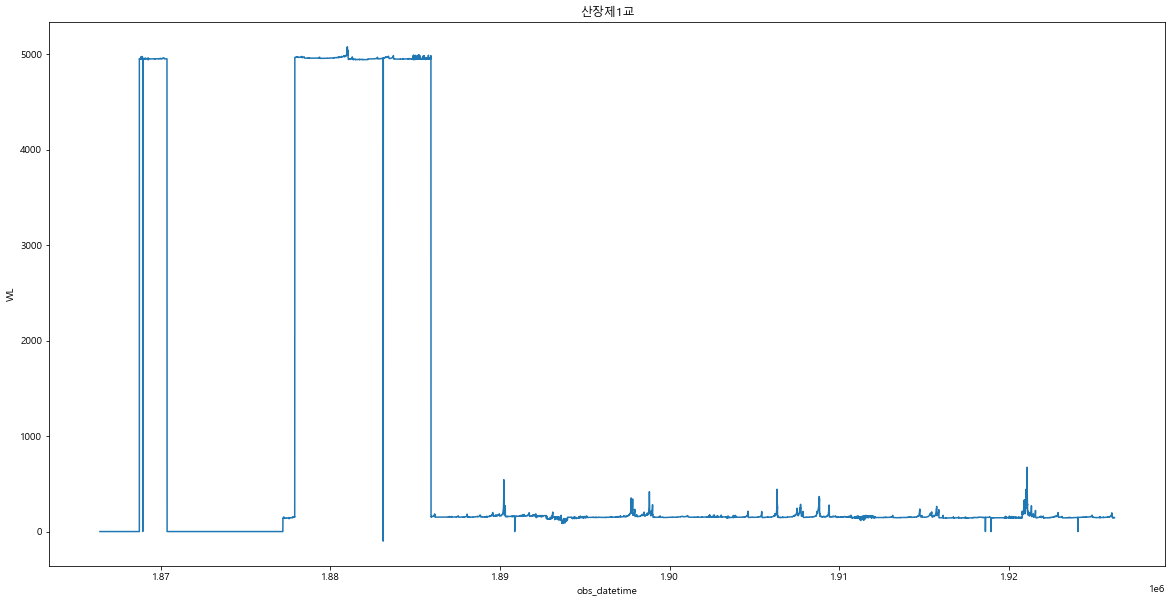

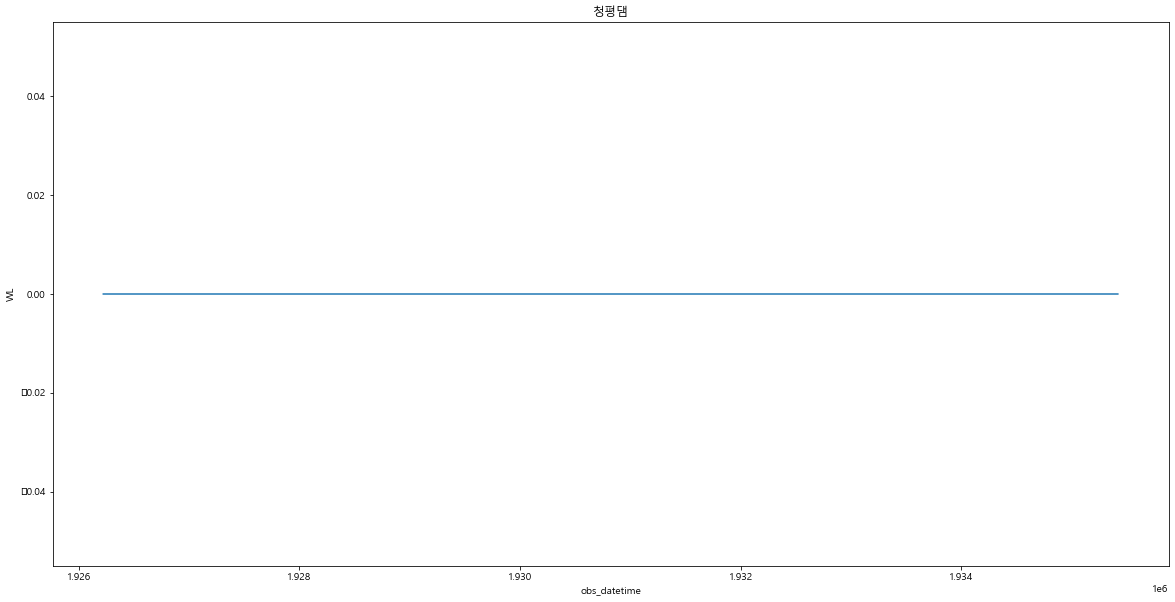

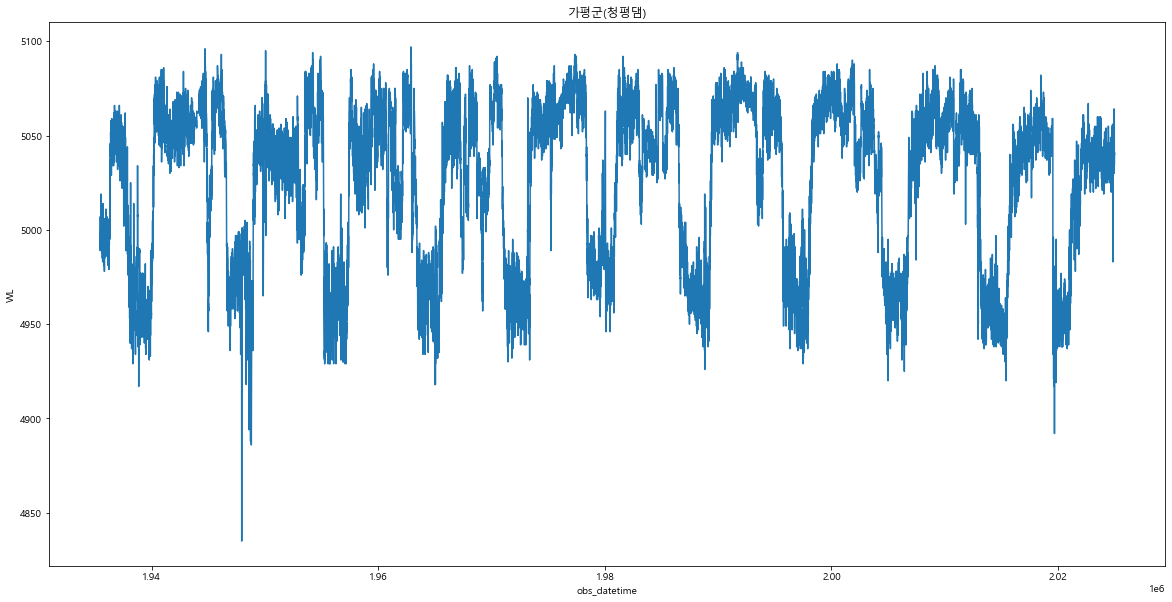

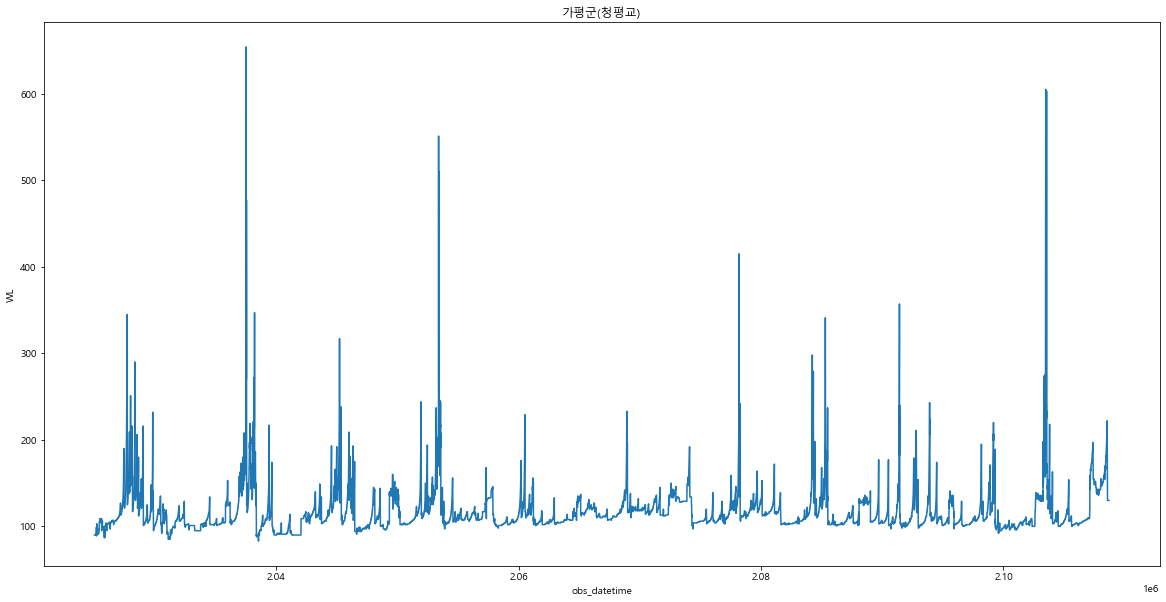

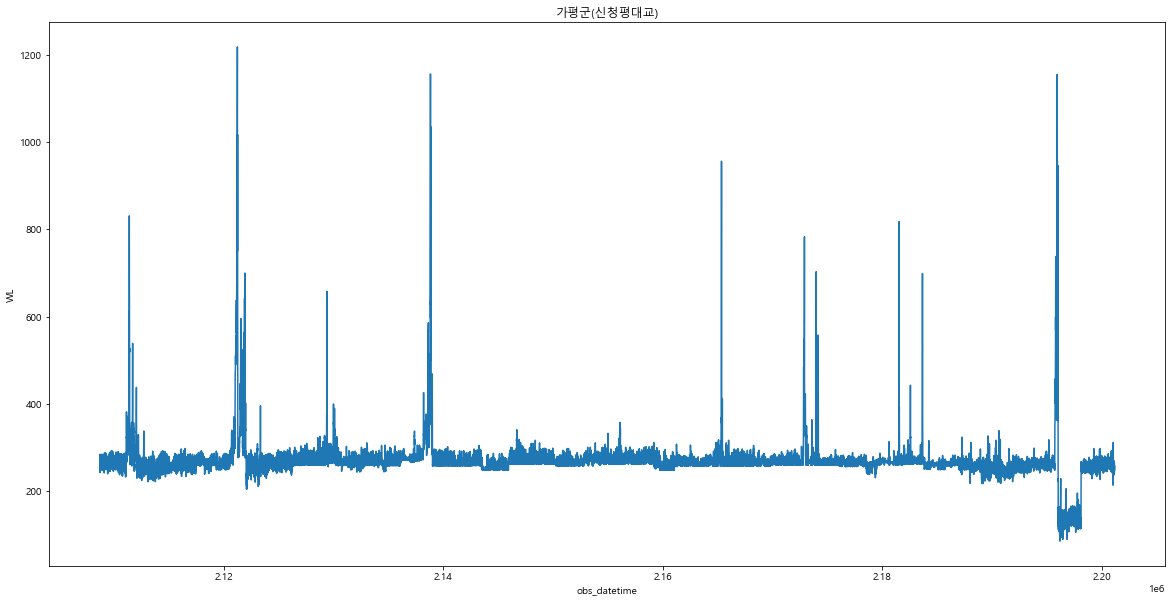

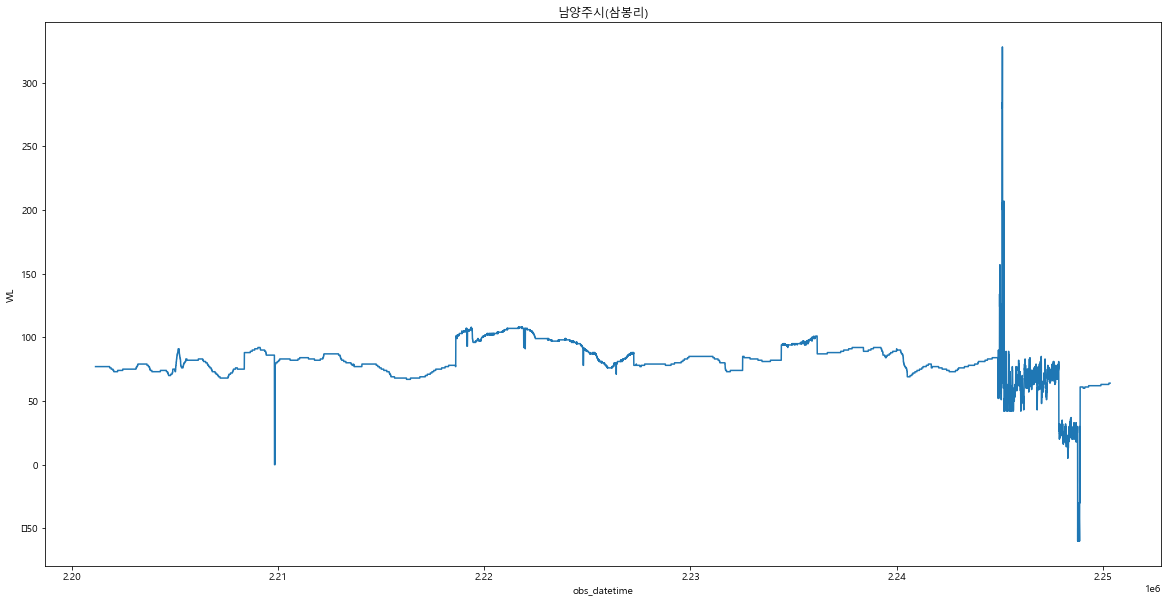

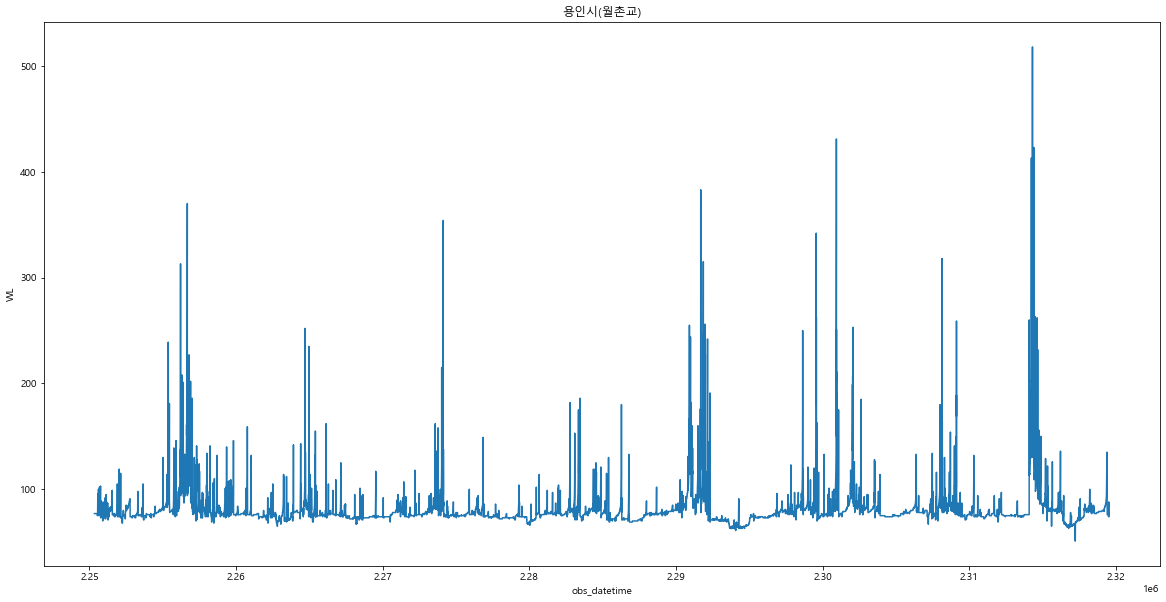

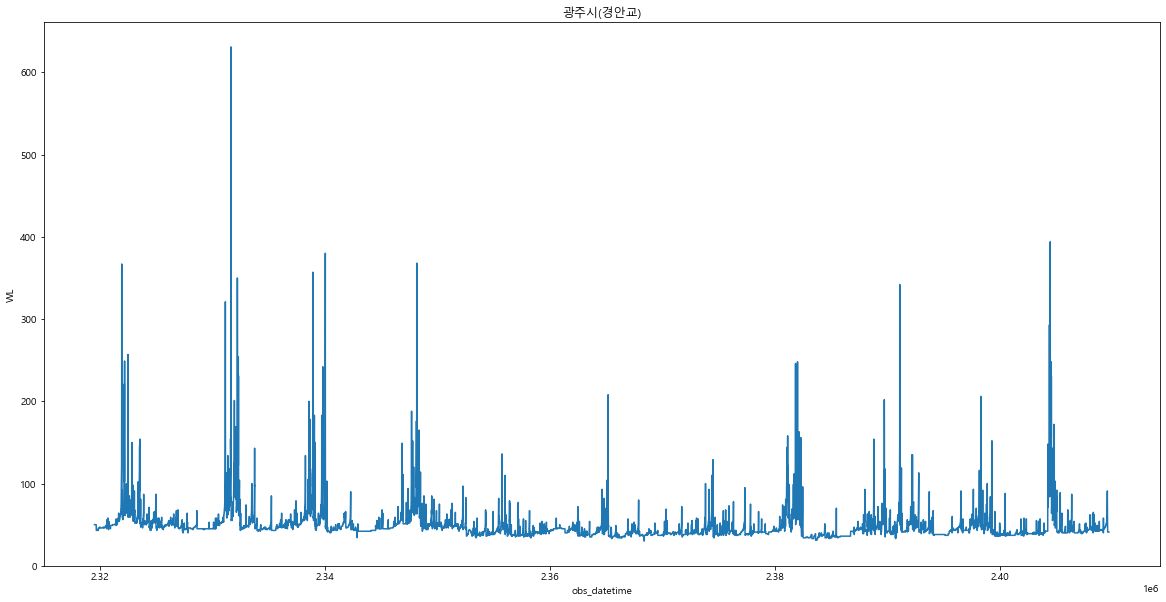

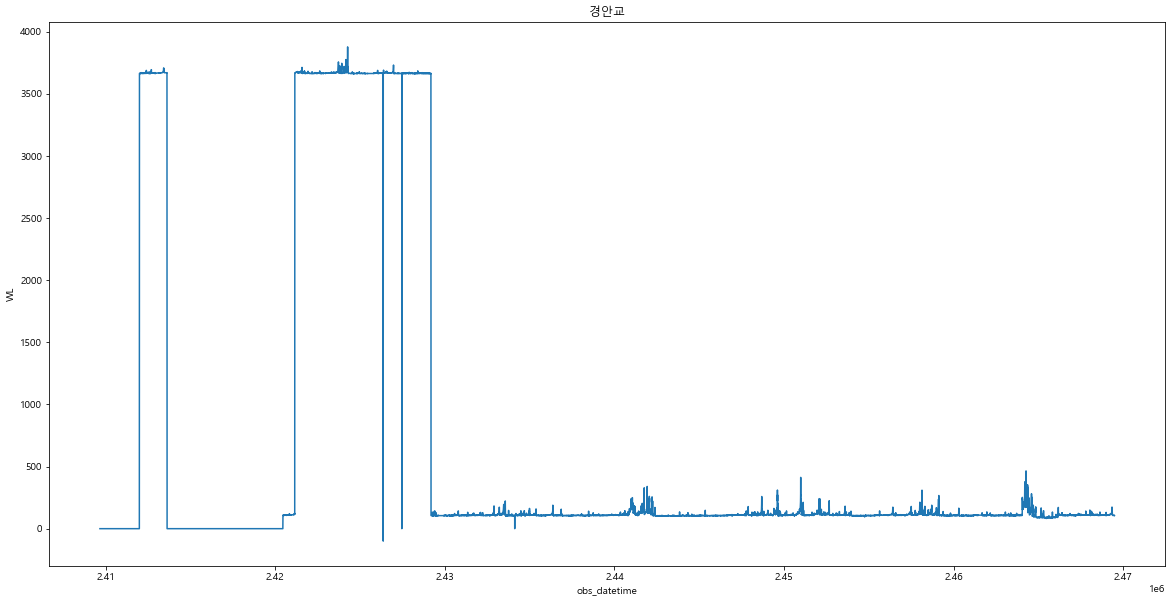

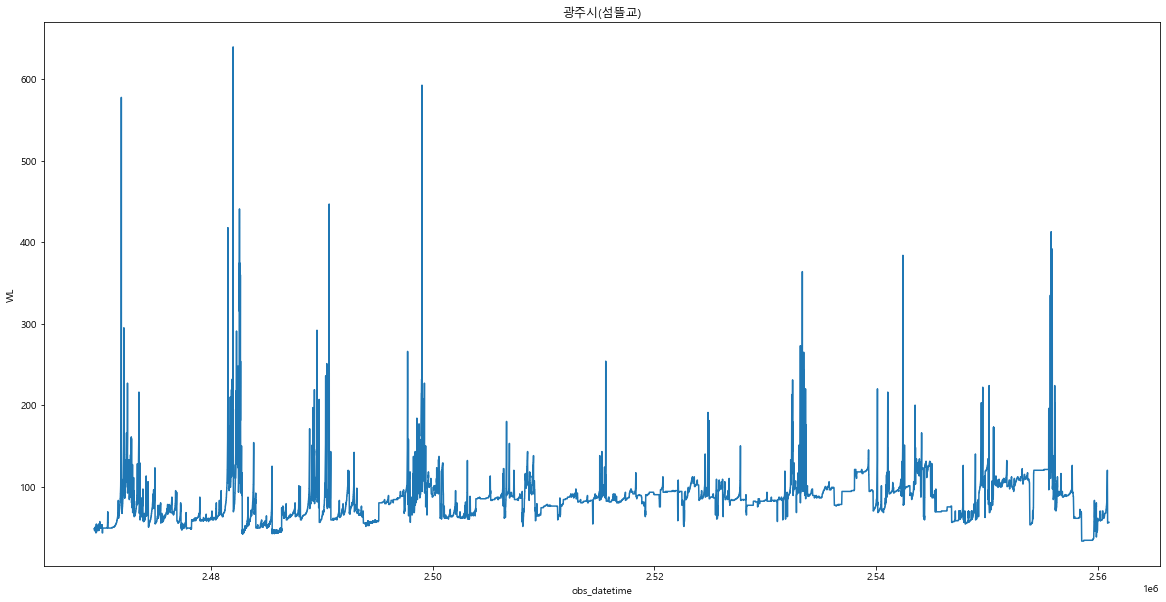

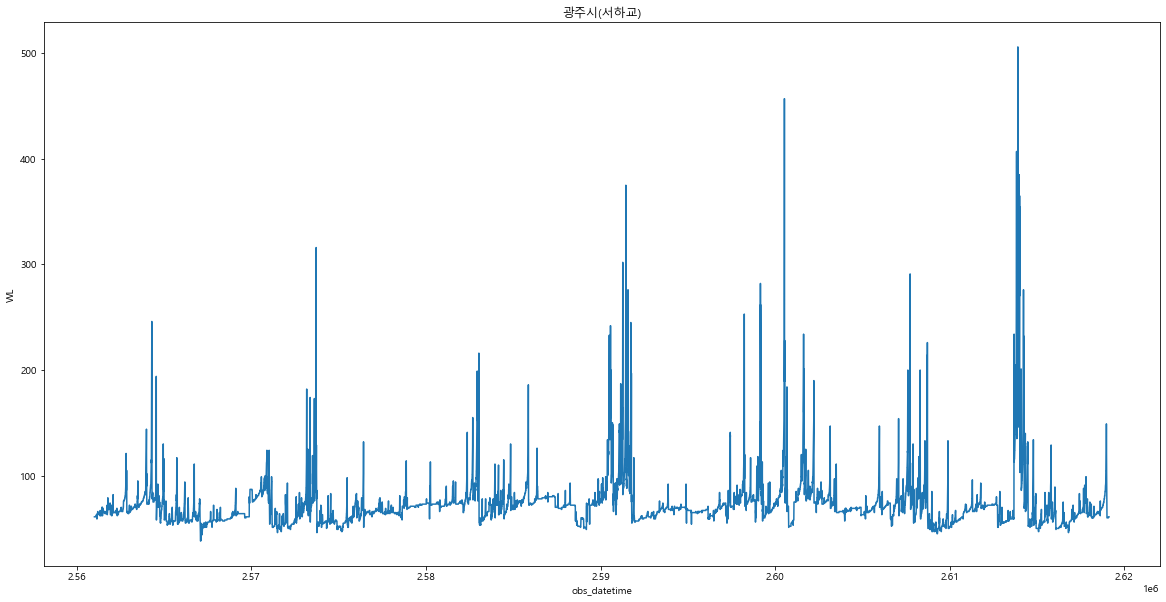

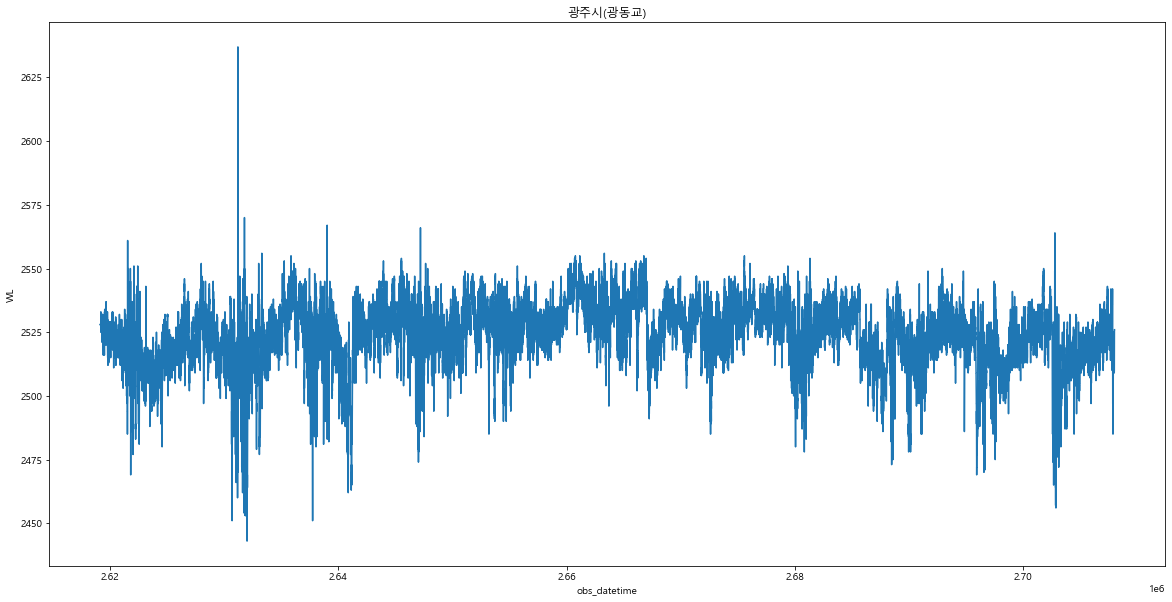

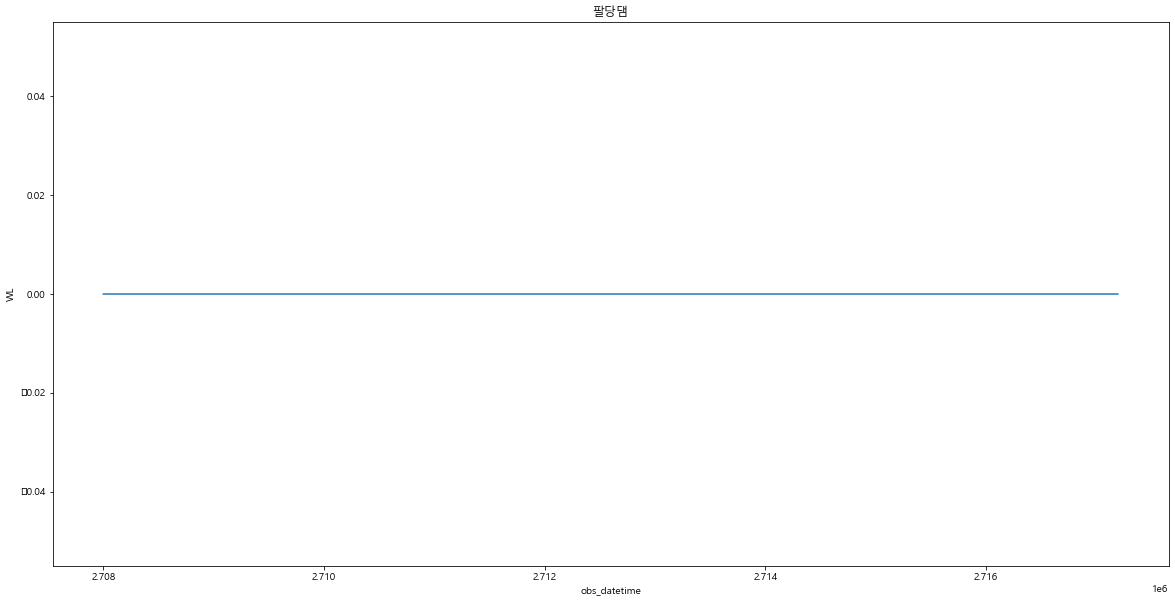

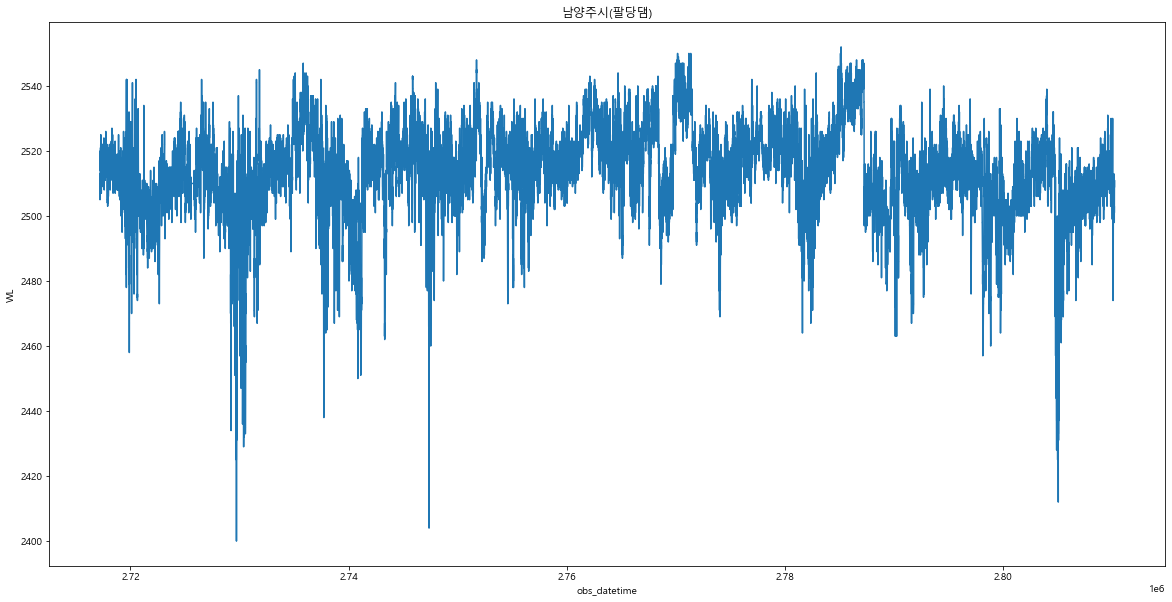

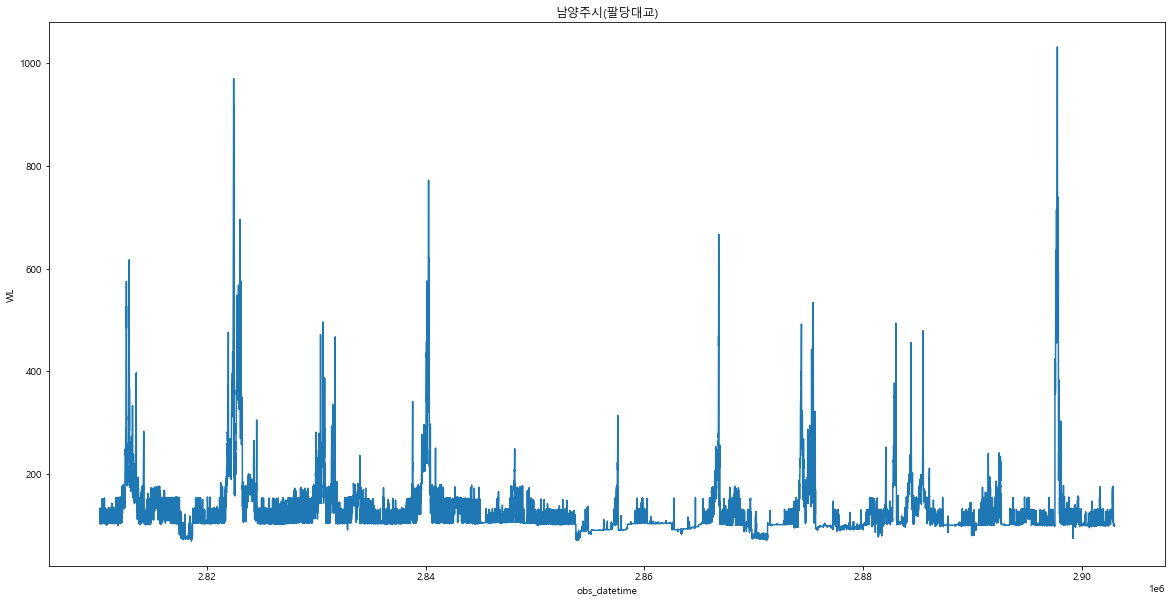

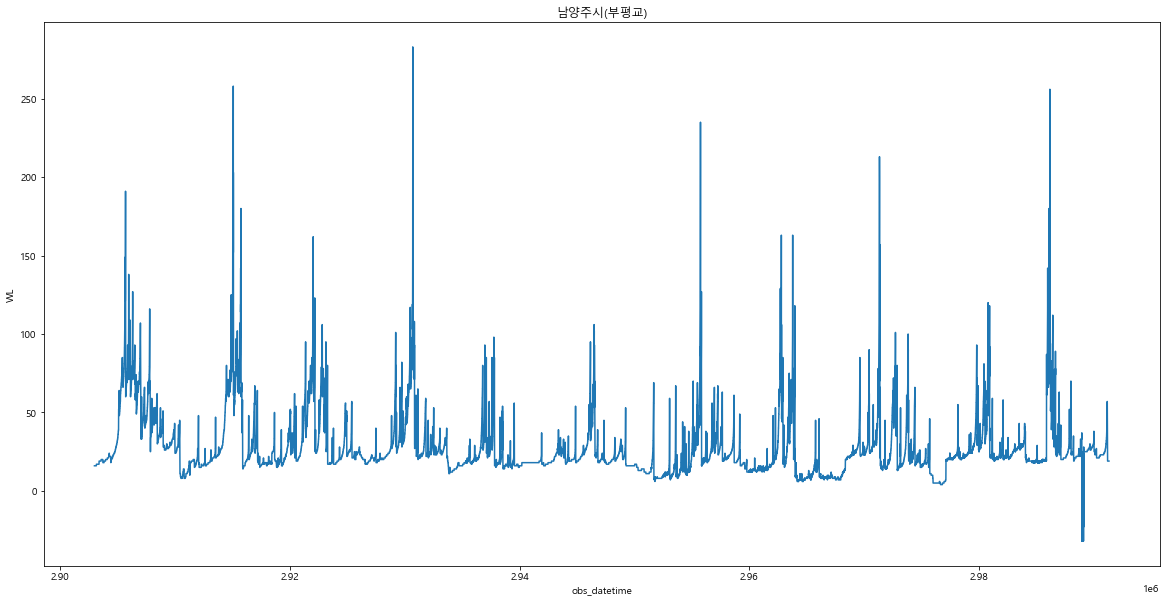

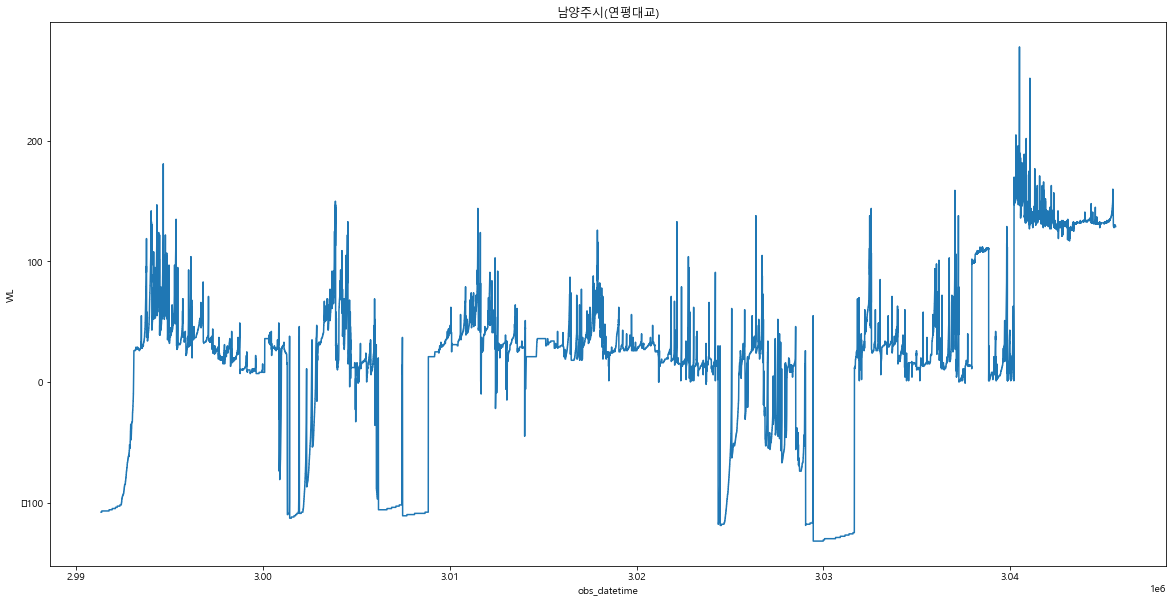

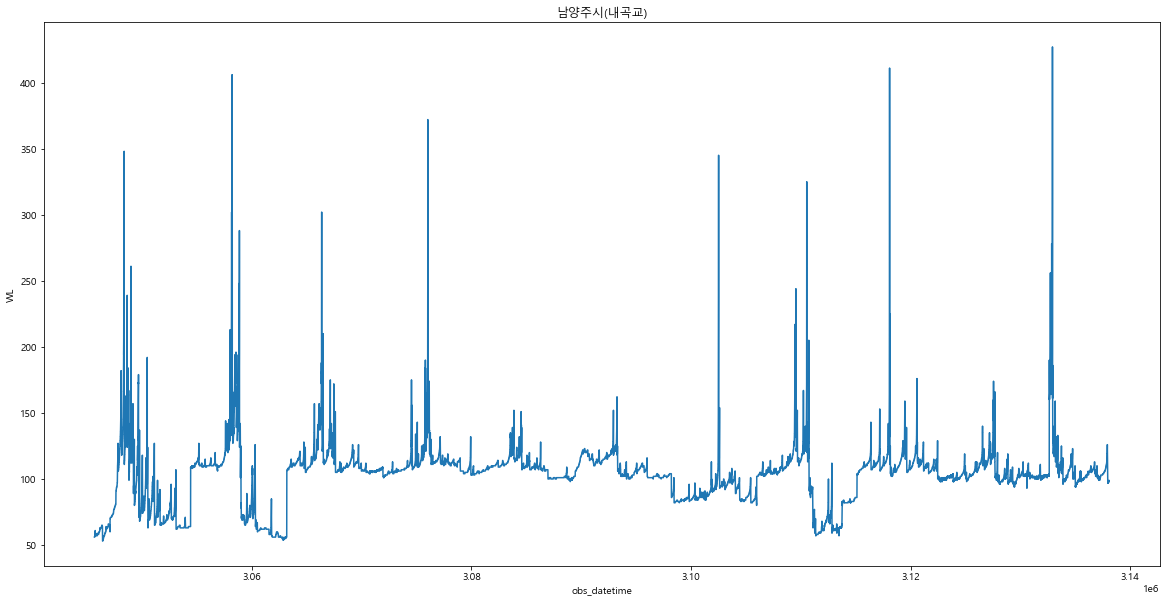

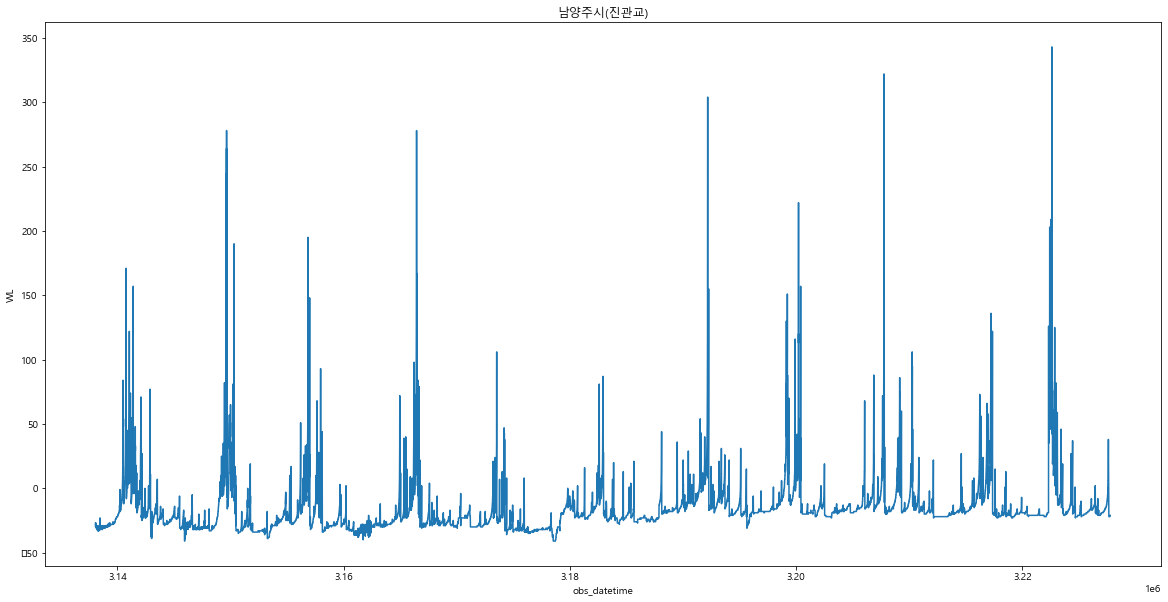

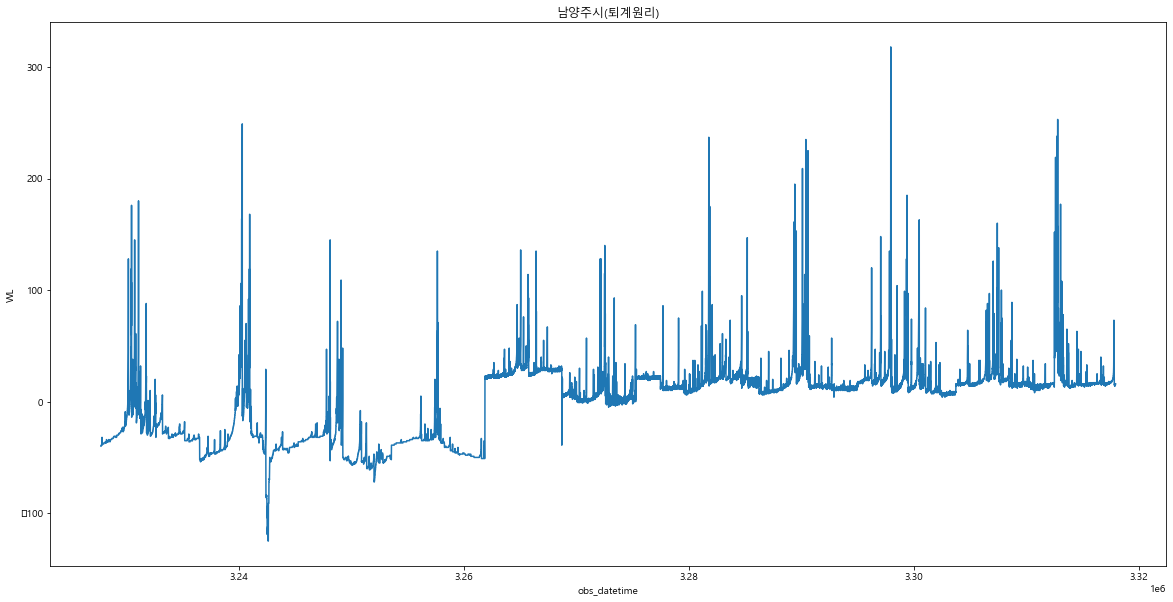

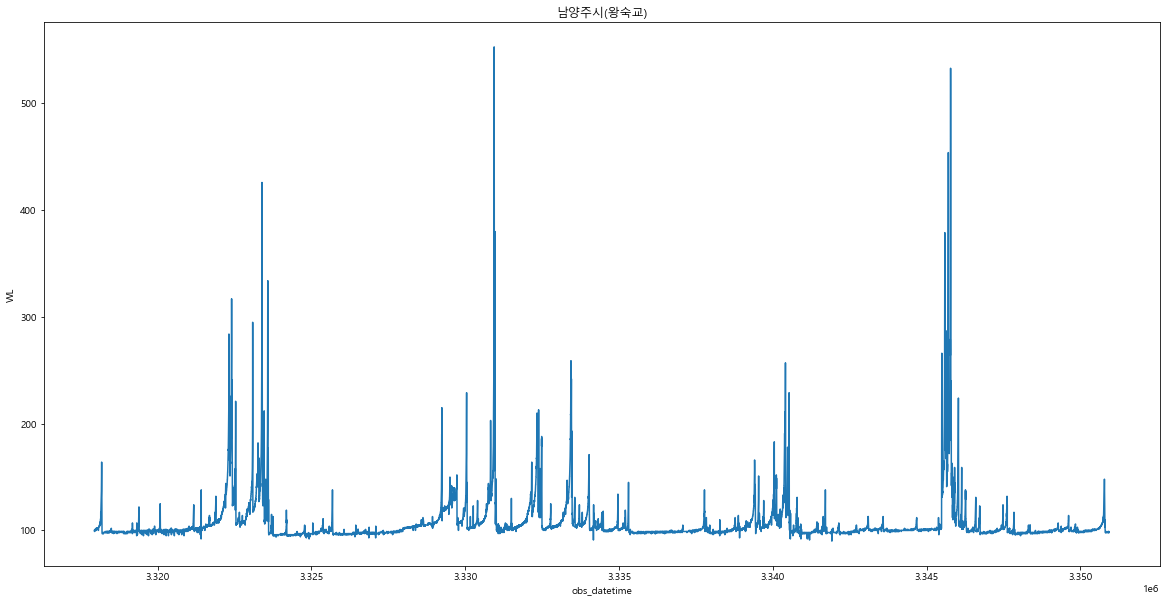

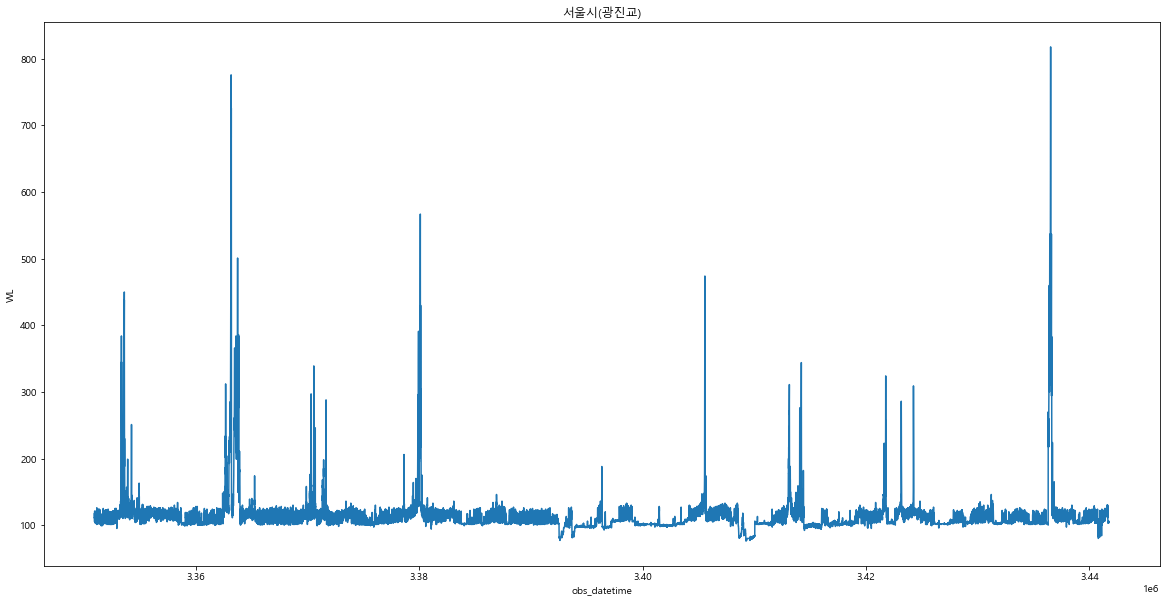

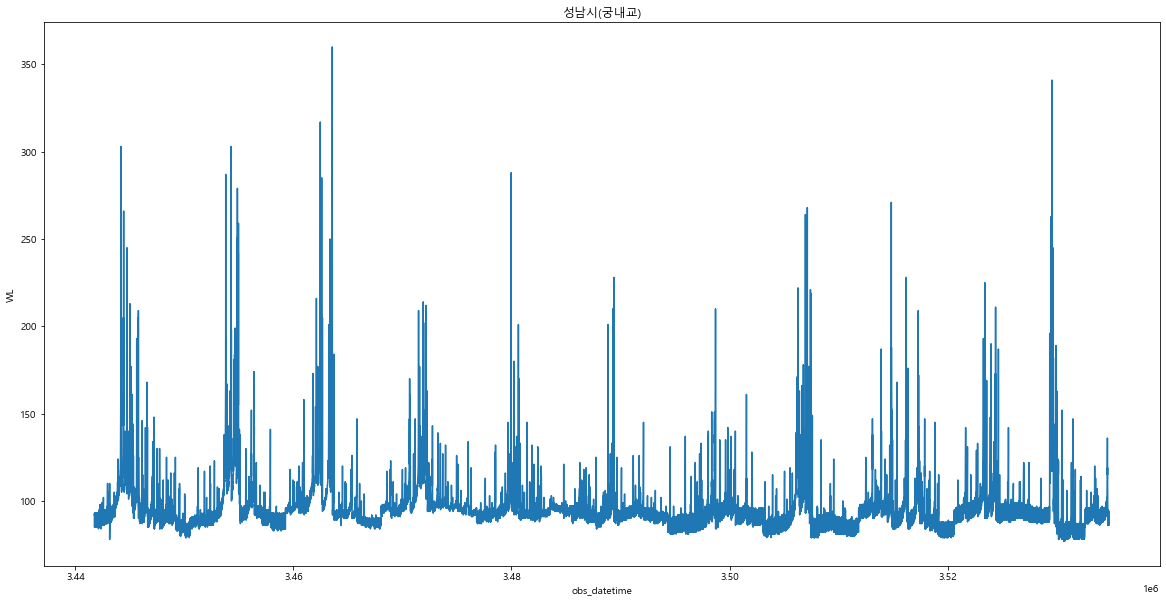

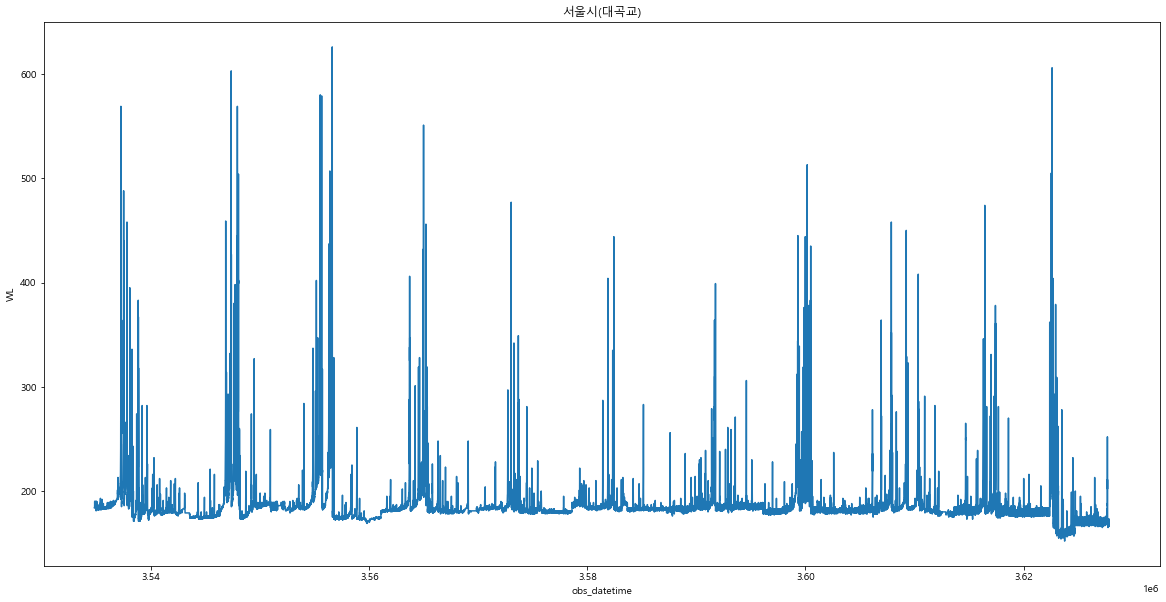

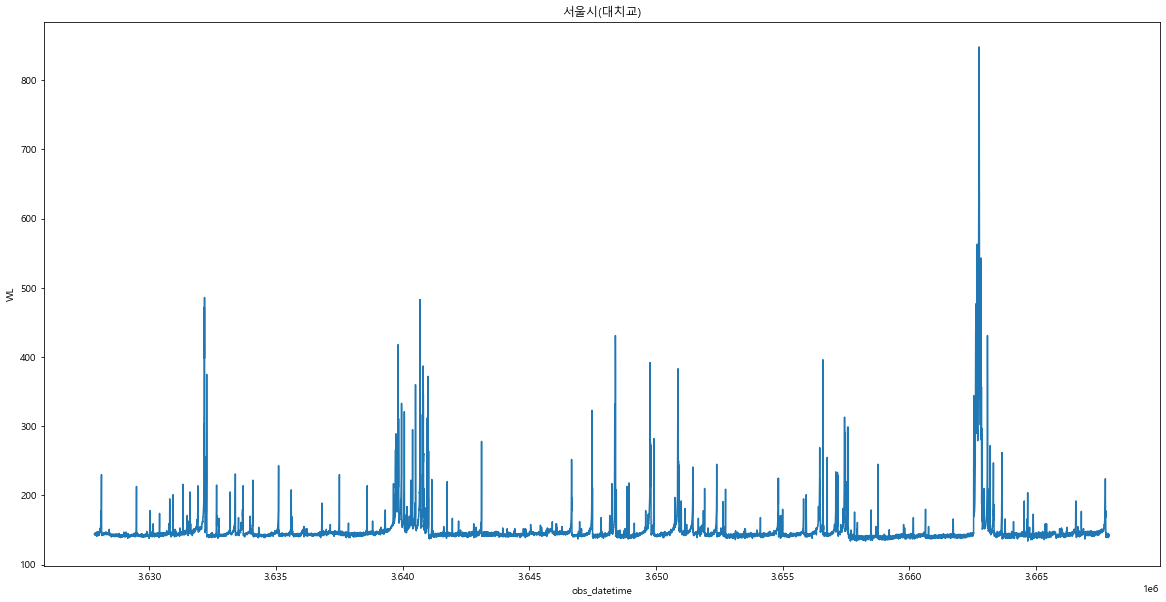

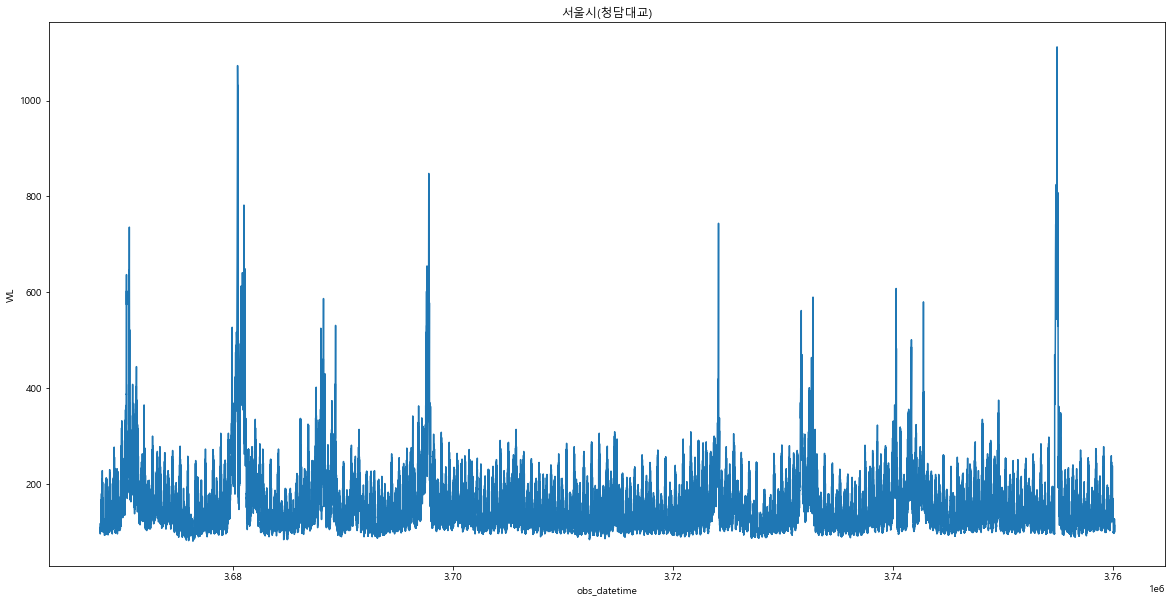

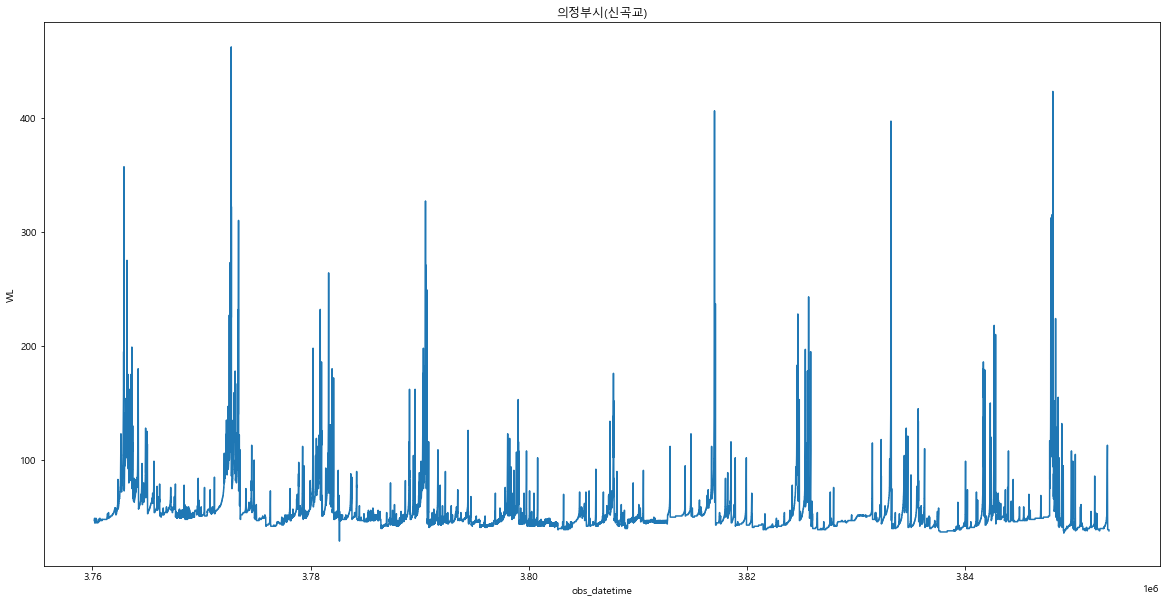

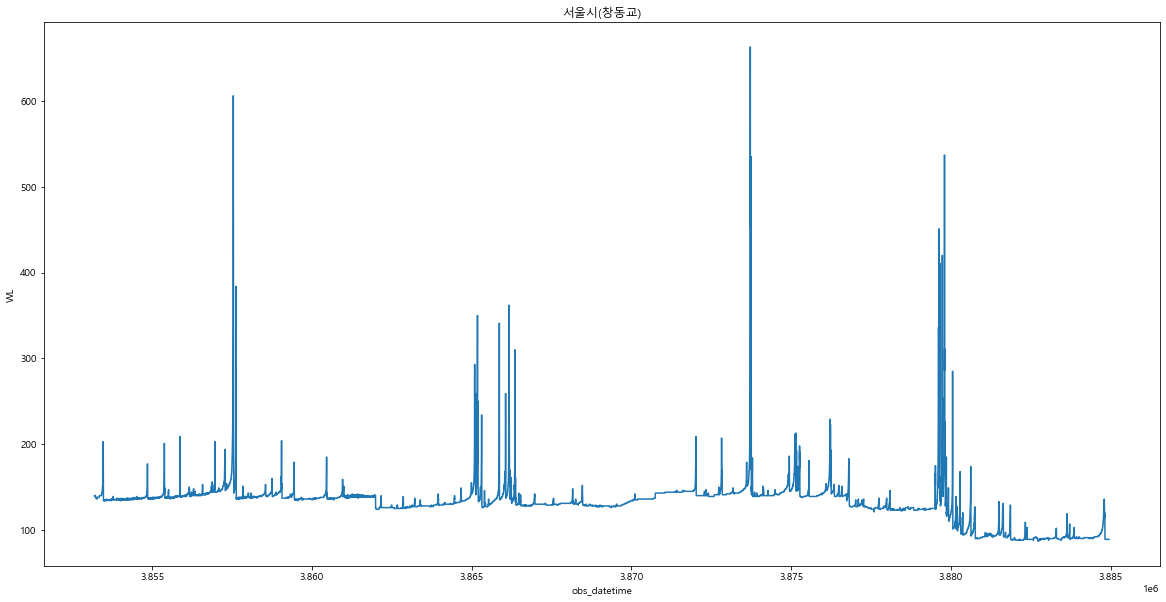

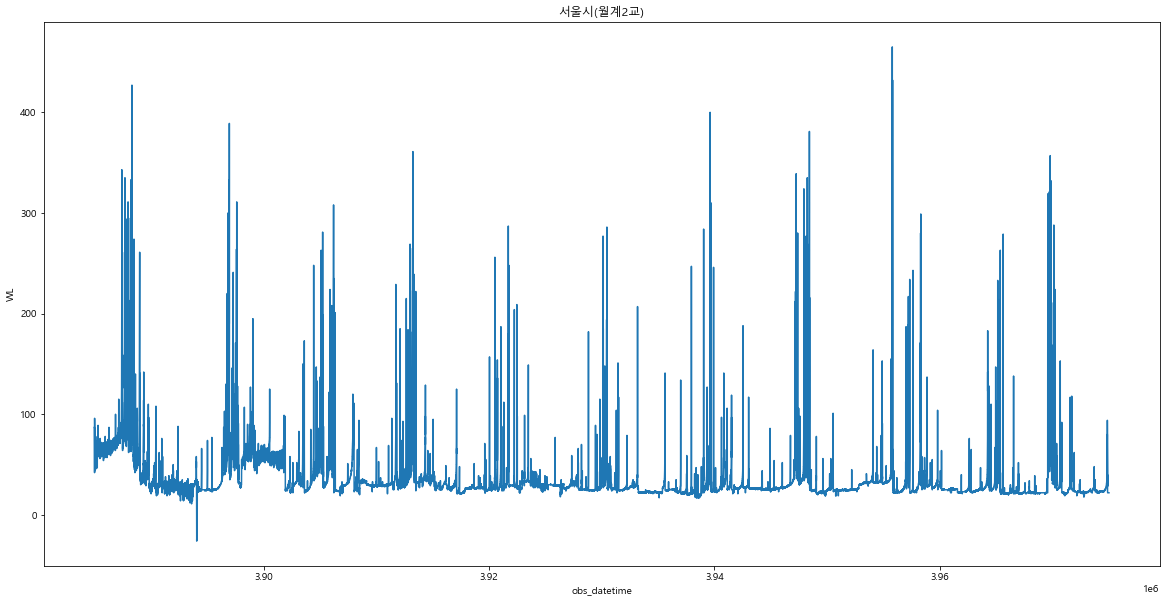

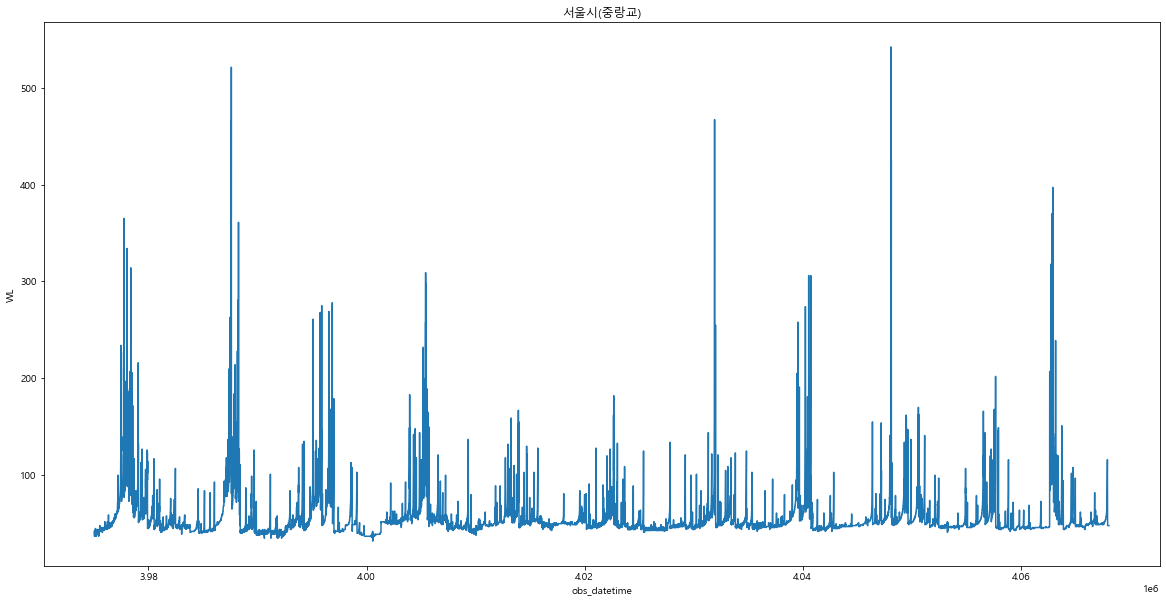

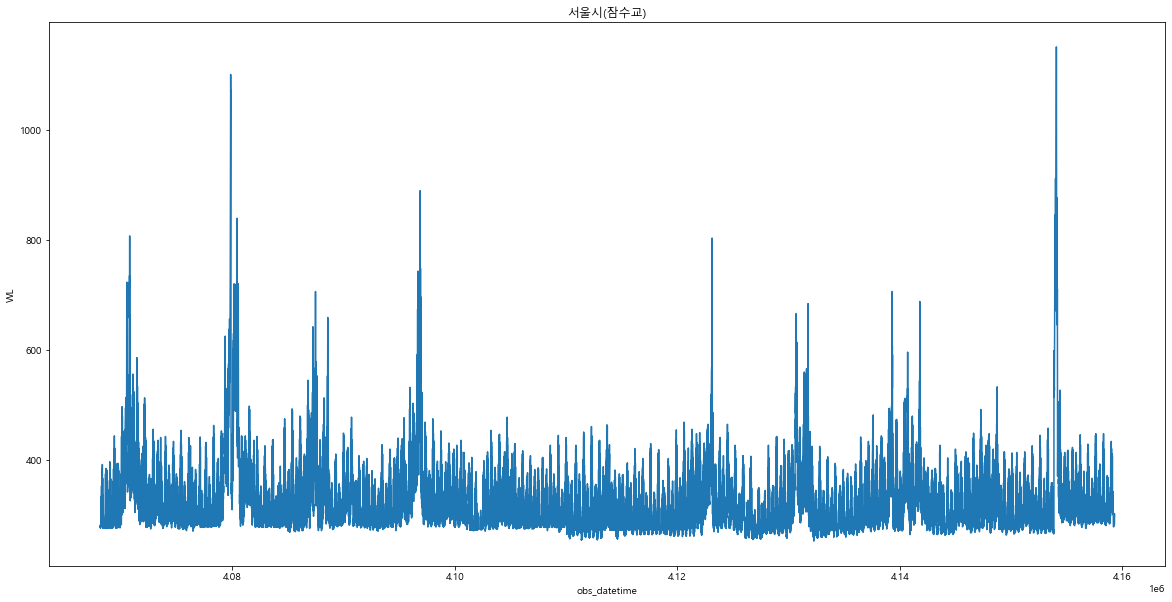

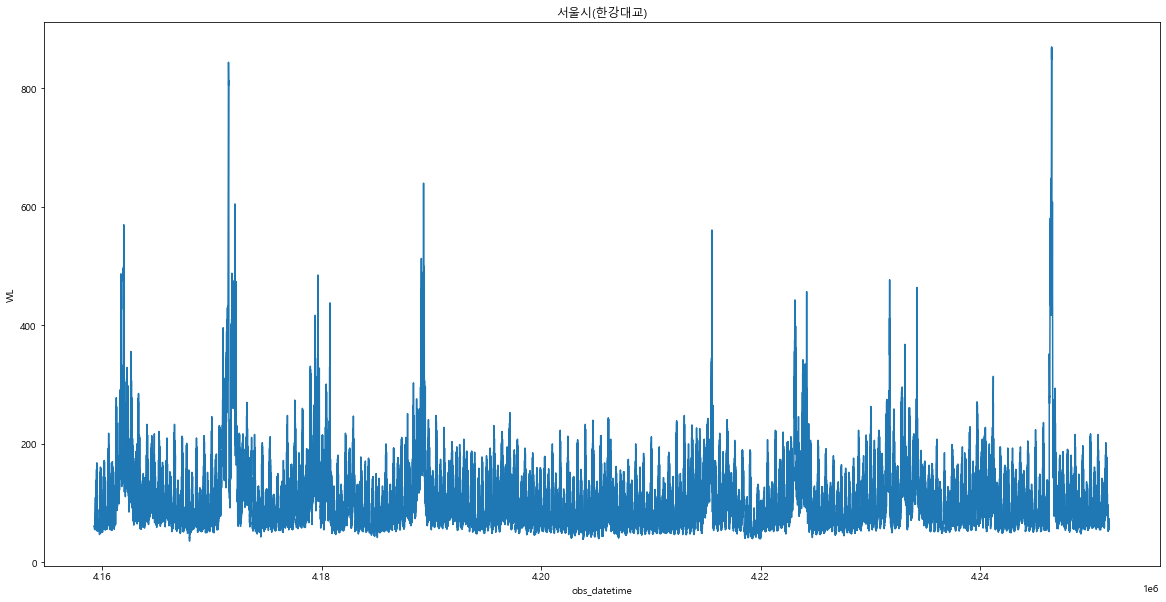

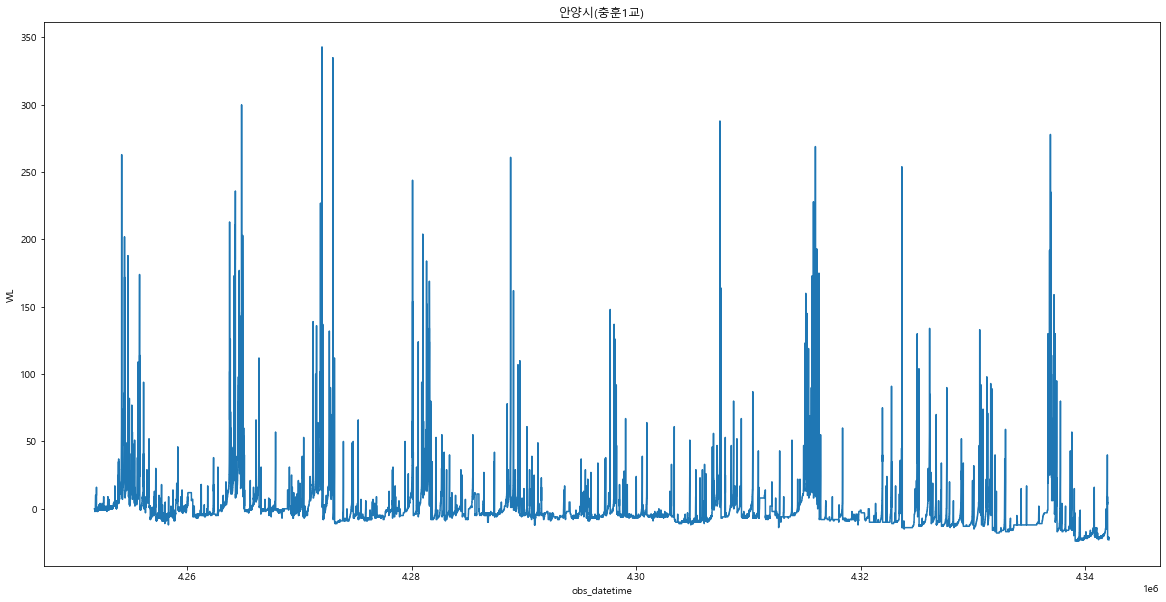

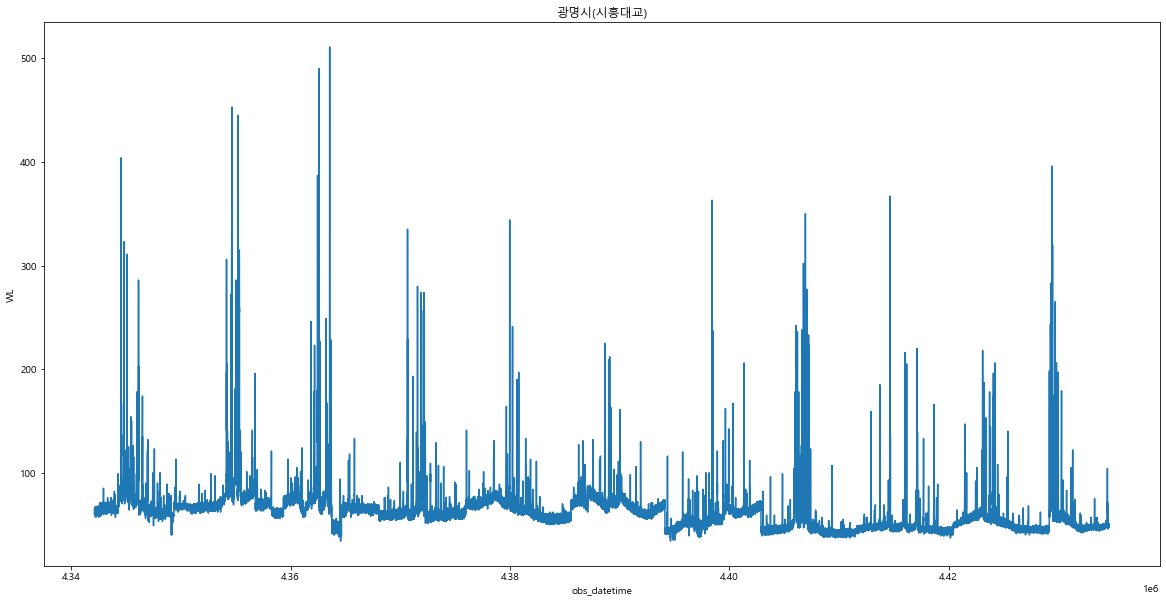

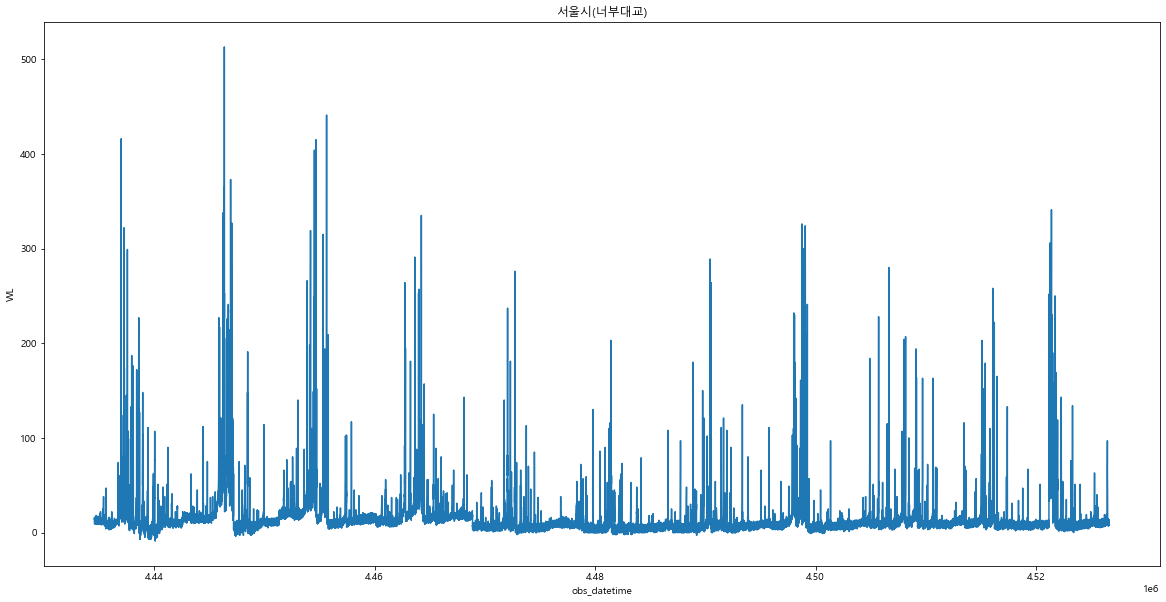

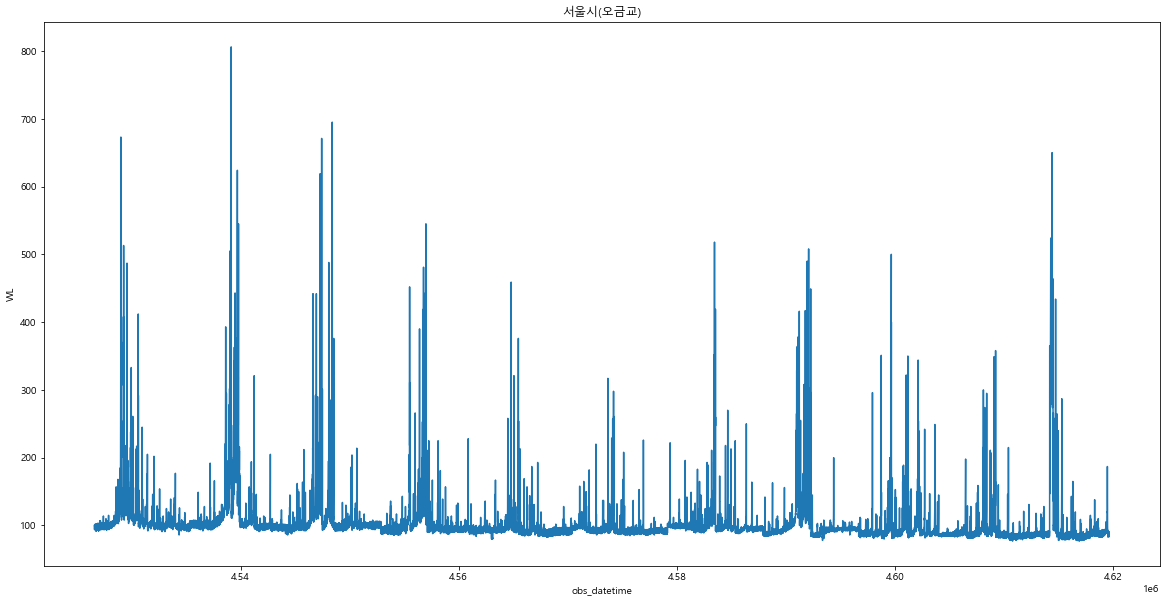

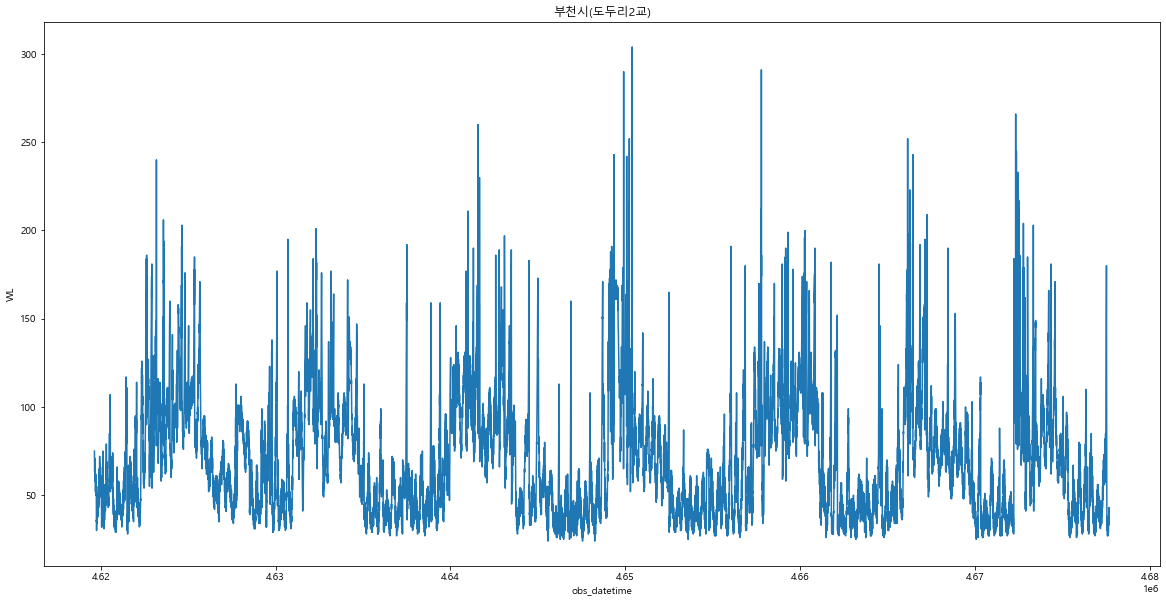

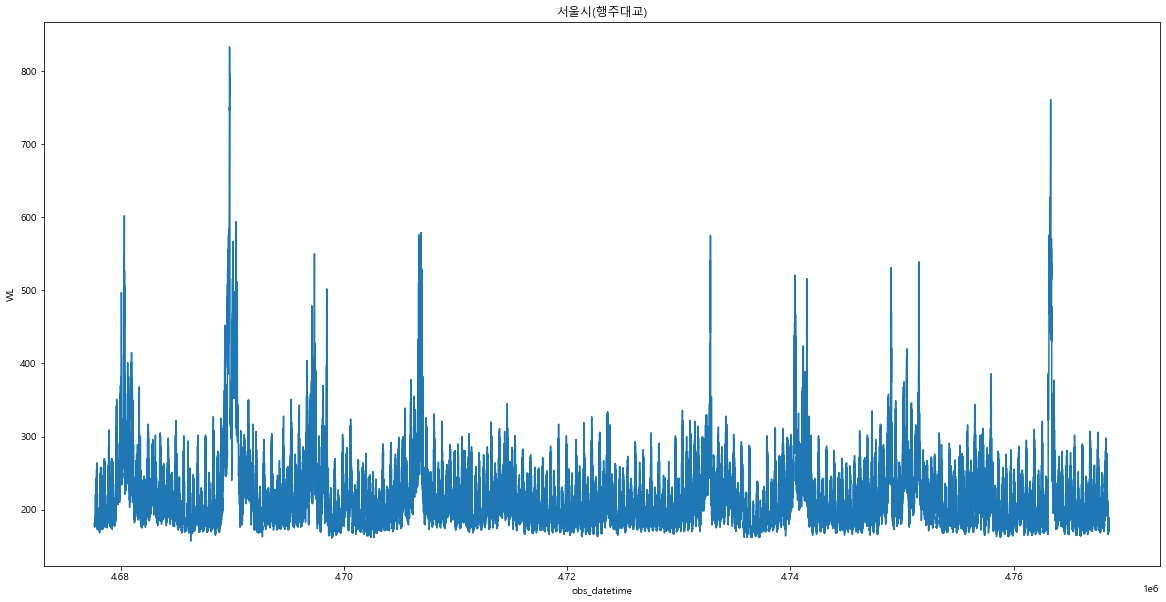

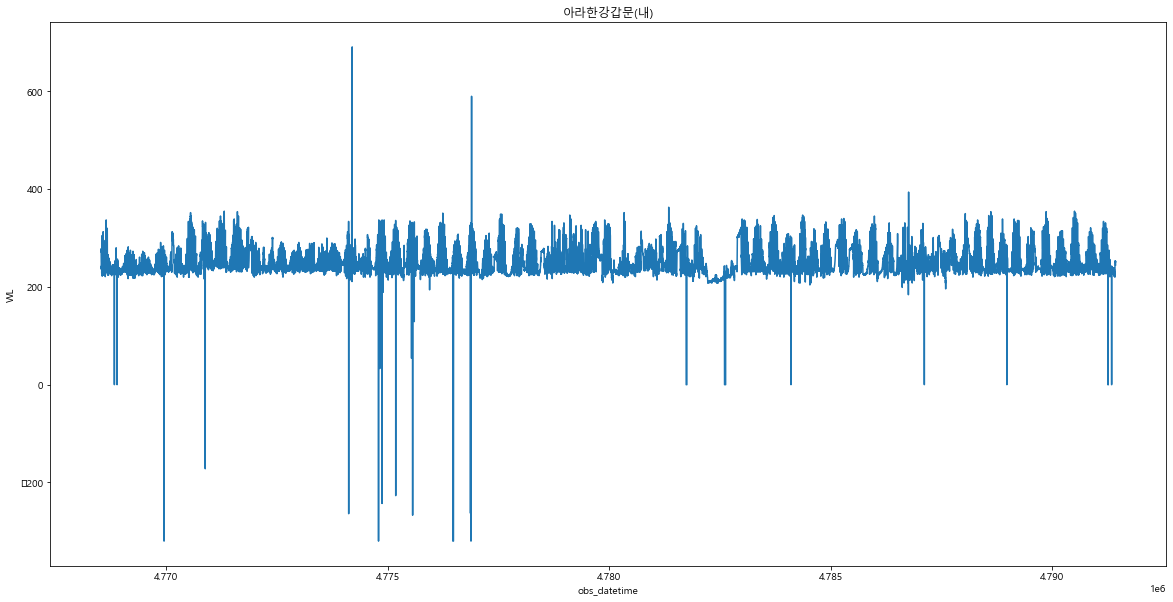

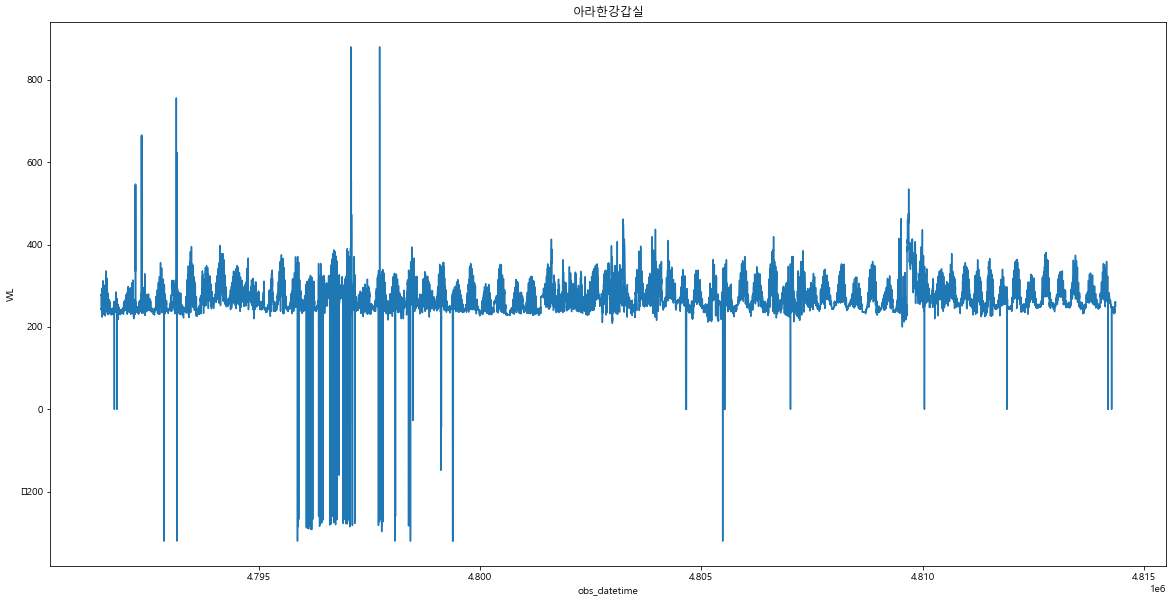

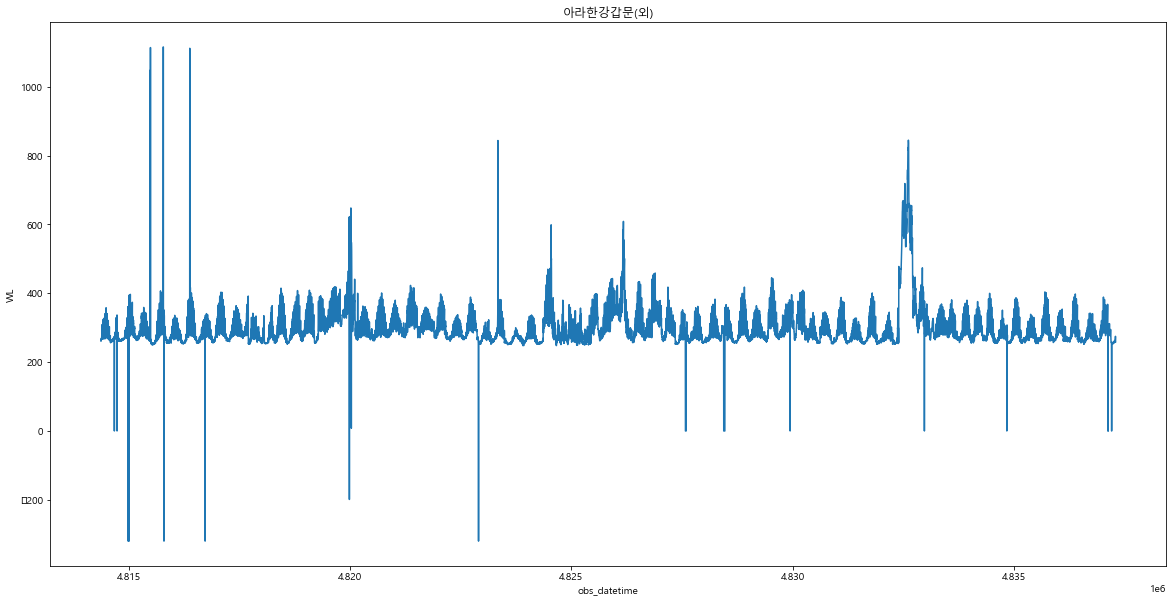

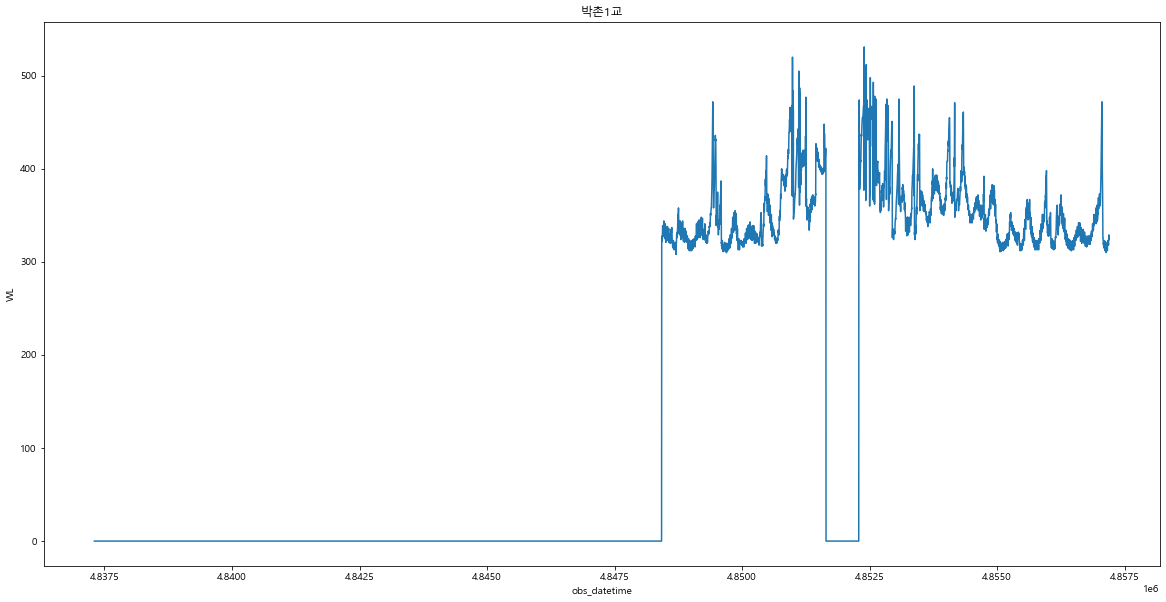

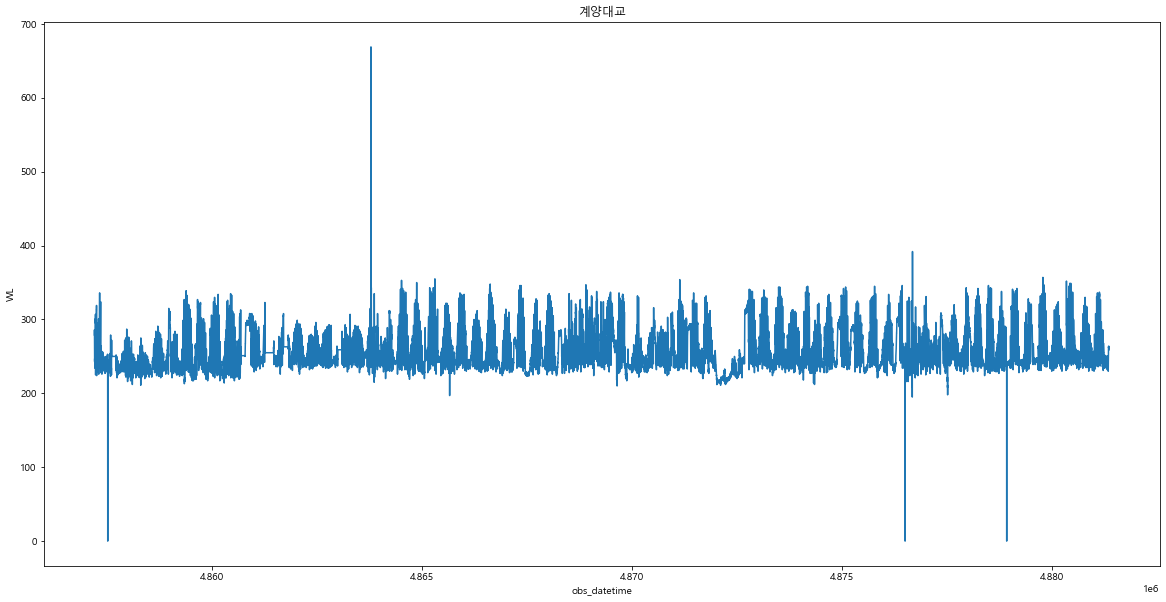

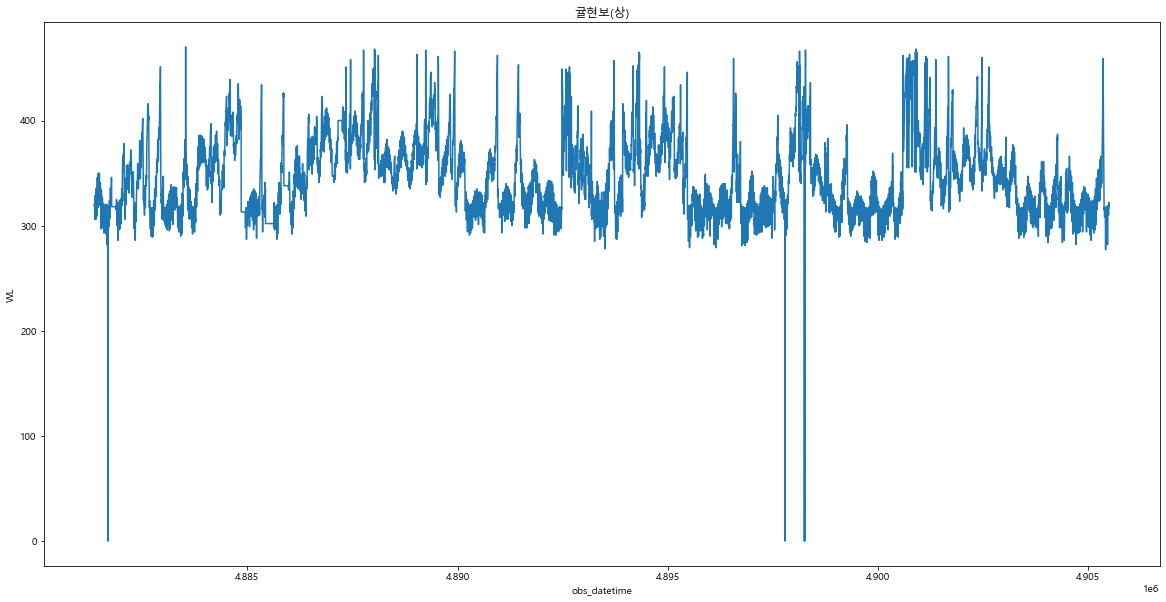

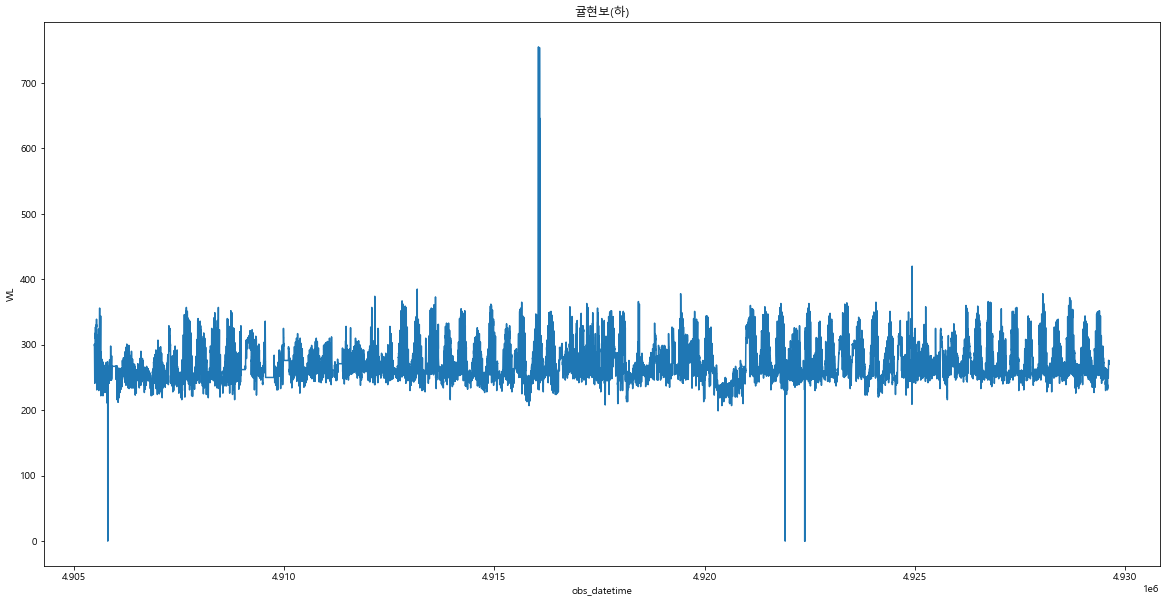

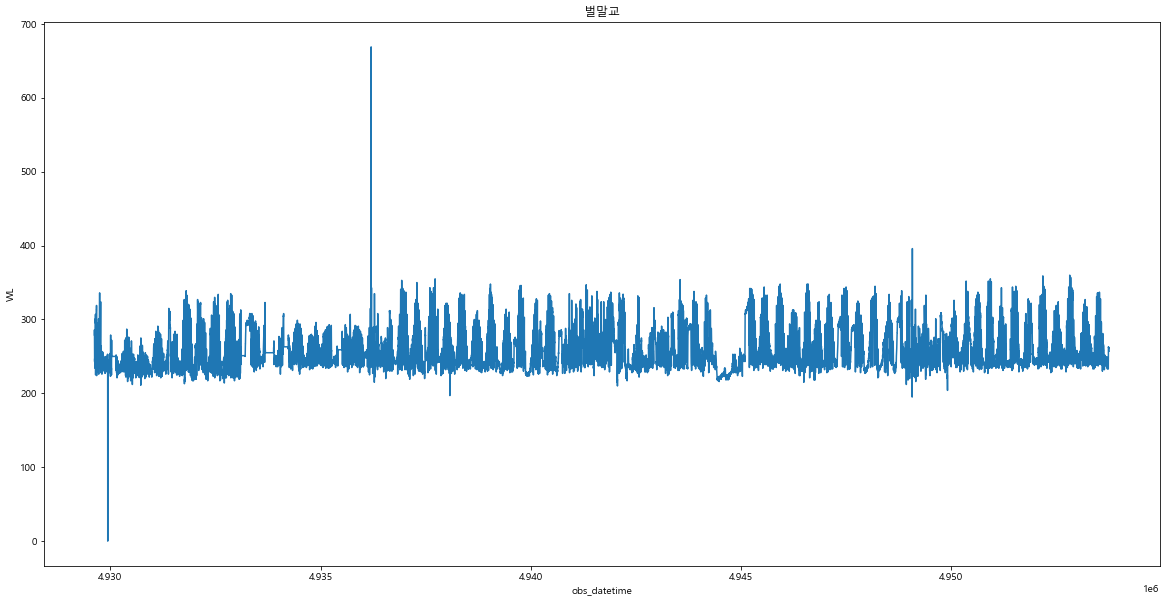

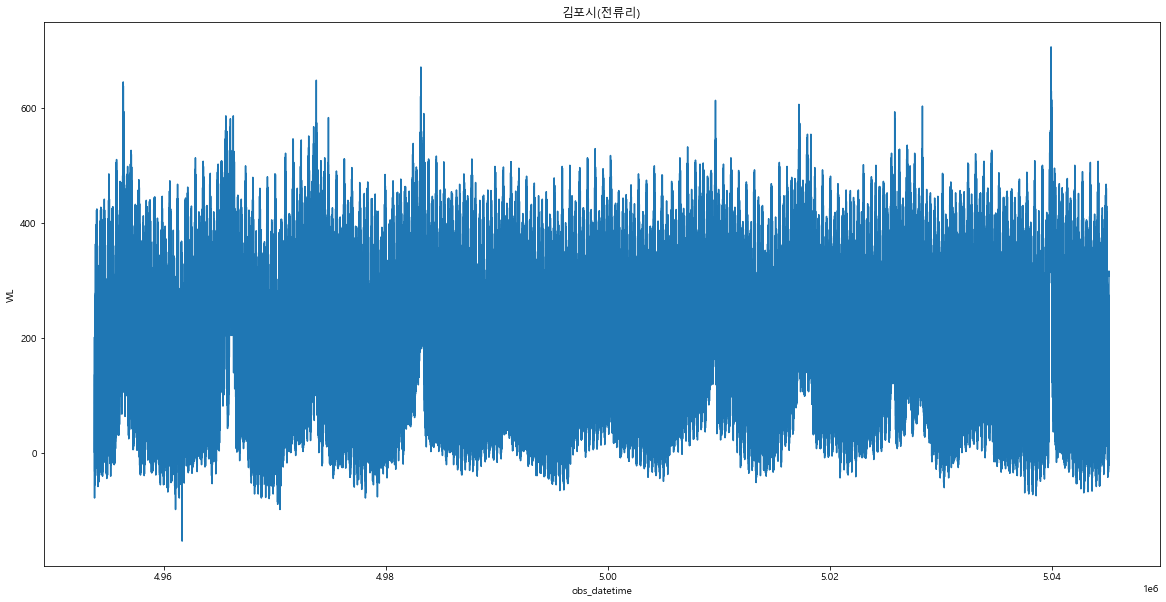

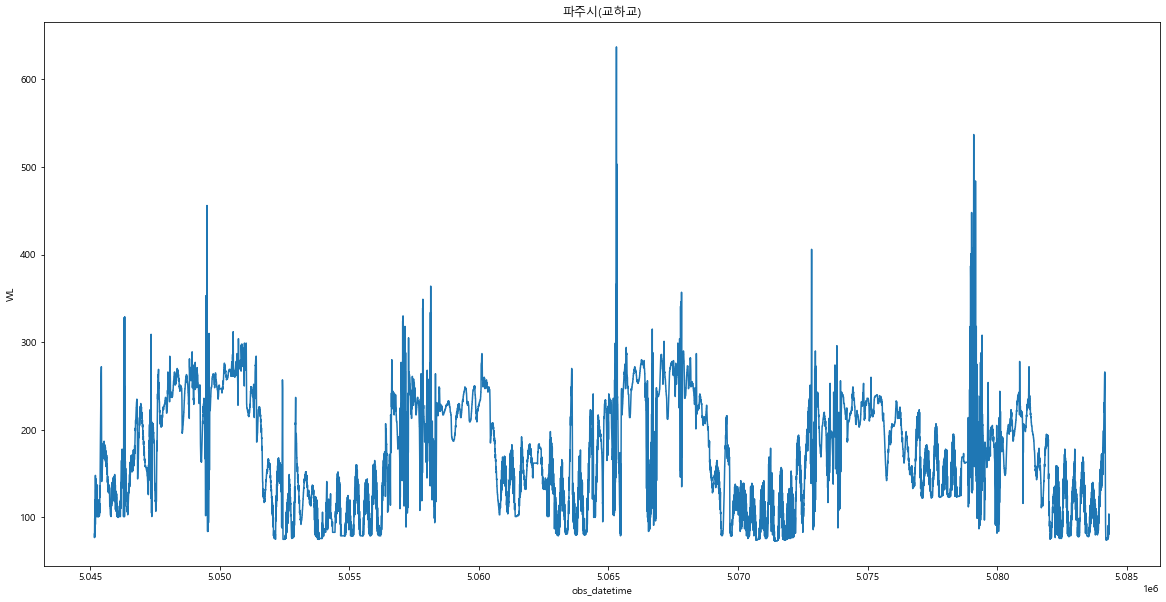

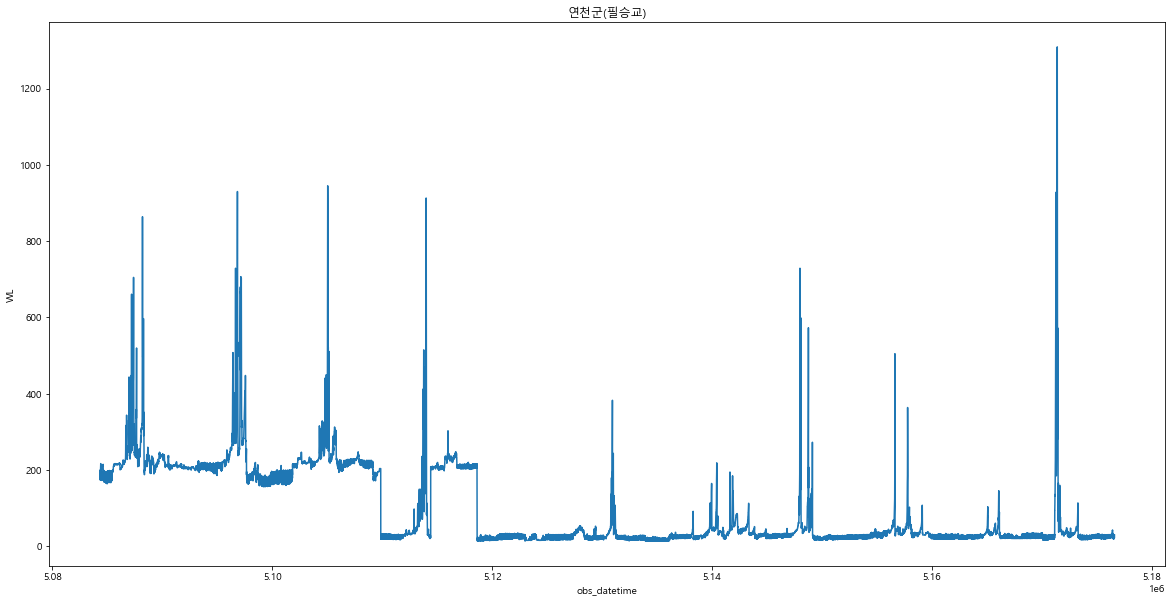

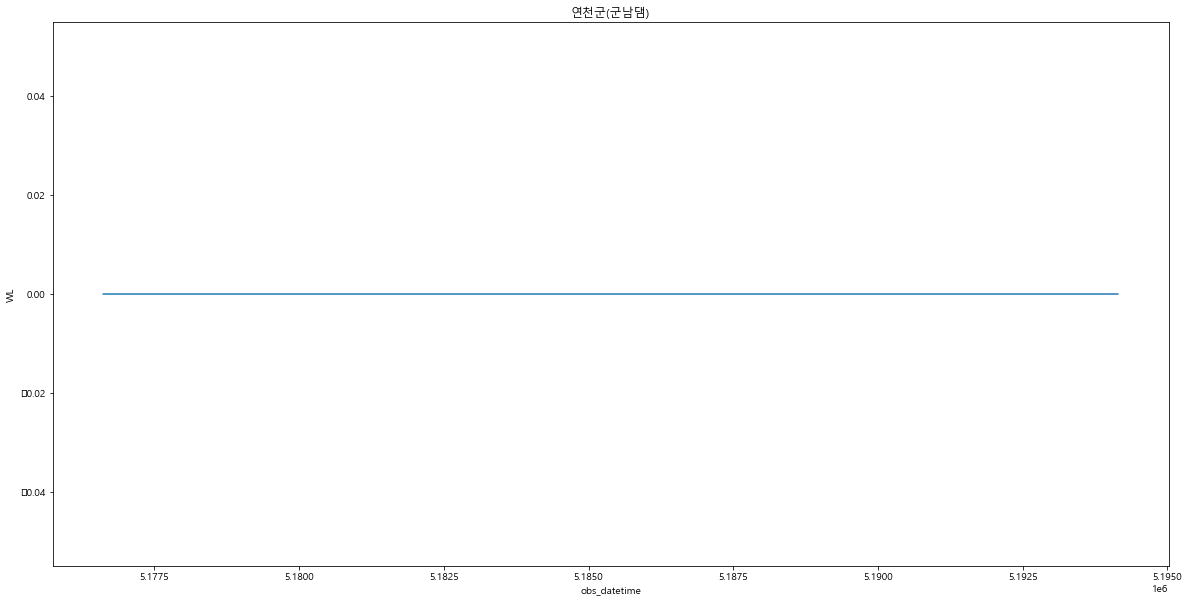

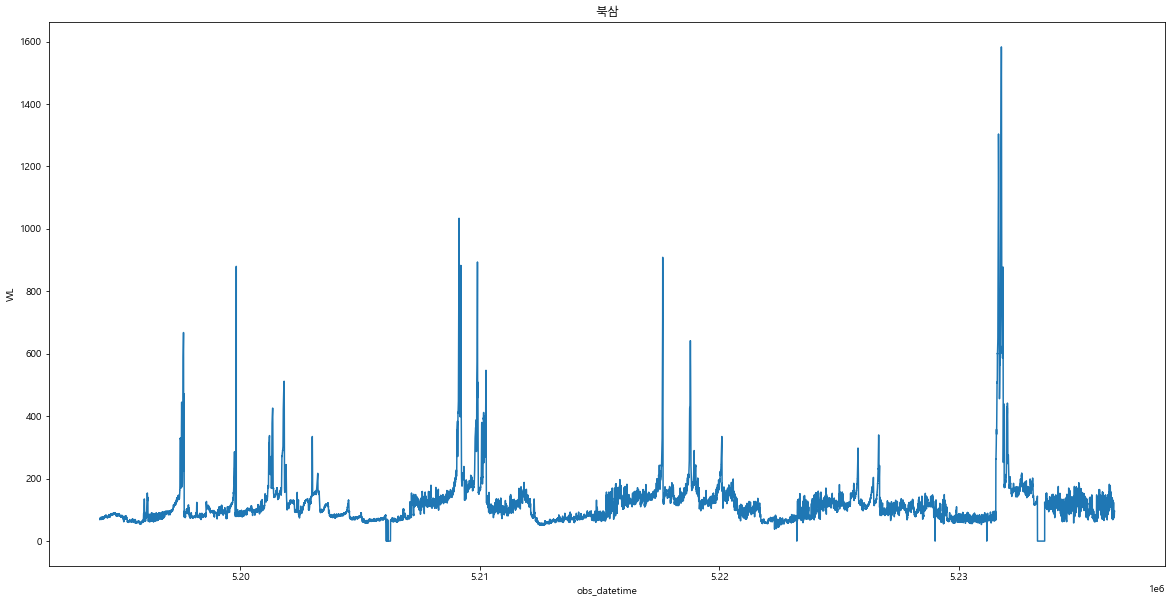

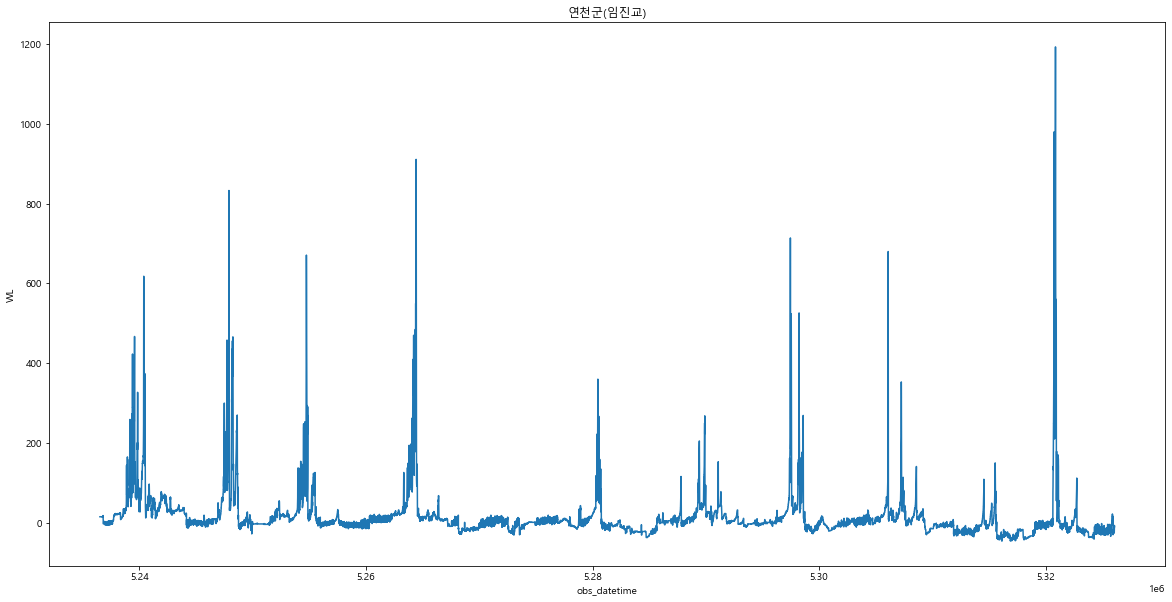

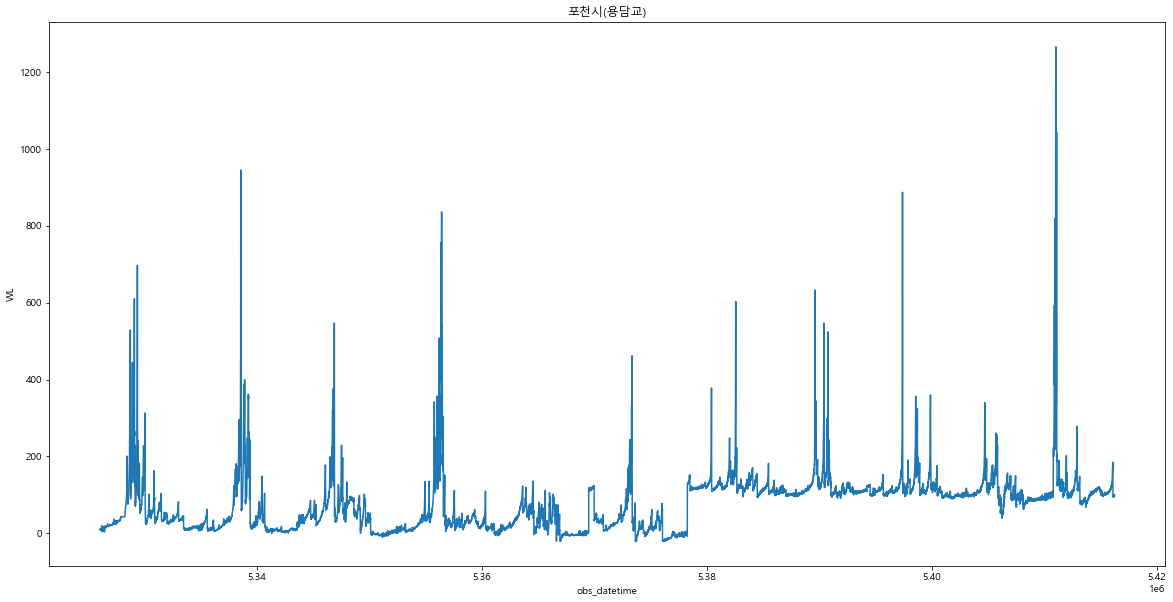

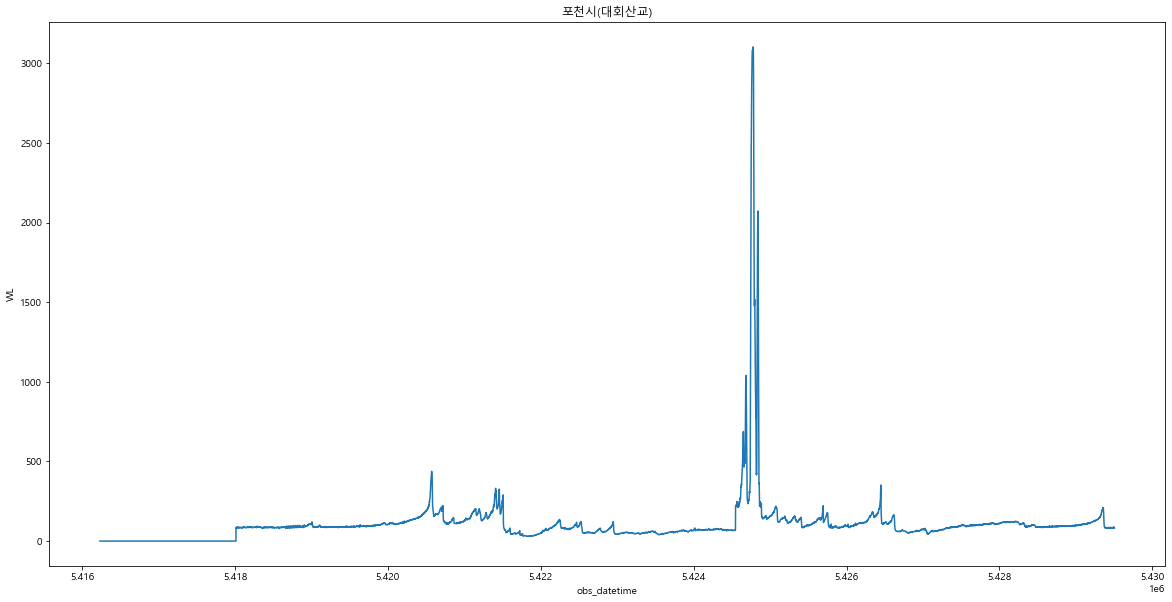

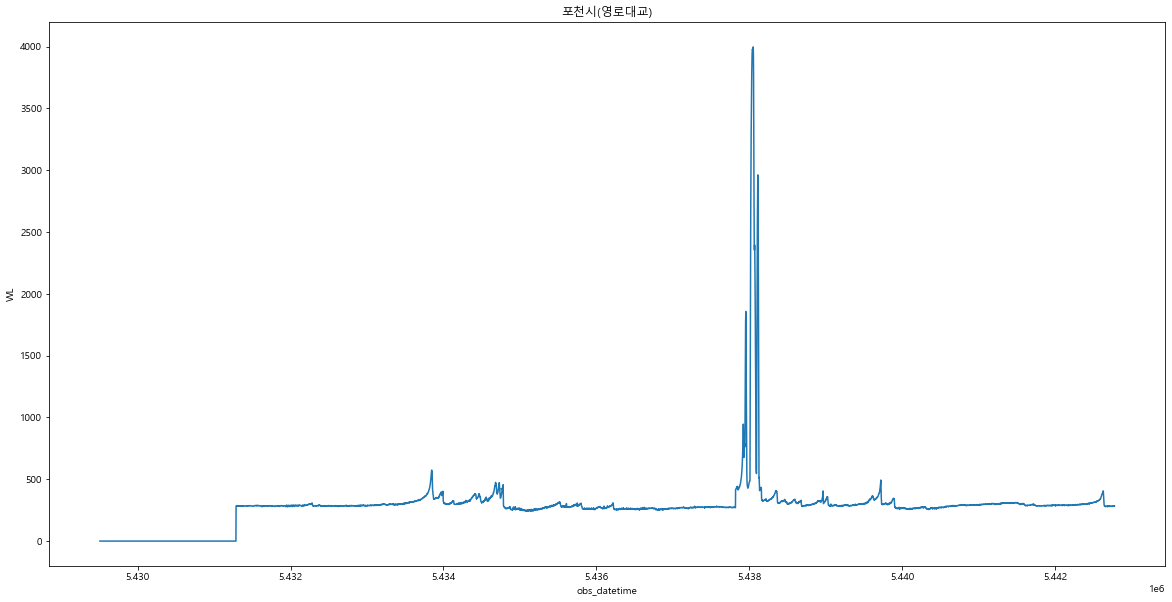

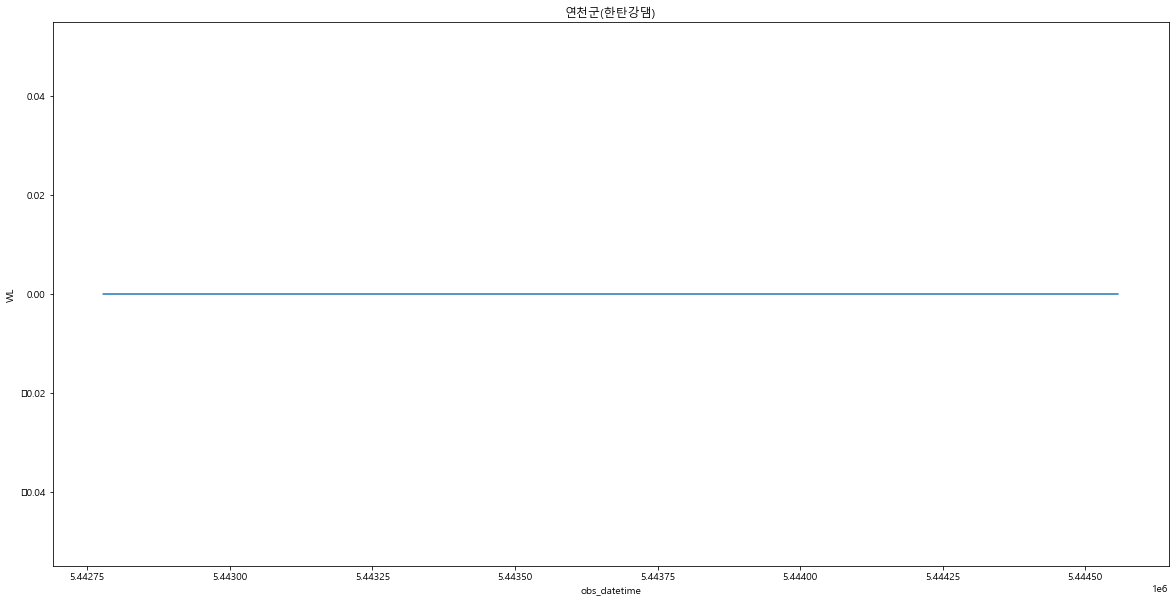

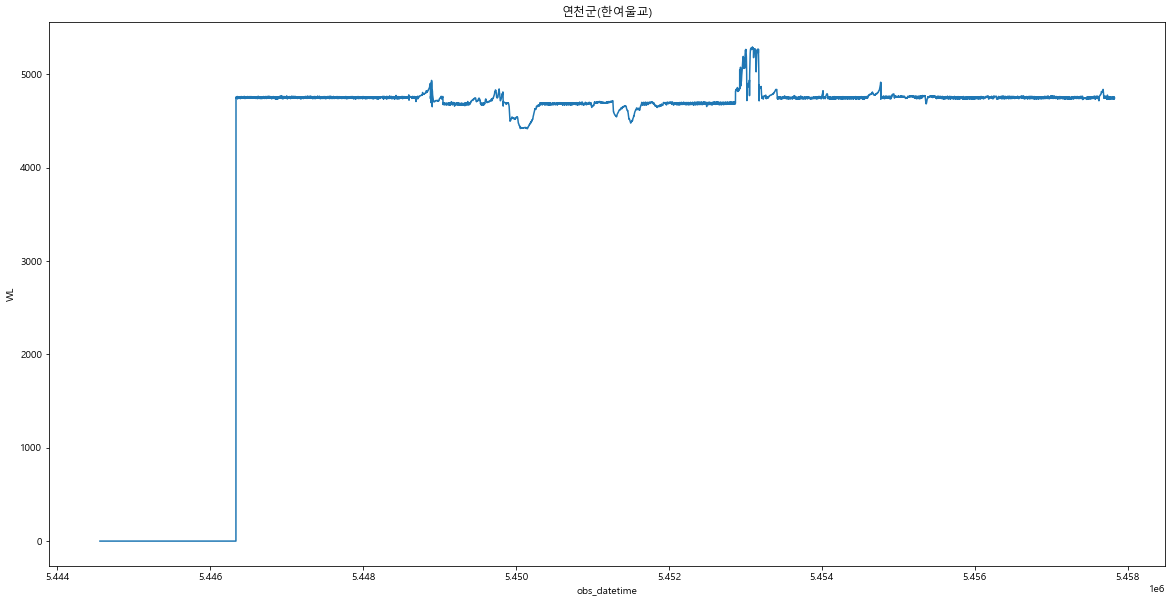

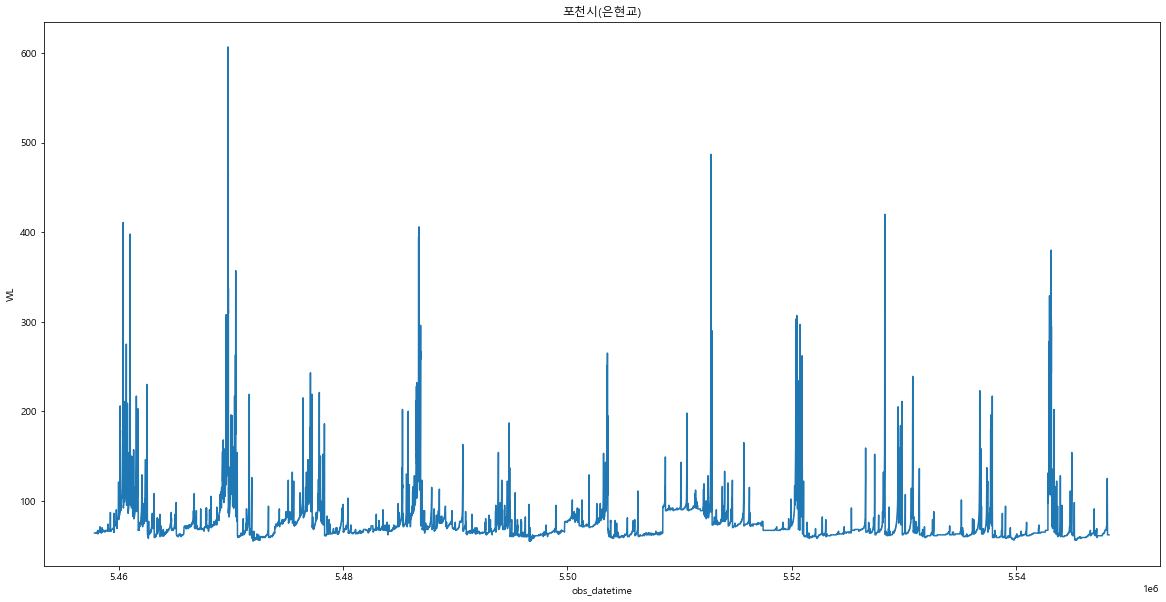

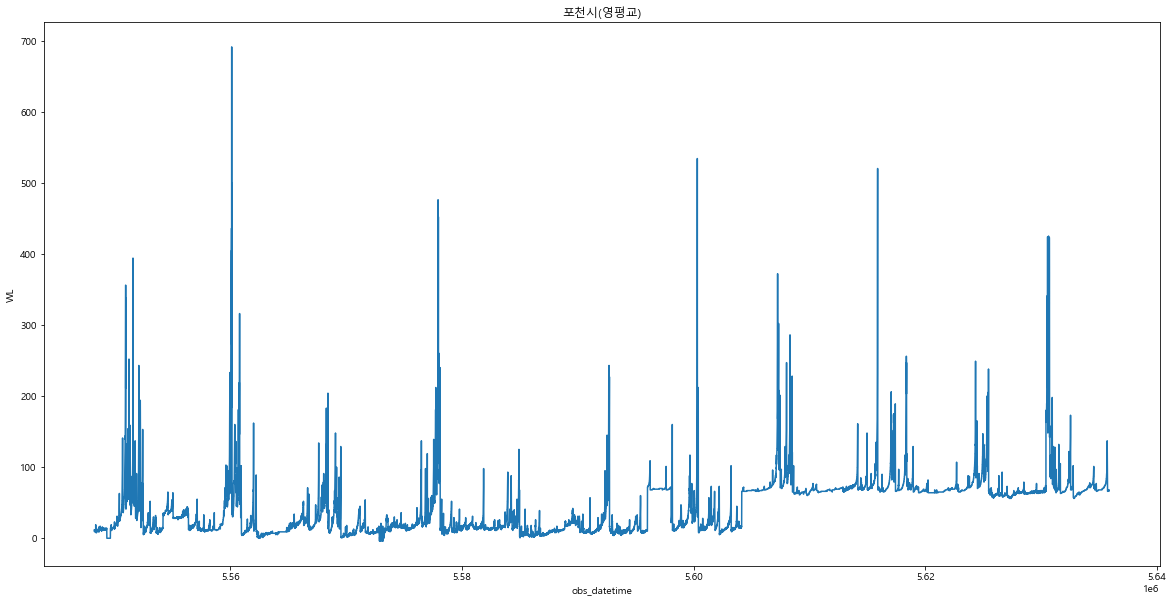

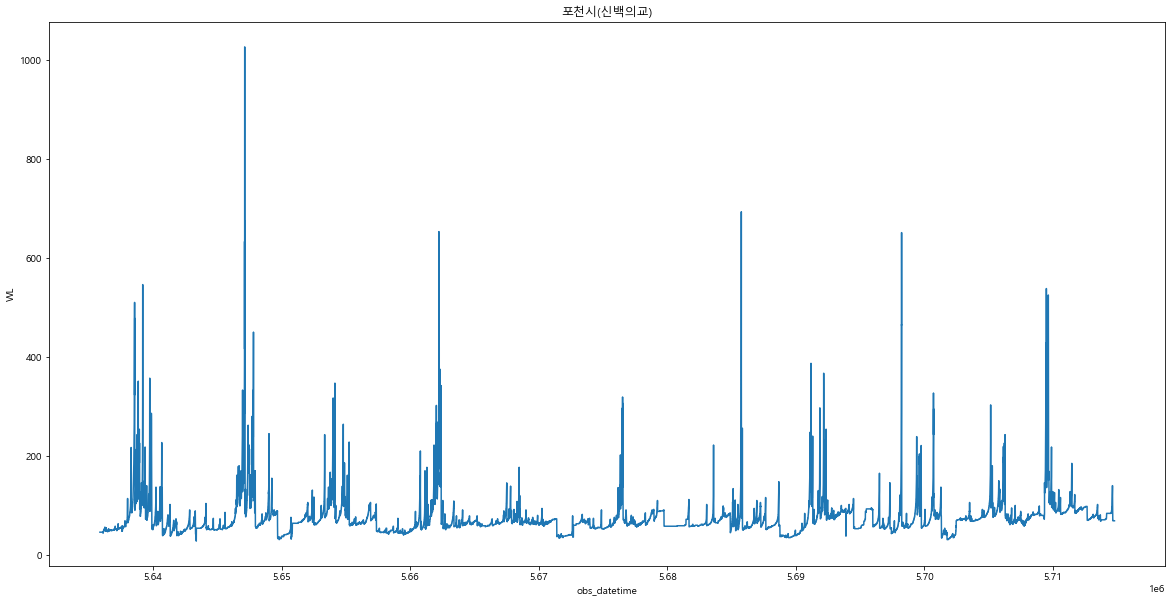

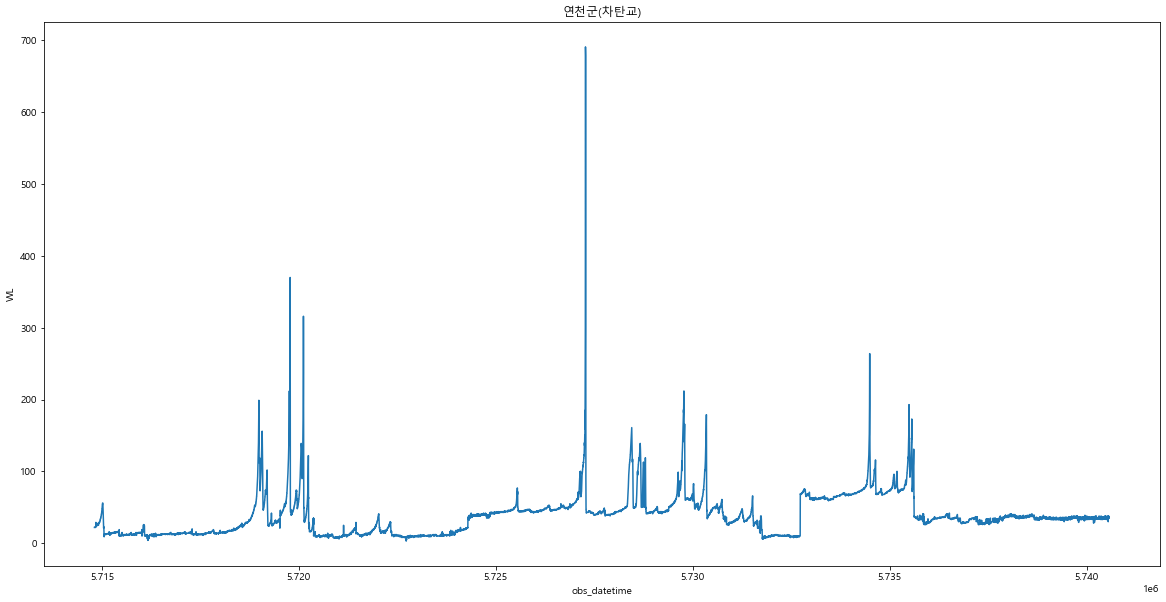

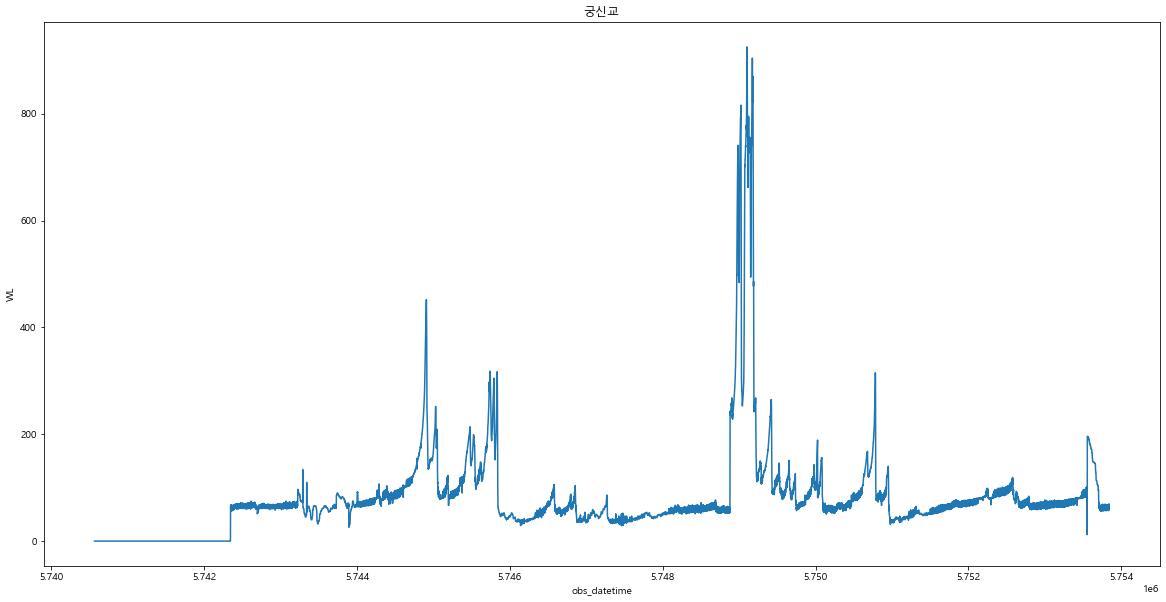

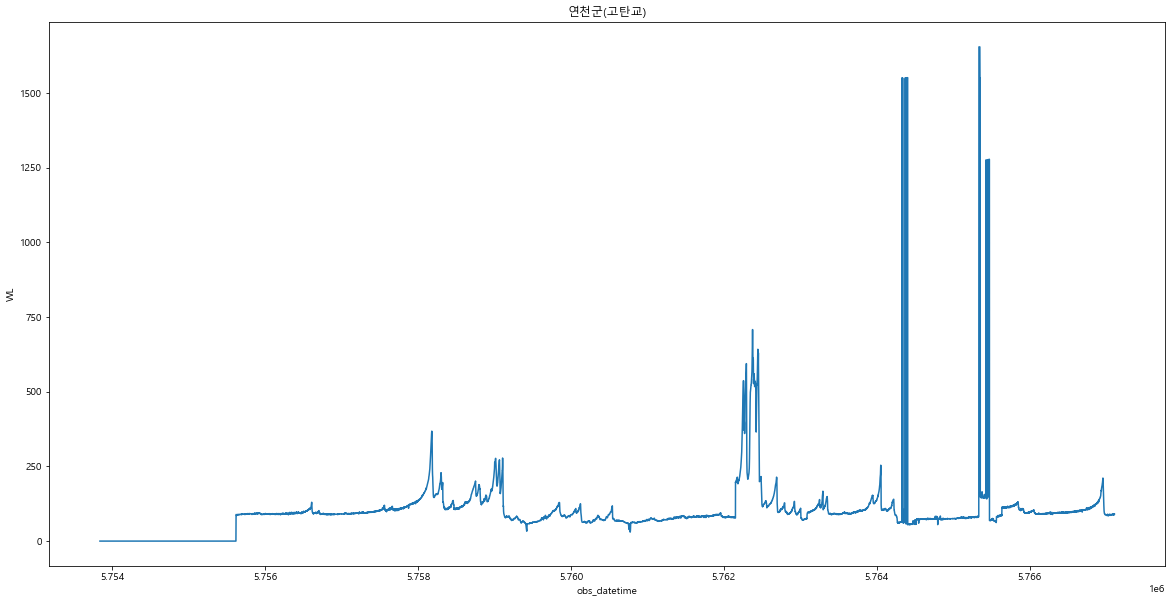

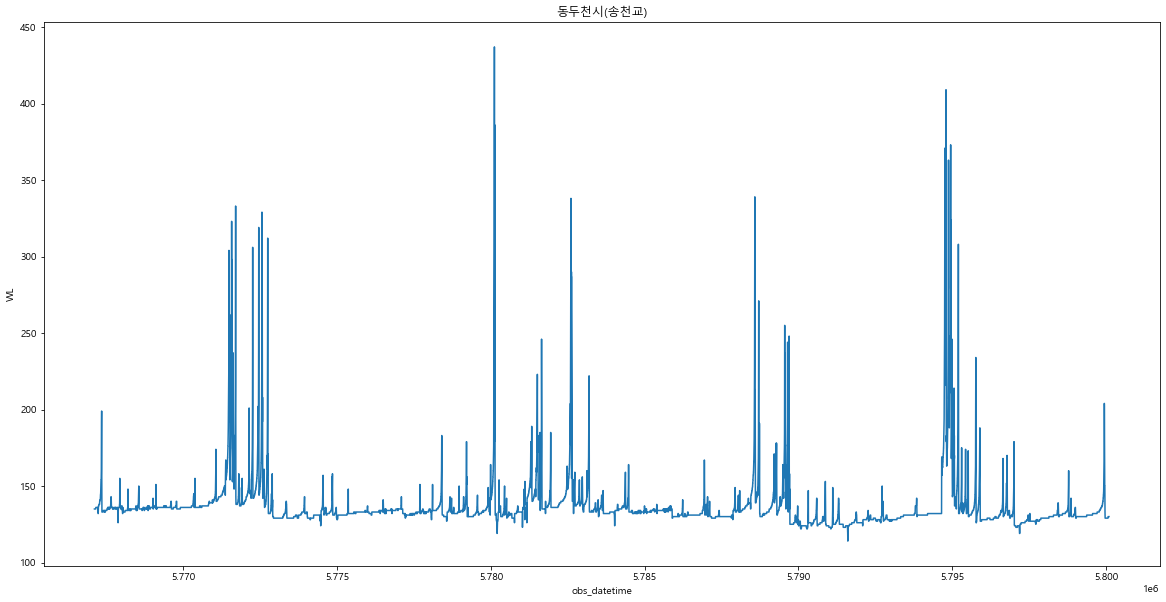

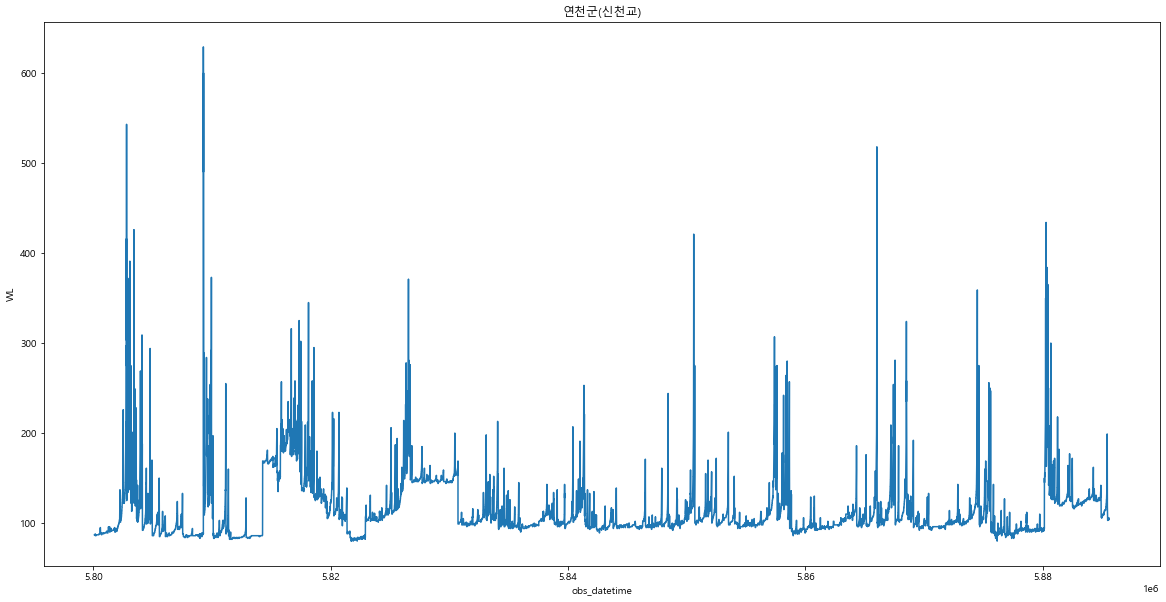

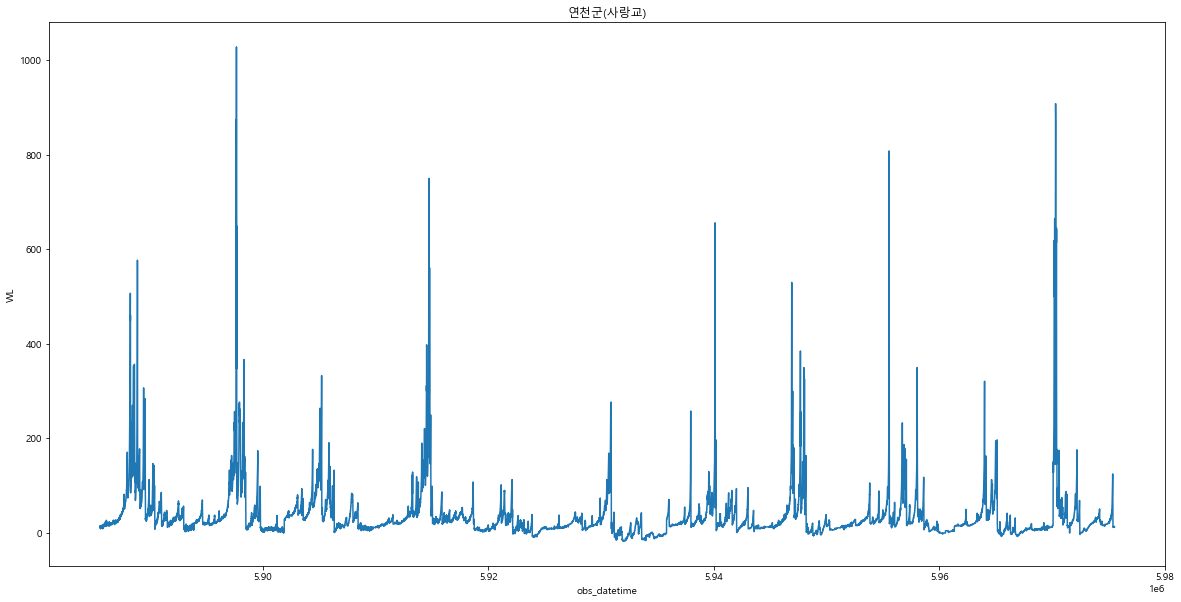

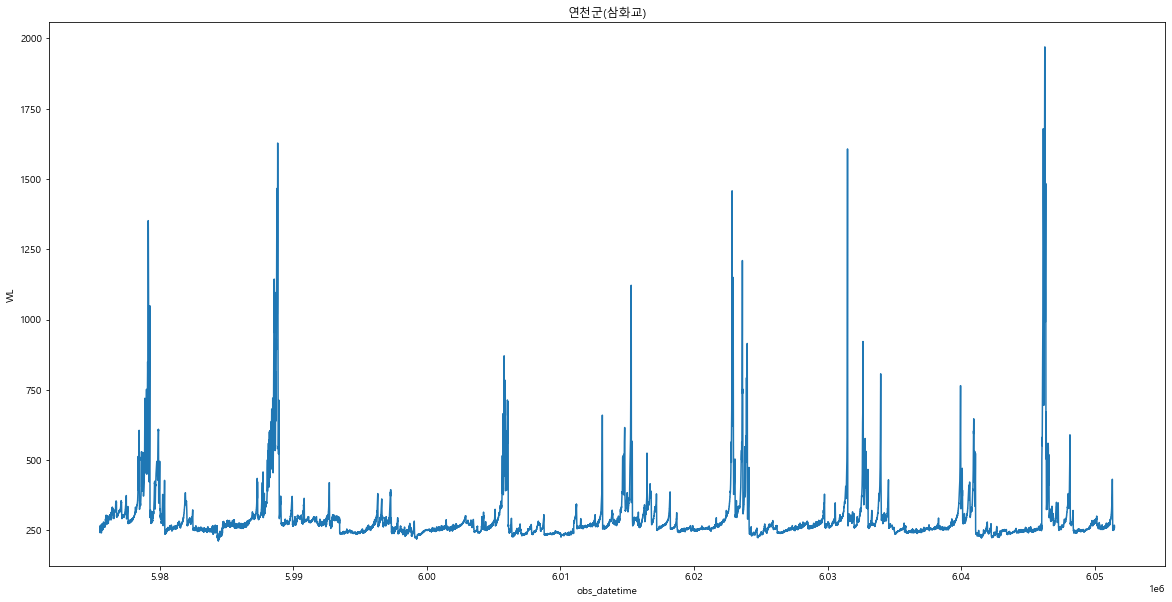

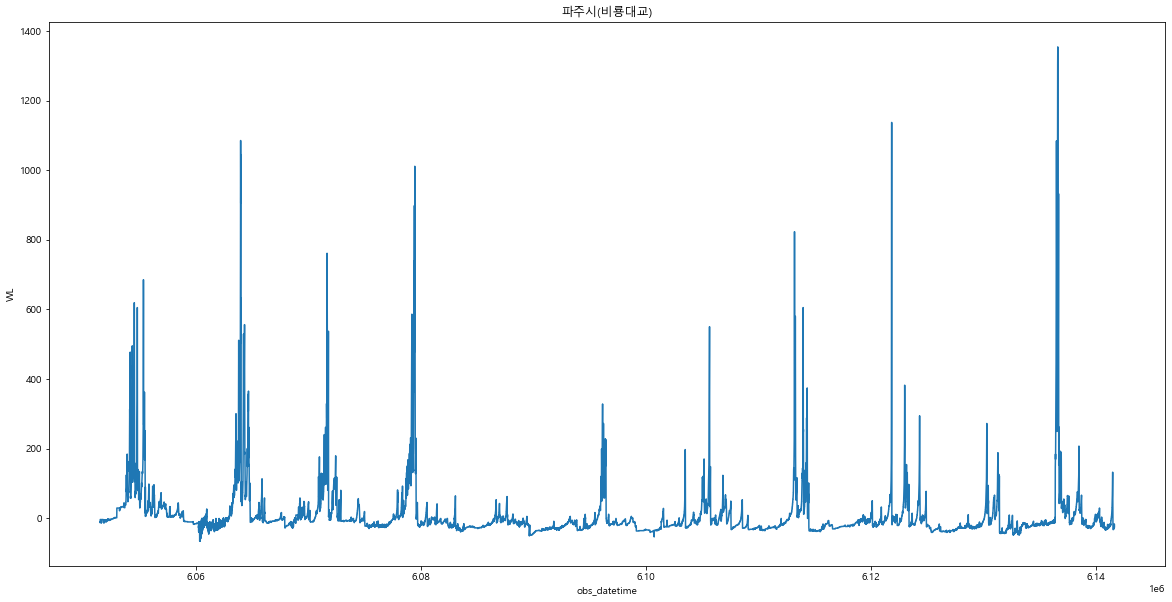

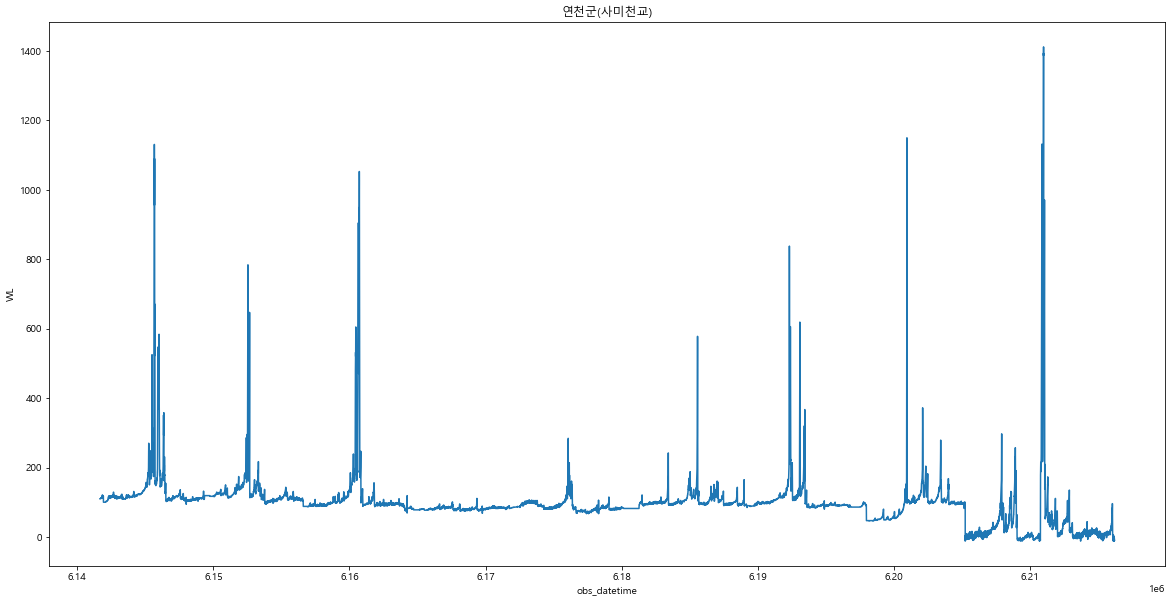

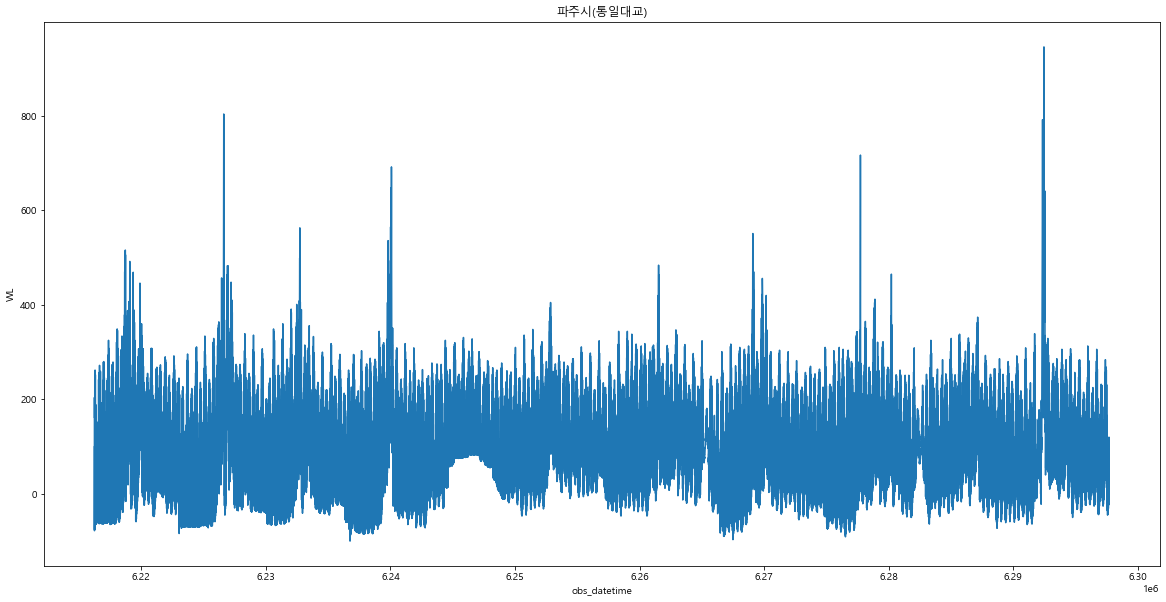

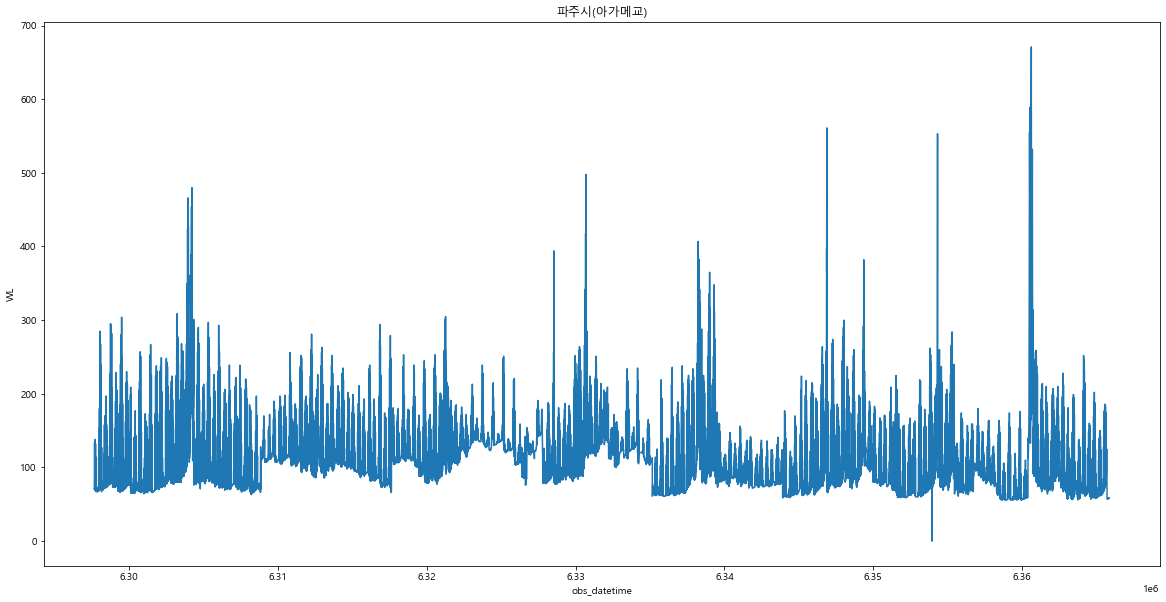

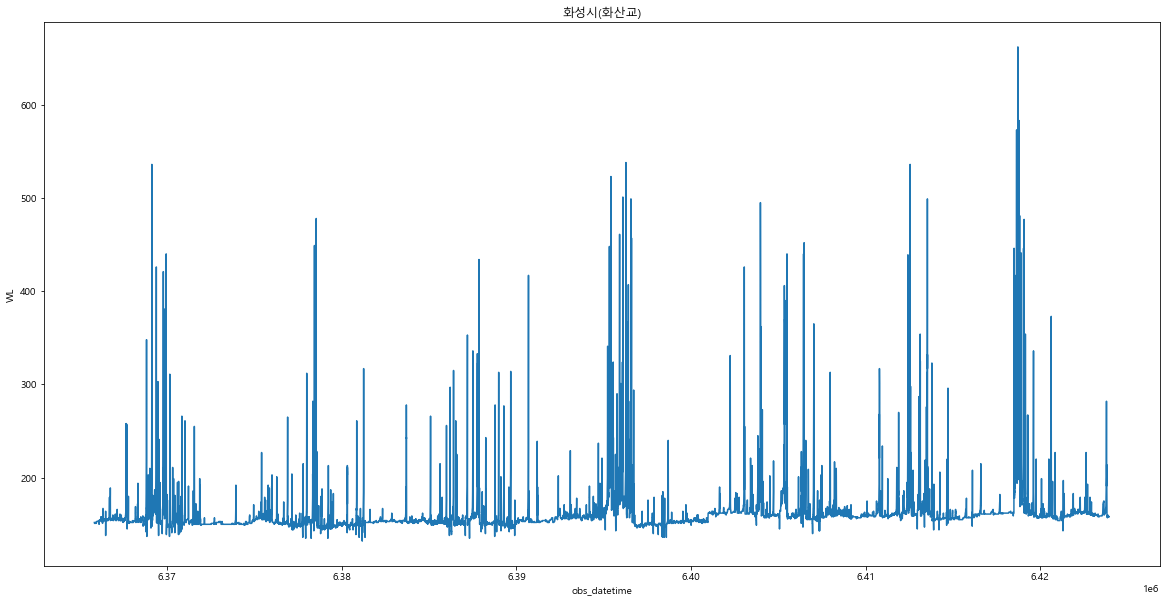

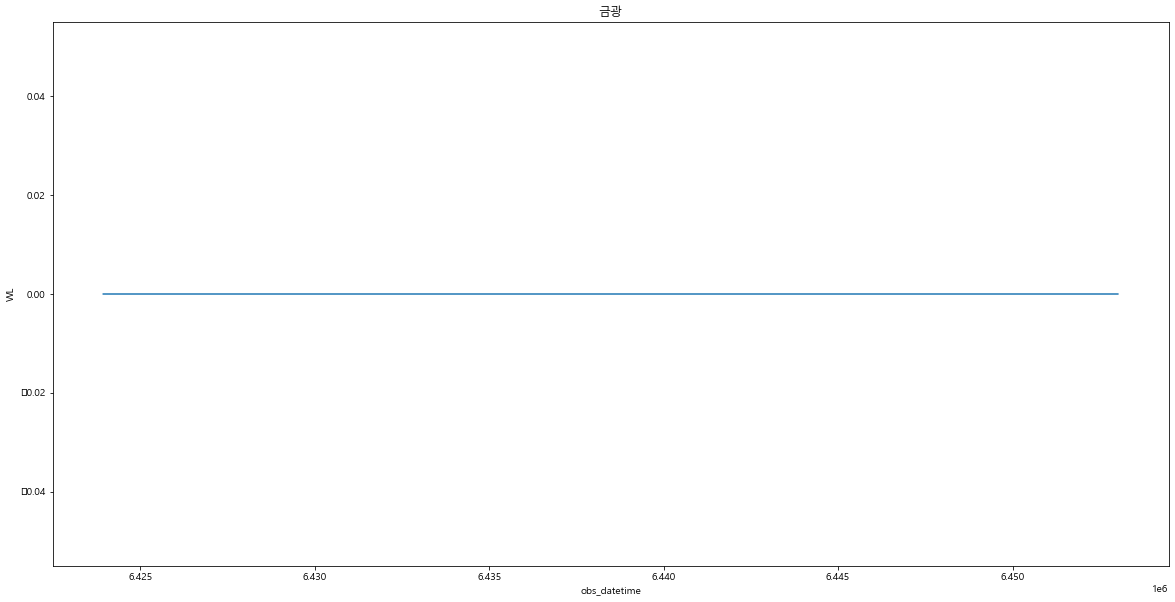

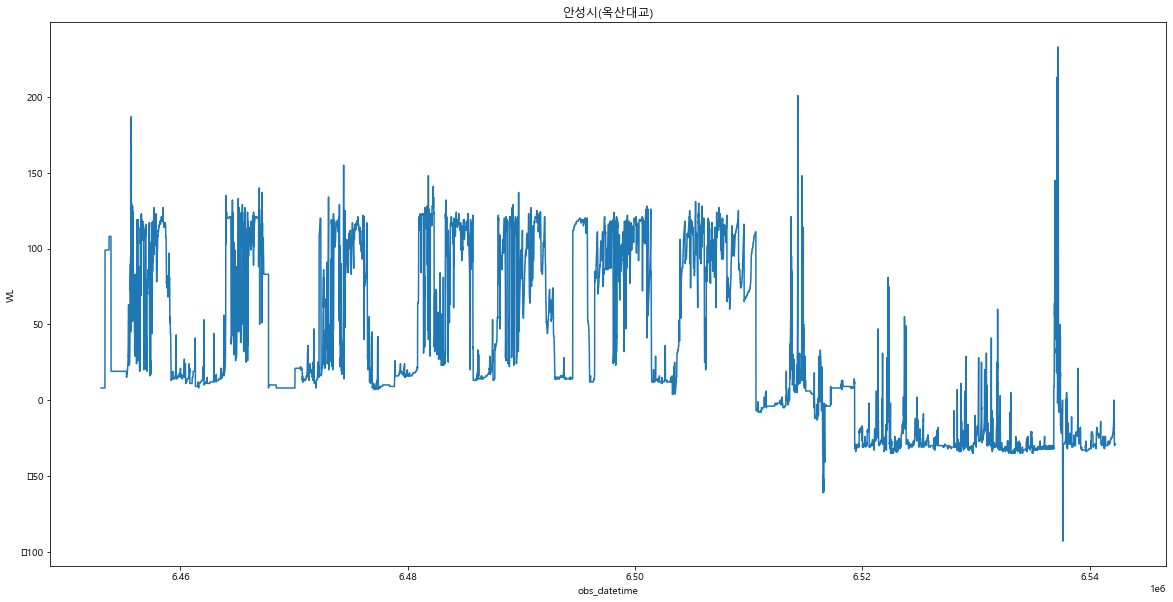

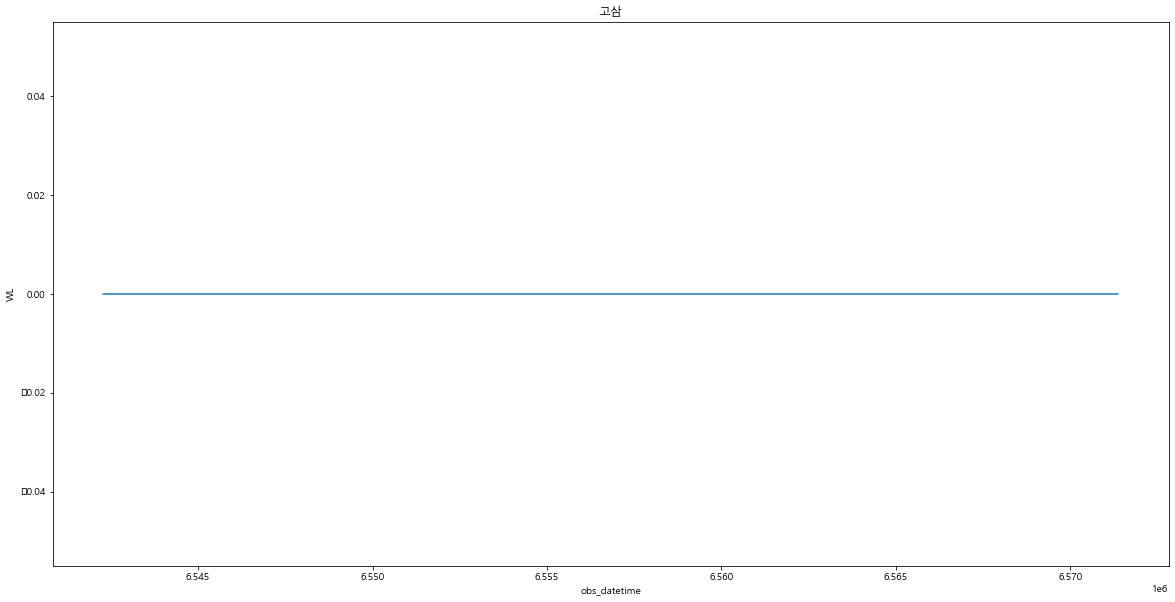

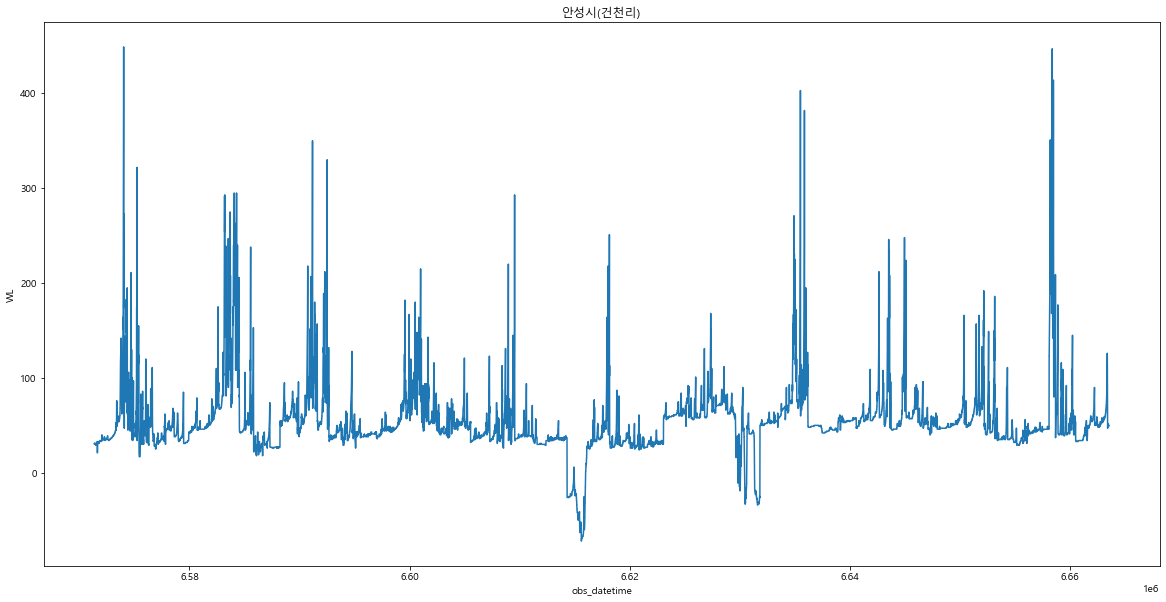

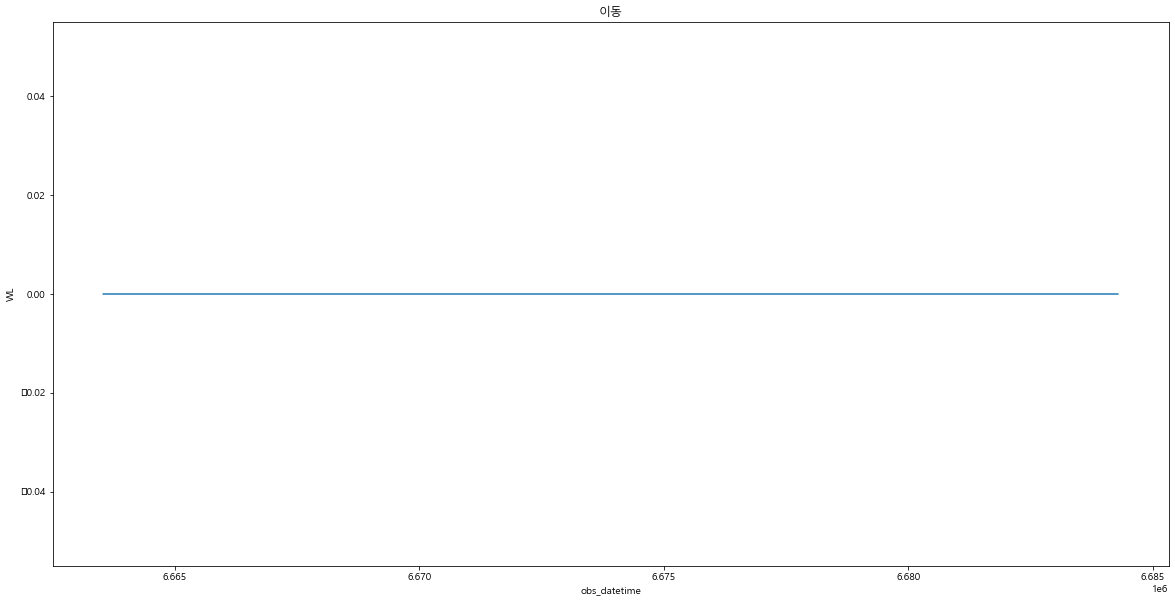

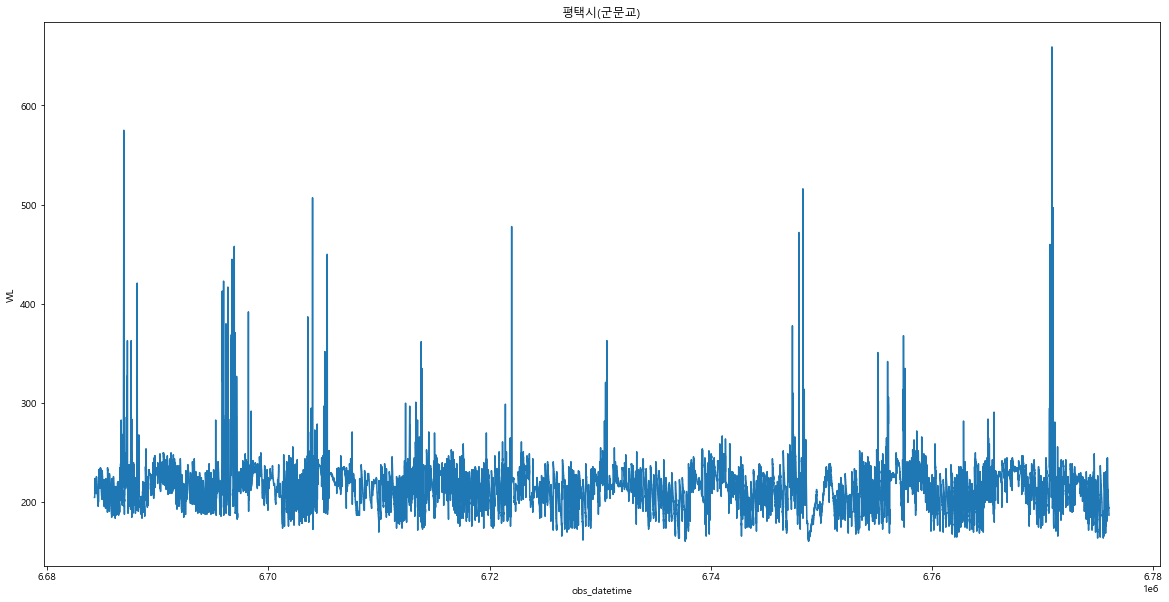

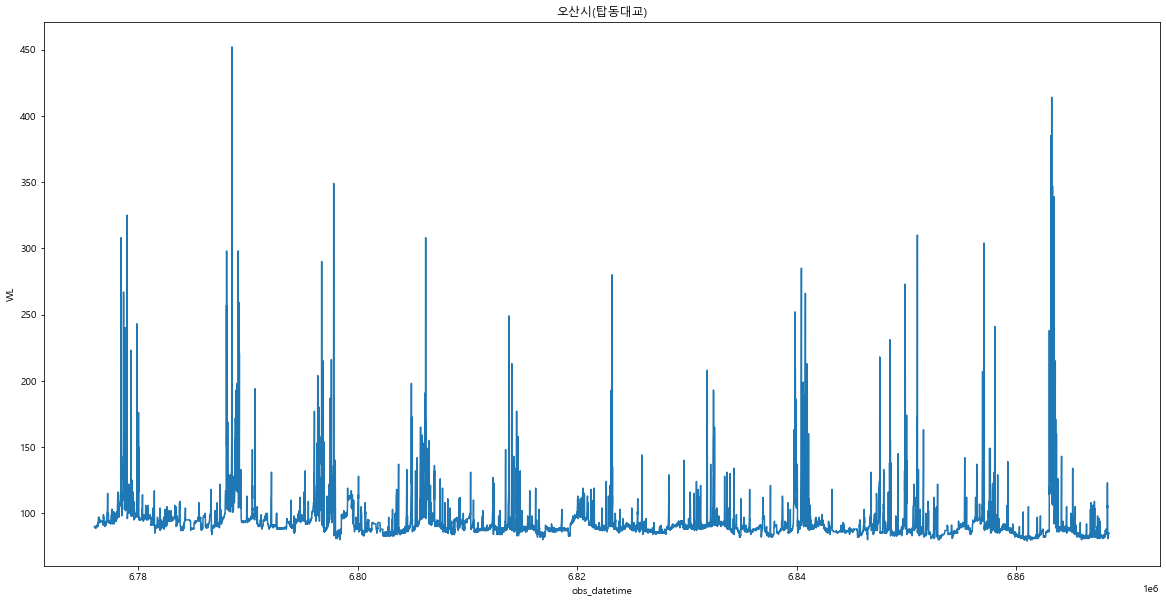

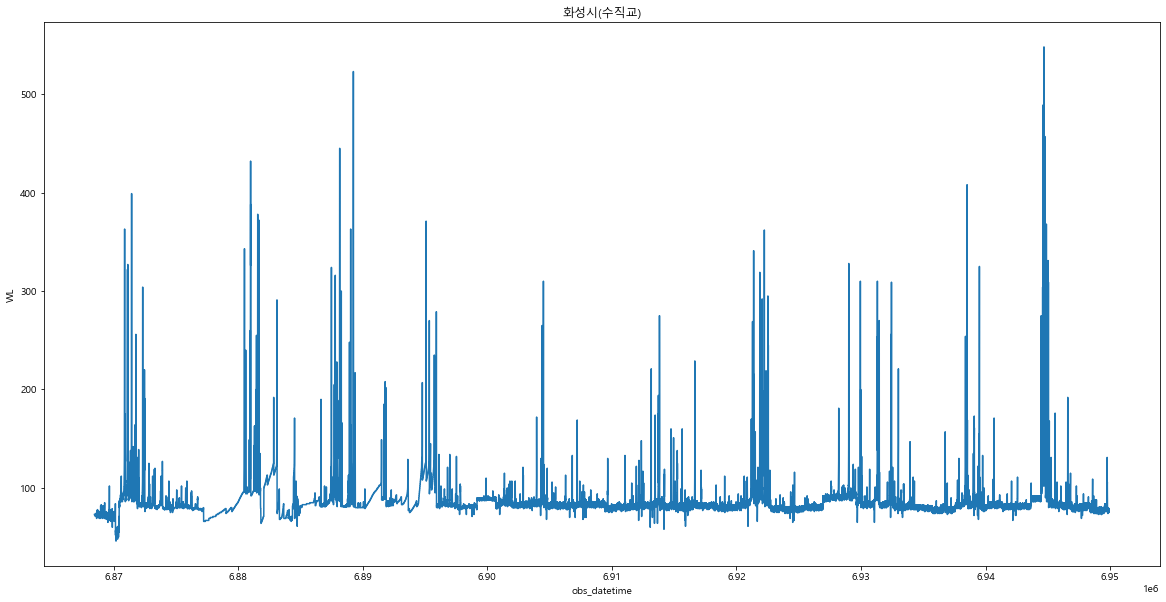

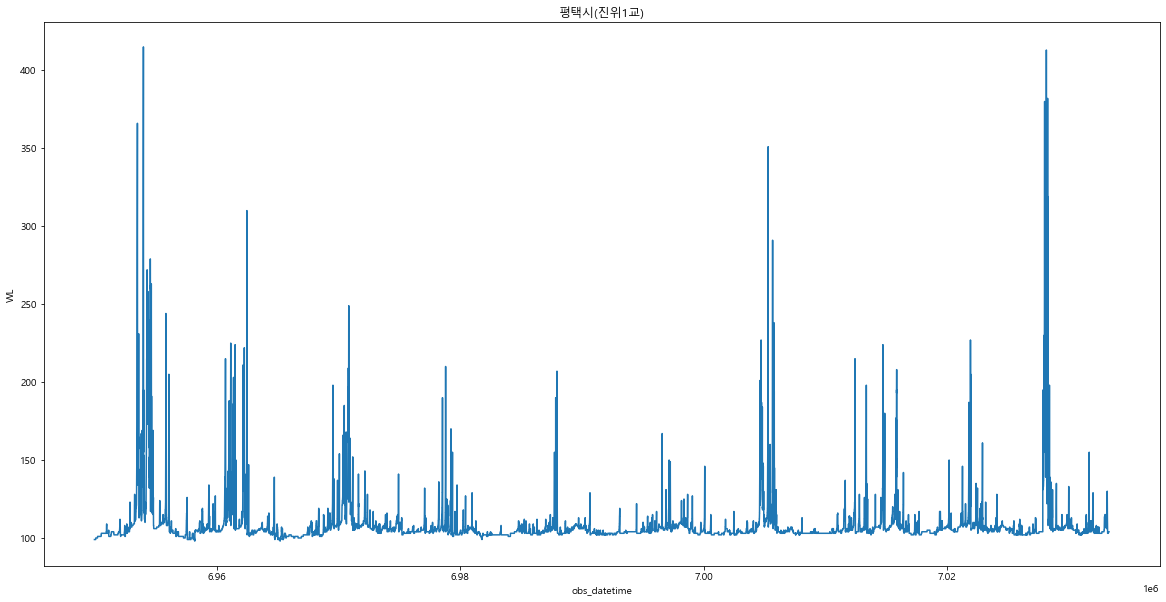

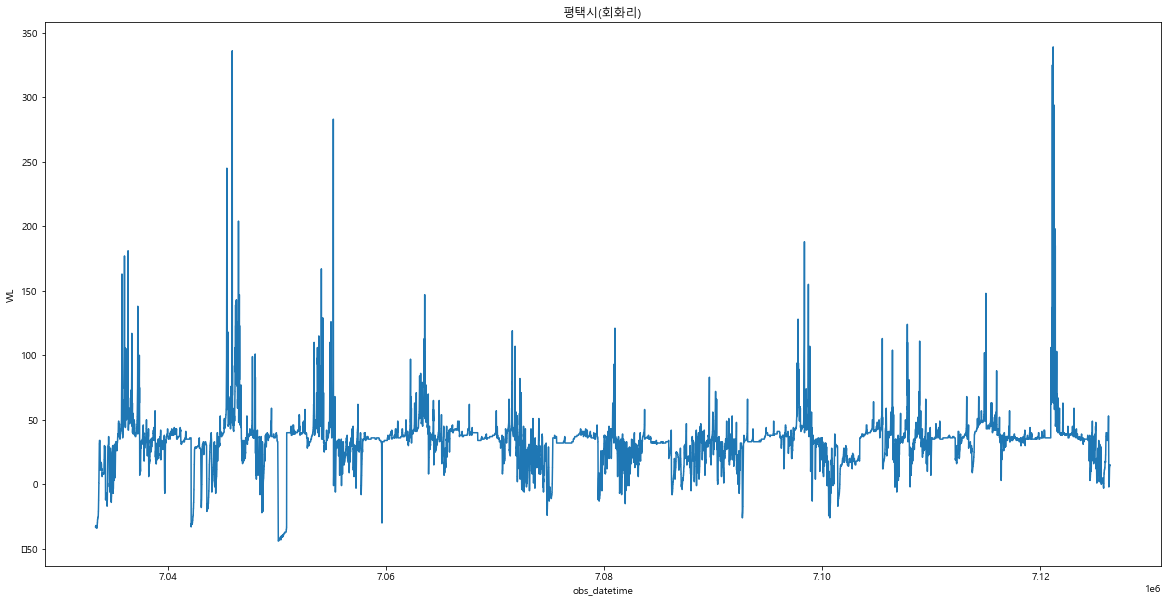

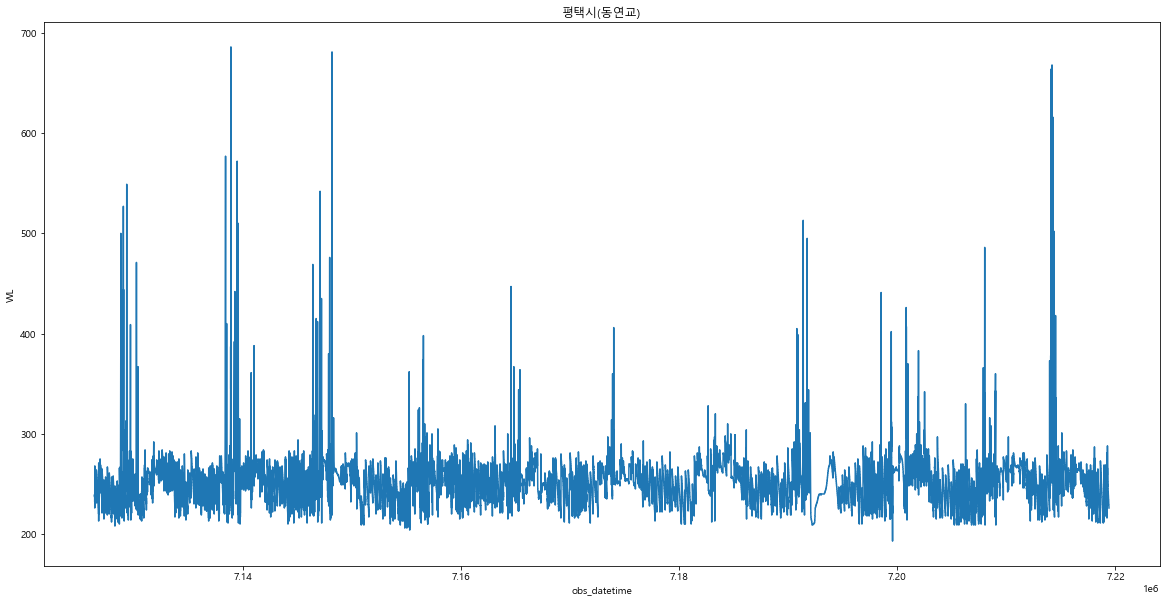

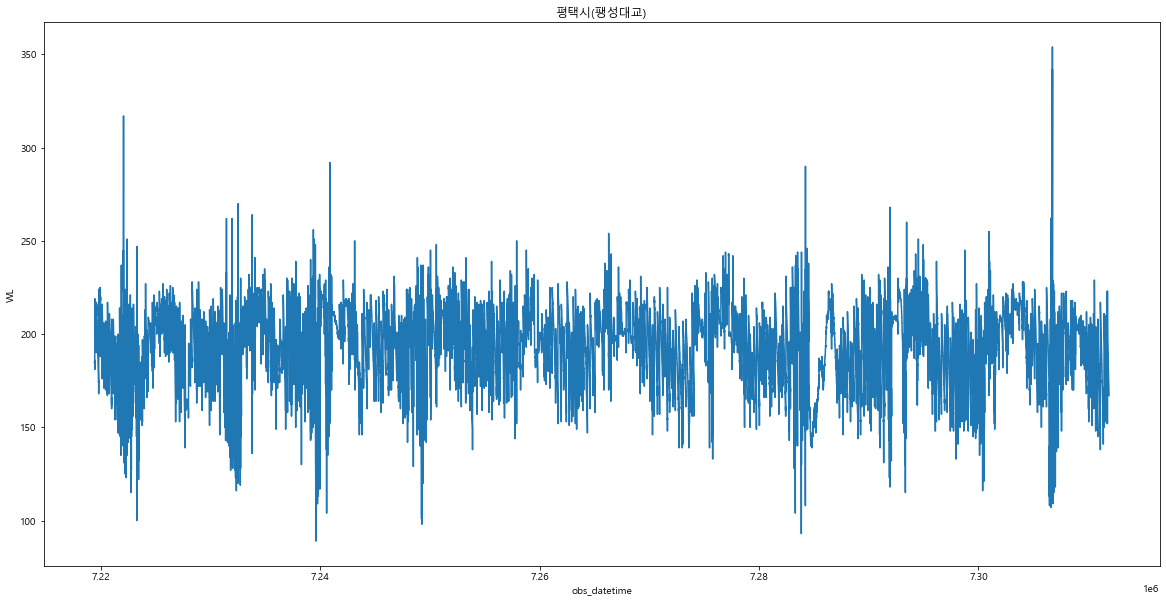

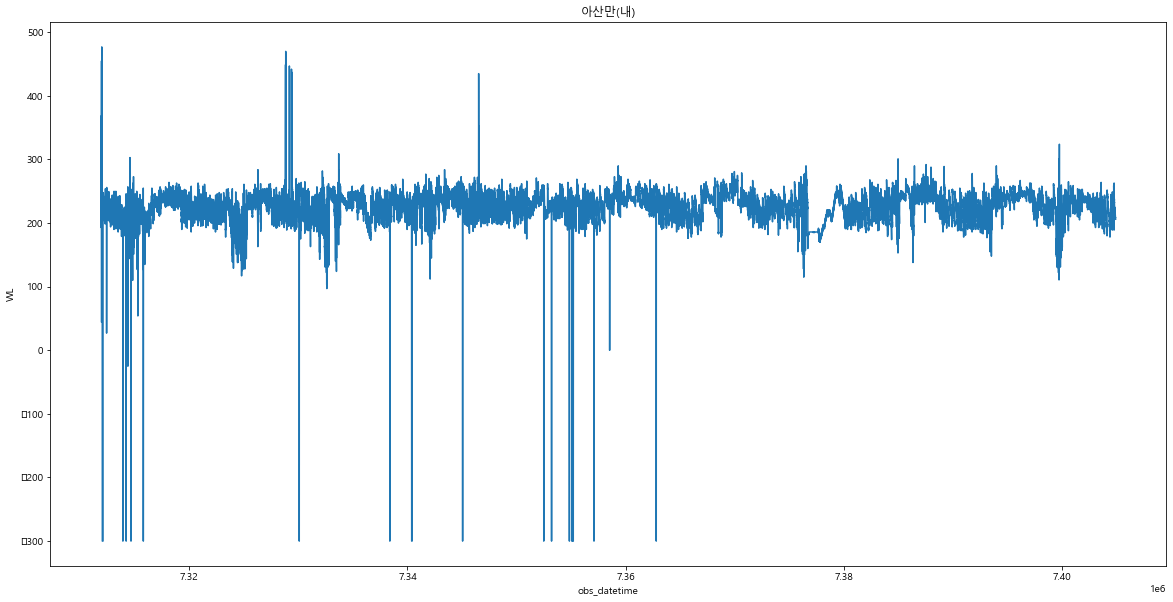

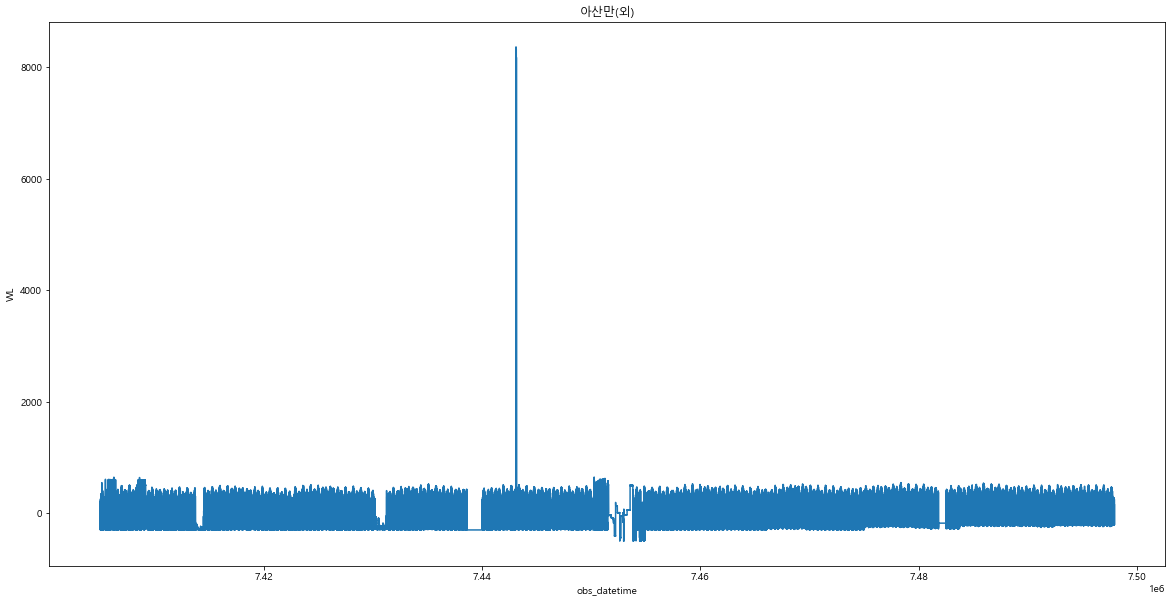

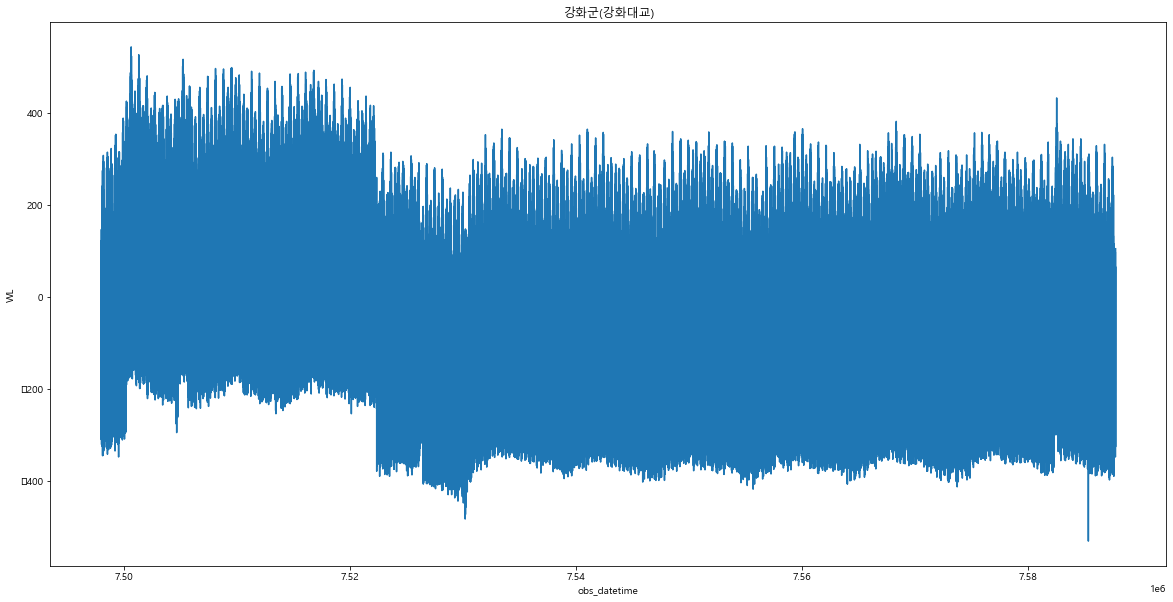

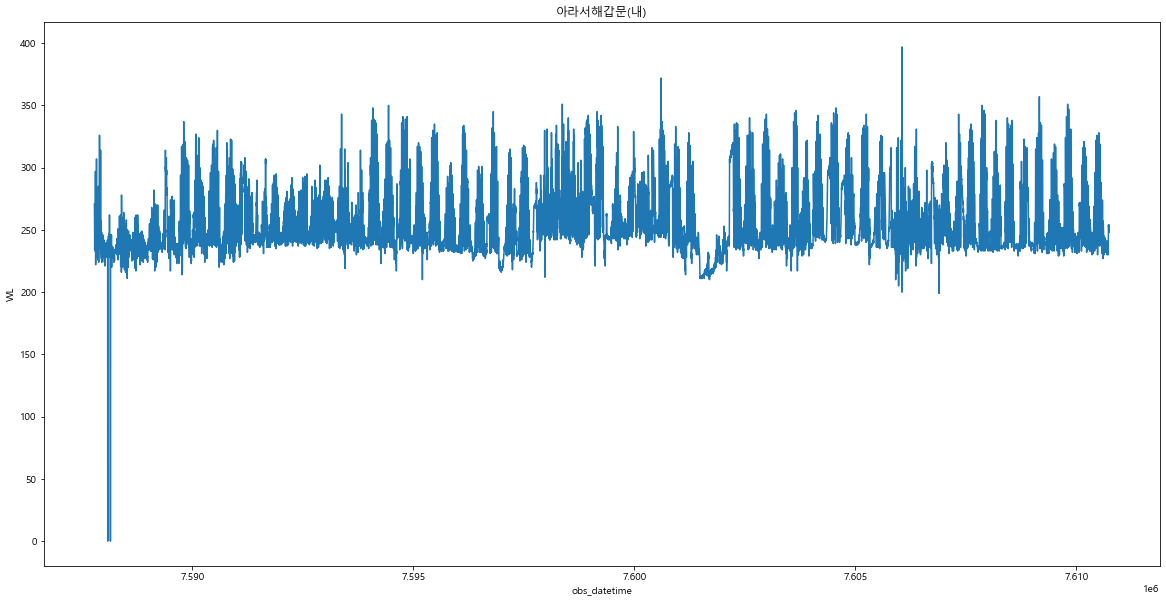

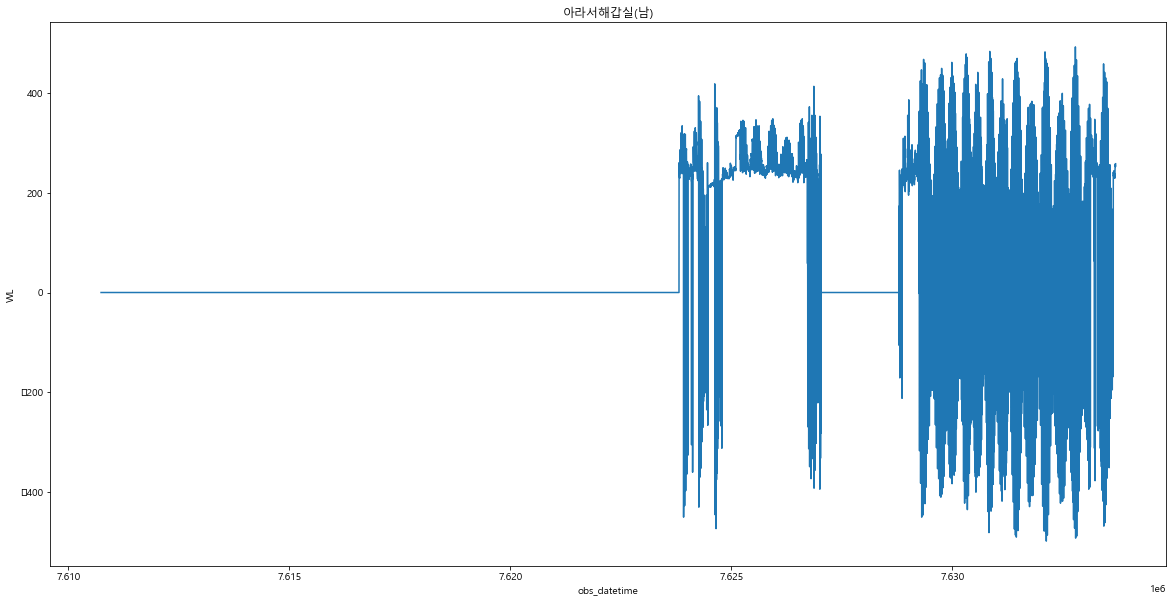

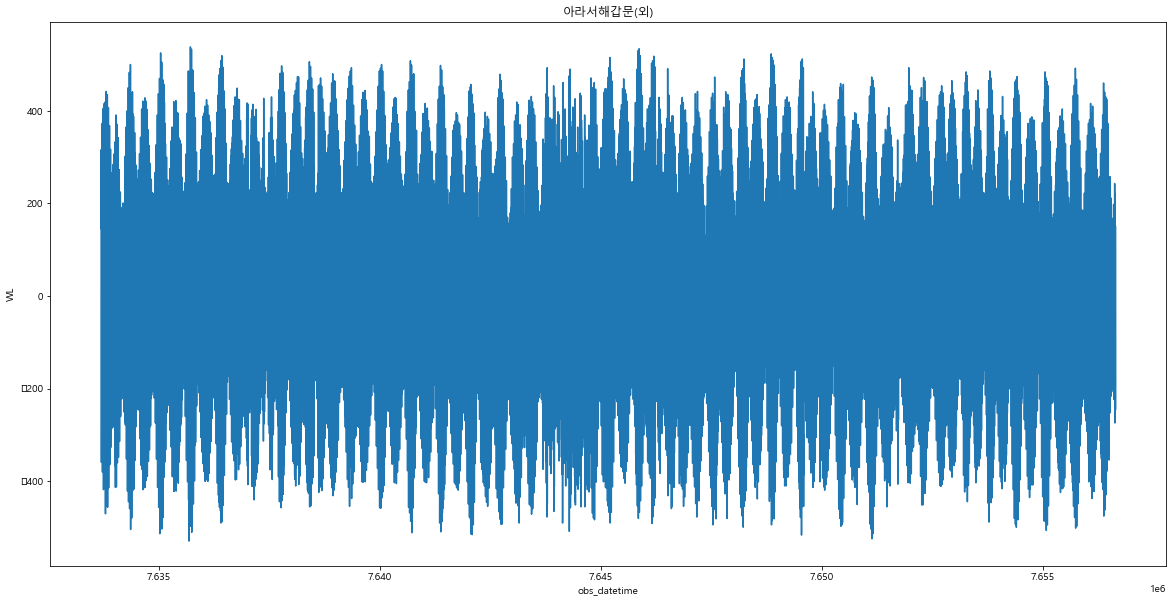

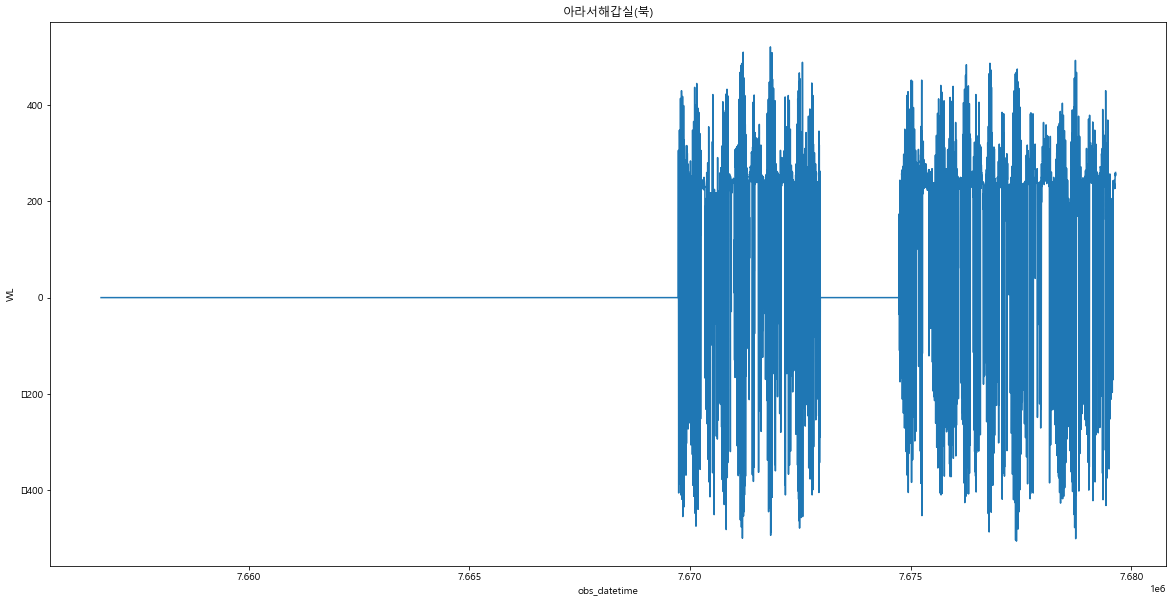

In [122]:
for i in range(120): # 각 관측소마다
    plt.xlabel('obs_datetime') # 시간의 흐름에 따른
    plt.ylabel('WL') # 하천 수위의 변화
    plt.title(station_name_list[i])
    plt.plot(df_list[i]['WL'])
    plt.show()

In [ ]:
# 대부분 비슷한 형태를 띠나 독특한 양상을 보이는 그래프들이 있음 -> 원인을 규명하고 어떻게 처리할 것인지
# 기록이 전무하거나 오랜 기간 동안 기록을 하지 않은 관측소들이 있음 -> 제거할 것인지